In this problem i scraaped a data from a public website to sell properties or any thing u want 
i scrapped the appartments in cairo with its districts to predict the good price with the apartment features to list it 

In [1]:
import joblib
import time
import mysql.connector
from datetime import date
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
ads,url_stack=joblib.load('state.pkl')


In [3]:

# df=pd.DataFrame.from_records(ads)
# df

df = pd.read_csv('New_Data.csv')
df

C:\Users\Commandor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


url  \
0      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
1      https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...   
2      https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...   
3      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
4      https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...   
...                                                  ...   
37704  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37705  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37706  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
37707  https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...   
37708  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                 title        date  \
0                   شقة للبيع بسكن مصر الاندلس مسلسل 1  2022-03-01   
1        سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥  2022-04-17   
2               لقطه سكن مصر التجمع التالت افر 150 الف  2022-05-01   
3      شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس  2022-04-29   
4                لسرعه البيع شقه سكن مصر التجمع التالت  2022-05-01   
...                                                ...         ...   
37704        شقة للبيع إمتداد مدينة 15 مايو مساحة 125م  2022-05-01   
37705               شقة للبيع بكمبوند دار مصر دور ثالث  2022-05-01   
37706                                        شقه للبيع  2022-03-01   
37707                                            للبيع  2022-03-01   
37708           شقة دور ارضي مرتفع سوبر لوكس مجاورة 15  2022-04-10   

                     location         compound       type   price  area  \
0      New Cairo - El Tagamoa       Sakan Masr  Apartment  175000   115   
1      New Cairo - El Tagamoa       Sakan Masr  Apartment  180000   115   
2      New Cairo - El Tagamoa       Sakan Masr  Apartment  150000   115   
3                Gesr Al Suez  Not in Compound  Apartment  450000   135   
4      New Cairo - El Tagamoa       Sakan Masr  Apartment  160000   115   
...                       ...              ...        ...     ...   ...   
37704             15 May City  Not in Compound  Apartment  550000   125   
37705             15 May City         Dar Misr  Apartment  600000   140   
37706             15 May City            Jewar  Apartment  470000    80   
37707             15 May City  Not in Compound  Apartment  470000   100   
37708             15 May City  Not in Compound  Apartment  440000   105   

      bedrooms   level  ...  landline pets_allowed covered_parking  \
0            3       3  ...         1            1               1   
1            3       1  ...         0            0               0   
2            3       2  ...         0            0               0   
3            3       7  ...         0            0               0   
4            3       2  ...         0            0               0   
...        ...     ...  ...       ...          ...             ...   
37704        3       2  ...         0            0               0   
37705        3       3  ...         0            0               0   
37706        2       5  ...         0            0               0   
37707        2       4  ...         1            1               0   
37708        3  Ground  ...         0            0               0   

      private_garden pool maids_room central_ac_heating  \
0                  1    0          0                  0   
1                  0    0          0                  0   
2                  0    0          0                  0   
3                  0    0          0                  0   
4                  0    0          0                  0   
...              ...  ...        ...                ...   
37704              0    0          0                  0   
37705              0    0          0                  0   
37706              0    0          0                  0   
37707              1    0          0                  0   
37708              0    0          0                  0   

      built_in_kitchen_appliances  month

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          37709 non-null  object
 1   title                        37709 non-null  object
 2   date                         37709 non-null  object
 3   location                     37709 non-null  object
 4   compound                     37709 non-null  object
 5   type                         37709 non-null  object
 6   price                        37709 non-null  int64 
 7   area                         37709 non-null  int64 
 8   bedrooms                     37709 non-null  object
 9   level                        37709 non-null  object
 10  furnished                    37709 non-null  int64 
 11  price_type                   37709 non-null  object
 12  bathrooms                    37709 non-null  object
 13  payment_option               37

# Filling missing Values  loading
all missing values filling written here

In [5]:
# df['Delivery Term'].replace('Finished',1, inplace=True)
# df['Delivery Term'].replace('Not Finished',0 ,inplace = True)
# df['Delivery Term'].replace('Semi Finished',0.5 ,inplace = True)
# df['Delivery Term'].replace('Core & Shell',0.75 ,inplace = True)
# df['Delivery Term'].unique()

In [6]:
# # df['amenities'].isna().sum()
# imputer = SimpleImputer(strategy='constant',fill_value='')

# imputer2 = SimpleImputer(strategy='constant',fill_value='Cash')
# imputer3 = SimpleImputer(strategy='constant',fill_value='Ready to move')
# imputer4 = SimpleImputer(strategy='constant',fill_value=0)
# imputer5 = SimpleImputer(strategy='most_frequent')
# imputer6 = KNNImputer(n_neighbors=4)

# df[['Amenities']] = imputer.fit_transform(df[['Amenities']])
# df[['Delivery Date']] = imputer3.fit_transform(df[['Delivery Date']])
# df[['Down Payment']] = imputer4.fit_transform(df[['Down Payment']])
# df[['Furnished']] = imputer5.fit_transform(df[['Furnished']])

# df[['Delivery Term']] = imputer6.fit_transform(df[['Delivery Term']])
# df[['Payment Option']] = imputer2.fit_transform(df[['Payment Option']])

payment option converting 0 to 'Cash'

In [7]:
#df[df['Payment Option']==0]='Cash'

In [8]:
#df['Payment Option'].unique()

Down payment conversion from string to int 

In [9]:
#df.info()

In [10]:
# df["Down Payment"] = [float(str(i).replace(",", "")) for i in df["Down Payment"]]
# df['Down Payment']=df['Down Payment'].astype(int)

In [11]:
# df['Delivery Term'].astype(str)
# df['Delivery Term'].replace(1,'Finished', inplace=True)
# df['Delivery Term'].replace(0,'Not Finished' ,inplace = True)
# df['Delivery Term'].replace(0.5,'Semi Finished' ,inplace = True)
# df['Delivery Term'].replace(0.75,'Core & Shell' ,inplace = True)
# df['Delivery Term'].replace(0.7807295490552185,'Core & Shell',inplace = True)


In [12]:
# df['Delivery Term'].value_counts()

In [250]:
df.isna().sum()


url                            0
title                          0
date                           0
location                       0
compound                       0
type                           0
price                          0
area                           0
bedrooms                       0
level                          0
furnished                      0
price_type                     0
bathrooms                      0
payment_option                 0
description                    0
delivery_term                  0
delivery_date                  0
down_payment                   0
electricity_meter              0
balcony                        0
water_meter                    0
elevator                       0
security                       0
natural_gas                    0
landline                       0
pets_allowed                   0
covered_parking                0
private_garden                 0
pool                           0
maids_room                     0
central_ac

# amenities

In [249]:
df.drop(['amenities'], axis=1,inplace=True)


In [14]:
# list_ament=['Electricity Meter', 'Balcony','Water Meter','Elevator',
#             'Security','Natural Gas','Landline','Pets Allowed','Covered Parking',
#             'Private Garden','Pool','Maids Room','Central A/C & heating',
#             'Built in Kitchen Appliances']

# ls1 = ['مياة', 'عداد كهرباء','غاز','تكييف مركزي','مصعد','حمام سباحه','جاردن','بلكونة']
# ls2 = ['Water Meter', 'Electricity Meter', 'Natural Gas','Central A/C & heating','Elevator','Pool','Private Garden','Balcony']
# mny_map = dict(zip(ls2, ls1))

# def check_amenity(row, col):
#     if col in row['Amenities'] or mny_map.get(col, 'none') in row['Description'] :
#         return 1
#     else:
#         return 0

# for col in list_ament:
#     df[col] = df.apply(check_amenity, args=[col], axis=1) 

In [15]:
# mny_map.get('Water Meter','none')

In [16]:
# for x in list_ament:
#     df[x]=df[x].replace(True,1)
#     df[x]=df[x].replace(False,0)
# df.info()

In [17]:
# df['Water Meter'].value_counts()

In [18]:
# df.rename({'Area_(m²)': 'Area'},inplace=True)
# df.columns = df.columns.str.replace(' ','_')
# df.rename(columns = {'area_(m²)':'Area','central_a/c_&_heating':'Central_AC_heating'}, inplace = True)
# df.columns = df.columns.str.lower()
# df.info()

In [19]:
# df.rename({'Area_(m²)': 'Area'},inplace=True)
# df.columns = df.columns.str.replace(' ','_')
# df.rename(columns = {'area_(m²)':'Area','central_a/c_&_heating':'Central_AC_heating'}, inplace = True)
# df.columns = df.columns.str.lower()
# df.info()

# Compound

In [20]:
# lse=list(df['compound'].unique())
# lse
# lsa=[]
# del lse[5]

In [21]:
# del lse[1]

In [22]:
# from deep_translator import GoogleTranslator
# for i in lse:
#     try:
#         result = GoogleTranslator('auto','arabic').translate(i)
#         lsa.append(result)
#         print(result)
#     except:
#         print('sorry')

In [23]:
# c_map = dict(zip(lse, lsa))
# c_map

In [24]:
# df['compound'].value_counts()

In [25]:
# def check_comp(row, col):
#     if c_map.get(col, 'none') in row['description'] or c_map.get(col, 'none') in row['title'] :
#         return col
#     else:
#         return row['compound']

# for col in lse:
#     df['compound'] = df.apply(check_comp, args=[col], axis=1)

In [26]:
# df['compound'].isna().sum() #was 22915


In [27]:
# def no_null_comp(x):
#     y=pd.isna(x)
#     if y == True:
#         return 'no_compound'
#     else:
#         return x
# df['compound']=df['compound'].apply(no_null_comp)

In [28]:
# df['compound'].value_counts()


In [29]:
# indexes_of_Sakan=df.index[df['description'].str.contains('ماونتن فيو هايد بارك')].tolist()
# len(indexes_of_Sakan)

We replaced nan values to sakan  masr from the known describtion 

In [30]:
# indexes_of_Sakan=df.index[df['description'].str.contains('سكن مصر')].tolist()
# indexes_of_Sakan2=df.index[df['title'].str.contains('سكن مصر')].tolist()

# for i in indexes_of_Sakan:
#     df['compound'][i]='Sakan Masr'
# for i in indexes_of_Sakan2:
#      df['compound'][i]='Sakan Masr'


In [31]:
# for i in indexes_of_Sakan:
#     df.loc[i,"compound"]="Sakan Masr"


All sakan masr in  Tgamo3 that's right :)

In [32]:
# df[df['location']=='New Cairo - El Tagamoa'][df['compound']=='Sakan Masr']

In [33]:
#df[(df['compound'].isna()) & (df['location']=='New Cairo - El Tagamoa')]

In [34]:
#df[df['location']=='Gesr Al Suez']

In [35]:
# indexes_of_Sakan=df.index[df['description'].str.contains('جسر السويس')].tolist()
# indexes_of_Sakan2=df.index[df['title'].str.contains('جسر السويس')].tolist()

# x=len(indexes_of_Sakan)+len(indexes_of_Sakan2)
# x-1214

# Location errors

In [36]:
# list_of_locations=df['location'].unique().tolist()
# list_of_locations

In [37]:
# loc1 = ['التجمع','مدينتي','العاصمه','مدينة نصر','الرحاب','الشروق','معادي','العبور','مصر الجديده','زهراء المعادي','مقطم','عين شمس','جسر السويس','بدر','وسط البلد','حلوان','مدينة المستقبل','حلمية الزاتون','شيراتون','مدينة السلام','النزهه الجديده','قطاميه','شبرا','حدائق القبه','حدائق حلوان','مطريه','المرج','دار السلام','عزبة النخل','الزاويه الحمرا','الوايلي','المنيل','الزمالك','الماظه','عباسيه','سيده زينب','بستين','الامريه','15 مايو']
# loc2 = ['New Cairo - El Tagamoa','Madinaty','New Capital City','Nasr City','Rehab City','Shorouk City','Maadi','Obour City','Heliopolis','Zahraa Al Maadi','Mokattam','Ain Shams','Gesr Al Suez','Badr City','Downtown Cairo','Helwan','Mostakbal City','Helmeyat El Zaytoun','Sheraton','Salam City','New Nozha','Katameya','Shubra','Hadayek al-Kobba','Hadayek Helwan','Matareya','Marg','Dar al-Salaam','Ezbet El Nakhl','Zawya al-Hamra','Waili','Al Manial','Zamalek','Almazah','Abasiya','Sayeda Zeinab','Basateen','Al Amiriyyah','15 May City']
# mini_map = dict(zip(loc2, loc1))
# mini_map
# list_of_locations

In [38]:
#df['location'].value_counts()

In [39]:
# def check_loc(row, col):
#     if mini_map.get(col, 'none') in row['description'] or mini_map.get(col, 'none') in row['title'] :
#         return col
#     else:
#         return row['location']

# for col in list_of_locations:
#     df['location'] = df.apply(check_loc, args=[col], axis=1) 

In [40]:
#df['location'].value_counts()

In [41]:
# def newHtoH(row):
#     if row['location'] == 'New Heliopolis' :
#         return 'Heliopolis'
#     else:
#         return row['location']

# df['location'] = df.apply(newHtoH, axis=1) 

In [42]:
#df['location'].value_counts()

In [43]:
#indexes_of_Sakan2=df.index[df['title'].str.contains('الشروق')].tolist()
#len(indexes_of_Sakan2)
# for i in indexes_of_Sakan2es_of_Sakan2:
#     df['title'][indexes_of_Sakan2[i]]

In [44]:
#df['date']

Working with the date column to make the date from "1 month ago "  to "22/5/20122"

In [45]:
# def date_correct(x):

#     after_split= x.split(' ')
#     if ('days' or 'day') in after_split[1]:
#         listing_date = date.today() + relativedelta(days=-int(after_split[0]))
#         return(str(listing_date))
    
#     elif ('months' or 'month') in after_split[1] :
#         listing_date = date.today() + relativedelta(months=-int(after_split[0]))
        
#         return(str(listing_date))
#     elif('weeks' or 'week') in after_split[1] :
#         listing_date = date.today() + relativedelta(weeks=-int(after_split[0]))
#         return(str(listing_date))
#     else :  
#         return(str(date.today()))
        
    

In [46]:
#df['date'] = df['date'].apply(date_correct)


In [47]:
#df['date']

## Convert date to datetime object

In [48]:
#df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

Extract month from column date

In [49]:
#df['month']=df['date'].apply(lambda x: x.month)

In [50]:
#df.info()

converting Price from string to integers and thier was a problem with 100','000 this comma so we tried to replace it with non space to make it convertable

In [51]:
#df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]
#df['price']=df['price'].astype(int)
#df.info()

In [52]:
#df['price'].astype(int)
#df.info()

## converting area to integer to make it valid to make computations

In [53]:
#df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
#df['area']=df['area'].astype(int)
#df.info()

Amenities extraction and make nan values = '''' to make it All false

In [54]:
# df['Amenities'].isna().sum()
# imputer = SimpleImputer(strategy='constant',fill_value='')
# df[['Amenities']] = imputer.fit_transform(df[['Amenities']])
# #df[['compound']] = imputer.fit_transform(df[['compound']])


# imputer2 = SimpleImputer(strategy='constant',fill_value='Cash')
# df[['Payment Option']] = imputer2.fit_transform(df[['Payment Option']])

In [55]:
# list_ament=['Electricity Meter', 'Balcony','Water Meter','Elevator',
#             'Security','Natural Gas','Landline','Pets Allowed','Covered Parking',
#             'Private Garden','Pool','Maids Room','Central A/C & heating',
#             'Built in Kitchen Appliances']

# for col in list_ament:

#     df[col] = df['amenities'].str.contains(col) 
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          37709 non-null  object
 1   title                        37709 non-null  object
 2   date                         37709 non-null  object
 3   location                     37709 non-null  object
 4   compound                     37709 non-null  object
 5   type                         37709 non-null  object
 6   price                        37709 non-null  int64 
 7   area                         37709 non-null  int64 
 8   bedrooms                     37709 non-null  object
 9   level                        37709 non-null  object
 10  furnished                    37709 non-null  int64 
 11  price_type                   37709 non-null  object
 12  bathrooms                    37709 non-null  object
 13  payment_option               37

In [56]:
#df.isna().sum()

Replacing Price value in column Price Type to Not Negotiable

In [57]:
#df['price_type'].unique()

In [58]:
#df['price_type'] = [i.replace("Price", "Not Negotiable") for i in df['price_type']]


In [59]:
#df['price_type'].unique()

Questions:                    
    1-what are the months with the highest meter price?          
    2-what is the highest delivery term price?                              
    3-most apartments are in which delivery term type?                                   
    4-in what delivery date is the highest meter price?                                  
    5-most deliverables date                                              
    6-highest meter price of a location                                              
    7-what level of the property have lowest and highest prices?                                     
    8-what are more installment option or cash?                                   
    9-most down payment of a location                                   
    10-what are the largest aparment areas?                                      
    11-highest and lowesst meter prices in compounds                              
    12- most expensive down payment in compunds                                          
    13- negotiable mean meter price is higher or or not nigotiable?                         
   

# Analysis

We dropped duplicates and we didn't find any duplicates

In [69]:
df = df.drop_duplicates()
df

url  \
0      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
1      https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...   
2      https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...   
3      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
4      https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...   
...                                                  ...   
37704  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37705  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37706  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
37707  https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...   
37708  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                 title        date  \
0                   شقة للبيع بسكن مصر الاندلس مسلسل 1  2022-03-01   
1        سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥  2022-04-17   
2               لقطه سكن مصر التجمع التالت افر 150 الف  2022-05-01   
3      شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس  2022-04-29   
4                لسرعه البيع شقه سكن مصر التجمع التالت  2022-05-01   
...                                                ...         ...   
37704        شقة للبيع إمتداد مدينة 15 مايو مساحة 125م  2022-05-01   
37705               شقة للبيع بكمبوند دار مصر دور ثالث  2022-05-01   
37706                                        شقه للبيع  2022-03-01   
37707                                            للبيع  2022-03-01   
37708           شقة دور ارضي مرتفع سوبر لوكس مجاورة 15  2022-04-10   

                     location         compound       type   price  area  \
0      New Cairo - El Tagamoa       Sakan Masr  Apartment  175000   115   
1      New Cairo - El Tagamoa       Sakan Masr  Apartment  180000   115   
2      New Cairo - El Tagamoa       Sakan Masr  Apartment  150000   115   
3                Gesr Al Suez  Not in Compound  Apartment  450000   135   
4      New Cairo - El Tagamoa       Sakan Masr  Apartment  160000   115   
...                       ...              ...        ...     ...   ...   
37704             15 May City  Not in Compound  Apartment  550000   125   
37705             15 May City         Dar Misr  Apartment  600000   140   
37706             15 May City            Jewar  Apartment  470000    80   
37707             15 May City  Not in Compound  Apartment  470000   100   
37708             15 May City  Not in Compound  Apartment  440000   105   

      bedrooms   level  ...  landline pets_allowed covered_parking  \
0            3       3  ...         1            1               1   
1            3       1  ...         0            0               0   
2            3       2  ...         0            0               0   
3            3       7  ...         0            0               0   
4            3       2  ...         0            0               0   
...        ...     ...  ...       ...          ...             ...   
37704        3       2  ...         0            0               0   
37705        3       3  ...         0            0               0   
37706        2       5  ...         0            0               0   
37707        2       4  ...         1            1               0   
37708        3  Ground  ...         0            0               0   

      private_garden pool maids_room central_ac_heating  \
0                  1    0          0                  0   
1                  0    0          0                  0   
2                  0    0          0                  0   
3                  0    0          0                  0   
4                  0    0          0                  0   
...              ...  ...        ...                ...   
37704              0    0          0                  0   
37705              0    0          0                  0   
37706              0    0          0                  0   
37707              1    0          0                  0   
37708              0    0          0                  0   

      built_in_kitchen_appliances  month

In [70]:
# df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
# df['area']=df['area'].astype(int)

# df['meterprice']=df['price']/df['area']
# df['meterprice']=df['meterprice'].astype(int)

In [71]:
df.groupby('location').describe()

price                                         \
                          count          mean            std       min   
location                                                                 
15 May City               193.0  3.469887e+05  167617.870039   30000.0   
Abasiya                    89.0  9.315737e+05  355433.295985  145000.0   
Ain Shams                1118.0  4.558007e+05  269233.265980   30000.0   
Al Amiriyyah               72.0  5.309619e+05  401629.552770   30000.0   
Al Manial                  85.0  1.306060e+06  657787.991419   30000.0   
Almazah                    79.0  1.487772e+06  844825.282141  140000.0   
Badr City                1684.0  7.585693e+05  710634.680372   30000.0   
Basateen                   46.0  5.758913e+05  621983.502041  115000.0   
Dar al-Salaam             199.0  3.206382e+05  125465.628459   30000.0   
Downtown Cairo            641.0  9.800042e+05  724086.369750   30000.0   
Ezbet El Nakhl            196.0  3.388214e+05  123877.705409   30000.0   
Gesr Al Suez             1561.0  5.382345e+05  350051.244062   30000.0   
Hadayek Helwan            346.0  4.599773e+05  221706.349456   30000.0   
Hadayek al-Kobba          394.0  8.298655e+05  387662.702838   65000.0   
Heliopolis               1623.0  1.502382e+06  833616.090791   30000.0   
Helmeyat El Zaytoun       611.0  7.479838e+05  315146.909590   30000.0   
Helwan                    848.0  5.204318e+05  342953.161921   30000.0   
Katameya                  496.0  1.435177e+06  740476.484948   40000.0   
Maadi                     677.0  1.355978e+06  715681.535085   30000.0   
Madinaty                 3818.0  1.562238e+06  817416.004286   50000.0   
Marg                      373.0  3.839722e+05  455270.603076   30000.0   
Matareya                  324.0  4.198117e+05  187911.196300   30000.0   
Mokattam                 1224.0  1.085030e+06  558623.638077   30000.0   
Mostakbal City            750.0  1.395450e+06  864612.282015   66000.0   
Nasr City                1174.0  1.360440e+06  814357.556845   30000.0   
New Cairo - El Tagamoa  12948.0  1.552051e+06  883542.699784   30000.0   
New Capital City          705.0  1.351716e+06  751432.041358   30000.0   
New Nozha                 357.0  7.650905e+05  479453.951081   30001.0   
Obour City                364.0  9.600554e+05  423918.752507   30000.0   
Rehab City               1250.0  1.568912e+06  844800.222290   98600.0   
Salam City                429.0  2.954883e+05  142872.205672   30000.0   
Sayeda Zeinab              93.0  5.777634e+05  316513.080911   50000.0   
Sheraton                  467.0  1.568327e+06  713342.918917   30000.0   
Shorouk City              578.0  1.307134e+06  797452.134710   72000.0   
Shubra                    464.0  9.754746e+05  695830.900674   30000.0   
Waili                     102.0  5.962157e+05  372762.357006   85000.0   
Zahraa Al Maadi          1084.0  1.282389e+06  530120.927568   30000.0   
Zamalek                    97.0  1.529216e+06  912343.671453   95000.0   
Zawya al-Hamra            150.0  3.845867e+05  234899.355477   30000.0   

                                                                       area  \
                              25%        50%        75%        max    count   
location                                                                      
15 May City              240000.0   300000.0   440000.0  1100000.0    193.0   
Abasiya                  750000.0   900000.0  1235000.0  1650000.0     89.0   
Ain Shams                282500.0   400000.0   550000.0  2860000.0   1118.0   
Al Amiriyyah             275000.0   450000.0   688750.0  2700000.0     72.0   
Al Manial                800000.0  1300000.0  1750000.0  2550000.0     85.0   
Almazah                  825000.0  1400000.0  1900000.0  3750000.0     79.0   
Badr City                328750.0   500000.0   852500.0  3850000.0   1684.0   
Basateen                 252500.0   375000.0   500000.0  3000000.0     46.0   
Dar al-Salaam            245000.0   320000.0   4

In [72]:
df[df['down_payment']<0]

Empty DataFrame
Columns: [url, title, date, location, compound, type, price, area, bedrooms, level, furnished, price_type, bathrooms, payment_option, description, amenities, delivery_term, delivery_date, down_payment, electricity_meter, balcony, water_meter, elevator, security, natural_gas, landline, pets_allowed, covered_parking, private_garden, pool, maids_room, central_ac_heating, built_in_kitchen_appliances, month, meterprice]
Index: []

[0 rows x 35 columns]

In [73]:
def nega(row):
    if row['down_payment'] < 0 :
        return 0
    else:
        return row['down_payment']

df['down_payment'] = df.apply(nega, axis=1) 

# Univariate Analaysis

location

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Heliopolis                 1623
Gesr Al Suez               1561
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al-Hamra              15

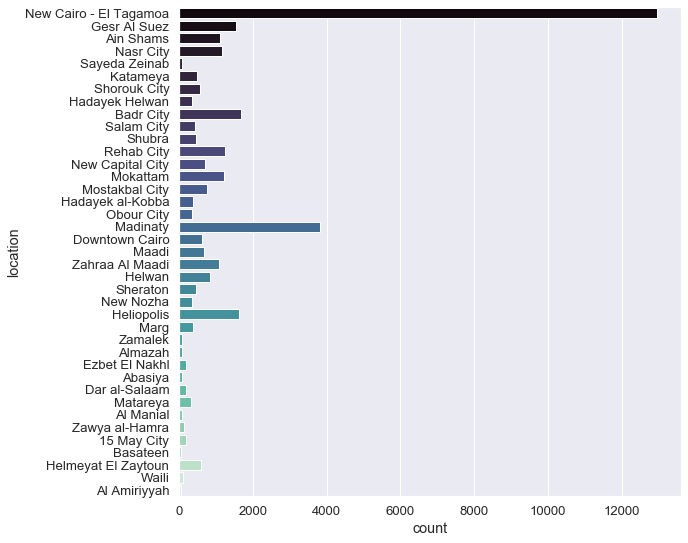

In [74]:
print('location')
print('')
print(df['location'].value_counts())
sns.countplot(y='location',data=df,palette='mako',)


In [75]:
print('compound')
print('')
print(df['compound'].value_counts()[:10])



compound

Not in Compound        16335
Jewar                   5066
Madinaty                2940
Sama                    1074
Beit Al Watan            633
L’Avenir                 545
Eastown                  484
Makany                   435
Mivida                   427
Mountain View iCity      424
Name: compound, dtype: int64


In [76]:
print('compound')
print('')
print(df['compound'].value_counts()[-20:])


compound

Sky Capital View             1
Sun Capital                  1
Cleopatra Palace             1
La Vista City                1
TRUE Gate                    1
Dreamland                    1
Anakaji                      1
Sueno                        1
Armonia                      1
Green Avenue                 1
Shorouk Gardens              1
Village Avenue               1
GCR Golf City                1
Sun City Gardens             1
Al Solaimaneyah Golf City    1
Go Heliopolis                1
Creek Park                   1
Stella New Cairo             1
Wahet El Ryhan               1
Etlalah                      1
Name: compound, dtype: int64


bedrooms
3      12693
3      12523
2       7493
2       3861
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64


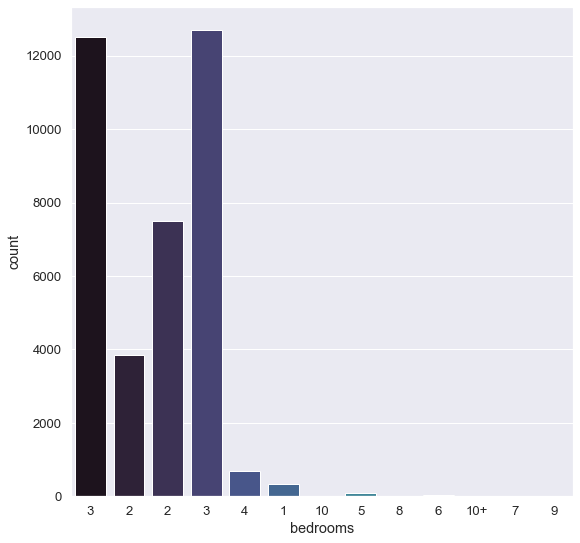

In [77]:
print('bedrooms')
print(df['bedrooms'].value_counts())
sns.countplot(x='bedrooms',data=df,palette='mako')


level
2         7957
3         6477
1         5957
Ground    4952
4         3691
5         2886
6         1410
10+       1234
7          859
8          800
9          770
10         716
Name: level, dtype: int64


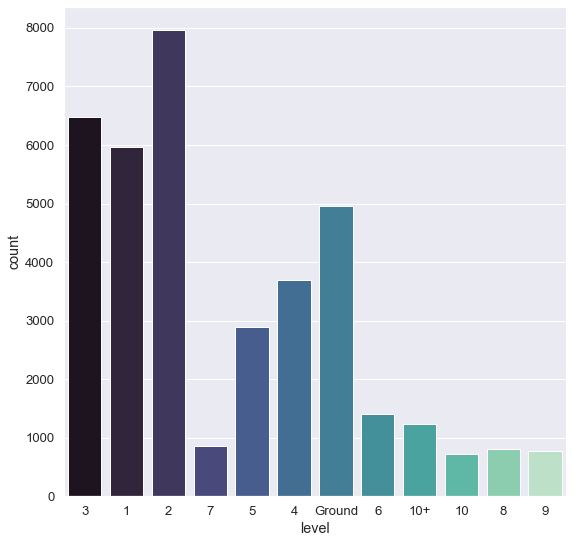

In [78]:
print('level')
print(df['level'].value_counts())
sns.countplot(x='level',data=df,palette='mako')


furnished
0    36229
1     1480
Name: furnished, dtype: int64


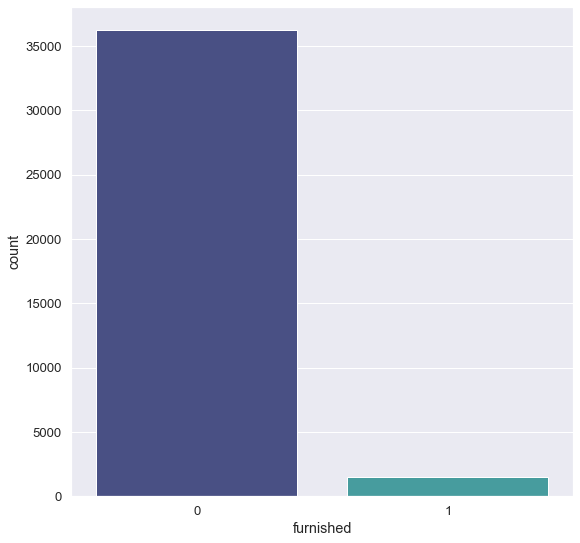

In [79]:
print('furnished')
print(df['furnished'].value_counts())
sns.countplot(x='furnished',data=df,palette='mako')


price_type
Not Negotiable    28640
Negotiable         9069
Name: price_type, dtype: int64


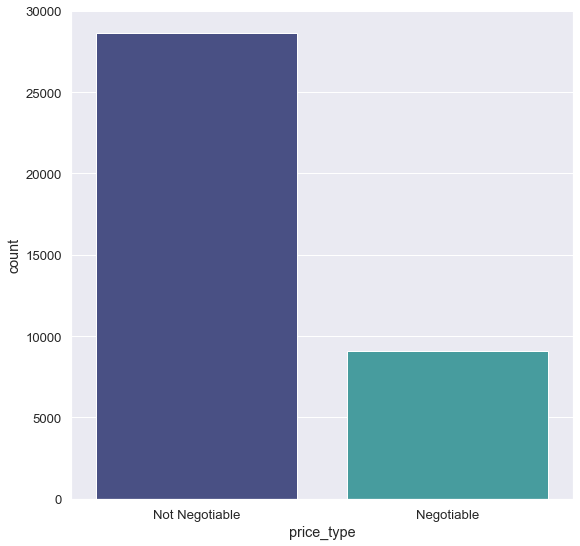

In [80]:
print('price_type')

print(df['price_type'].value_counts())
sns.countplot(x='price_type',data=df,palette='mako')


delivery_date
Ready to move      32350
soon                1473
2024                1368
2023                 932
2022                 544
2025                 484
within 6 months      468
2026                  86
2027                   2
2030                   1
2028                   1
Name: delivery_date, dtype: int64


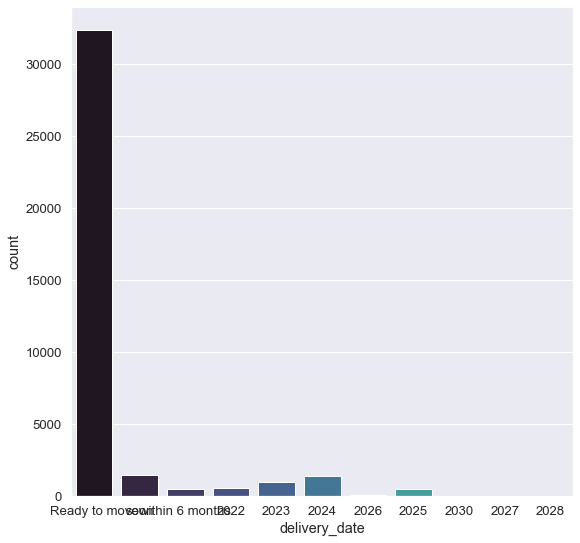

In [81]:
print('delivery_date')

print(df['delivery_date'].value_counts())
sns.countplot(x='delivery_date',data=df,palette='mako')


electricity_meter
1    21836
0    15873
Name: electricity_meter, dtype: int64


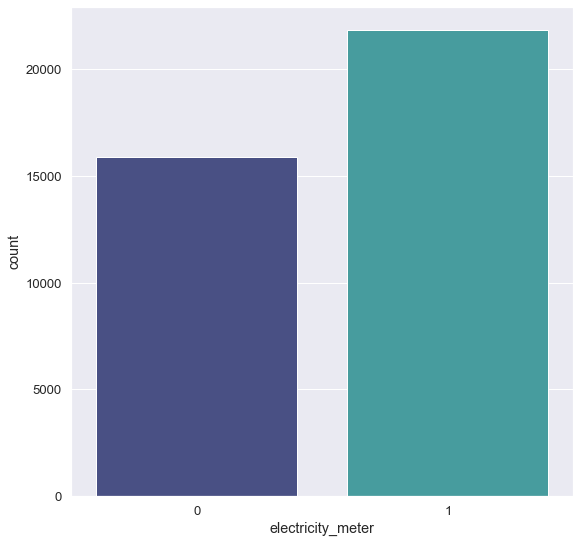

In [82]:
print('electricity_meter')

print(df['electricity_meter'].value_counts())
sns.countplot(x='electricity_meter',data=df,palette='mako')


balcony
1    21813
0    15896
Name: balcony, dtype: int64


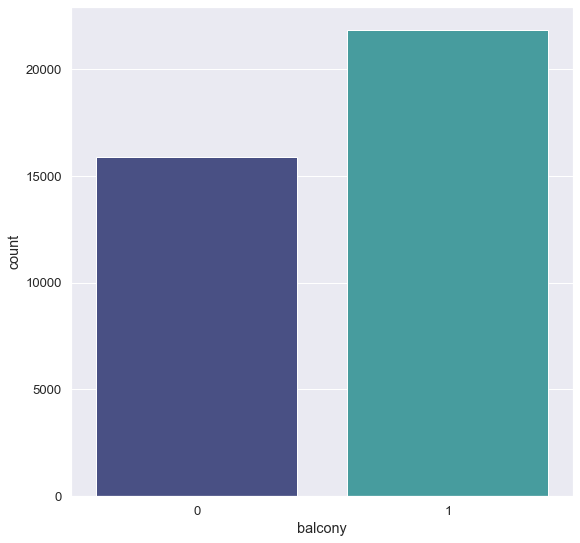

In [83]:
print('balcony')

print(df['balcony'].value_counts())
sns.countplot(x='balcony',data=df,palette='mako')


water_meter
1    19901
0    17808
Name: water_meter, dtype: int64


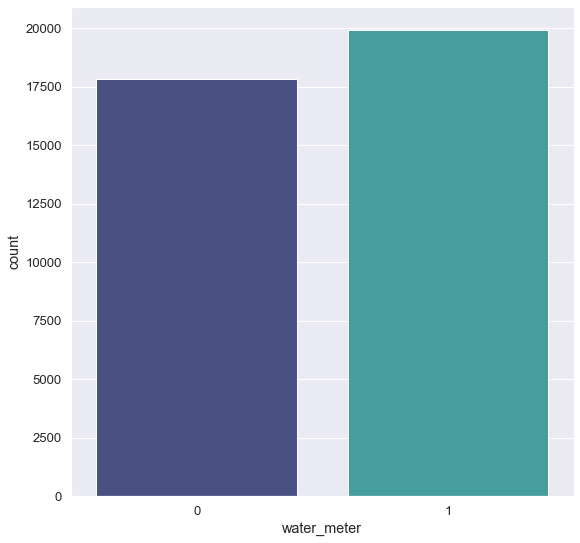

In [84]:
print('water_meter')

print(df['water_meter'].value_counts())
sns.countplot(x='water_meter',data=df,palette='mako')


elevator
0    19262
1    18447
Name: elevator, dtype: int64


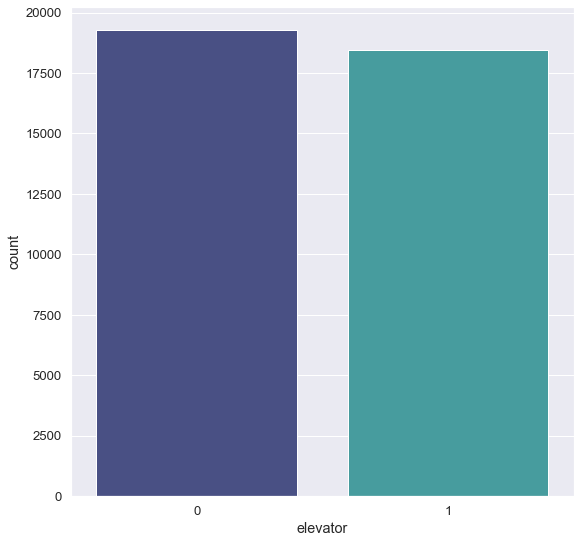

In [85]:
print('elevator')

print(df['elevator'].value_counts())
sns.countplot(x='elevator',data=df,palette='mako')


maids_room
0    19828
1    17881
Name: security, dtype: int64


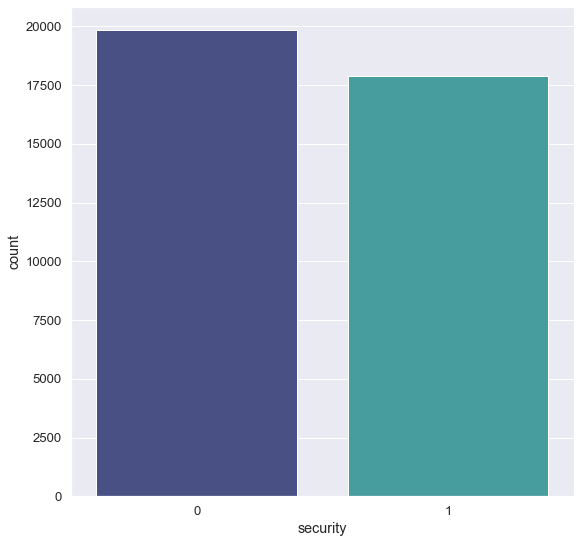

In [86]:
print('maids_room')

print(df['security'].value_counts())
sns.countplot(x='security',data=df,palette='mako')


landline
0    23769
1    13940
Name: landline, dtype: int64


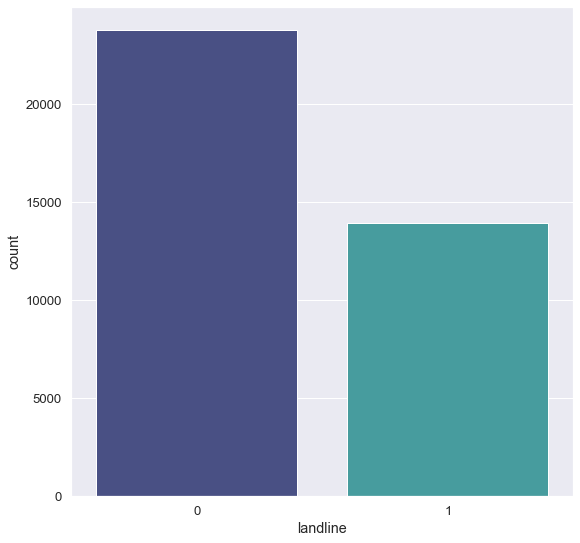

In [87]:
print('landline')

print(df['landline'].value_counts())
sns.countplot(x='landline',data=df,palette='mako')


pets_allowed
0    24727
1    12982
Name: pets_allowed, dtype: int64


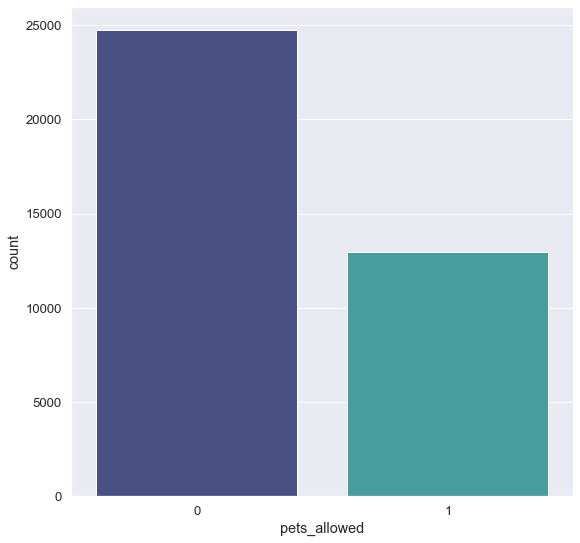

In [88]:
print('pets_allowed')

print(df['pets_allowed'].value_counts())
sns.countplot(x='pets_allowed',data=df,palette='mako')


covered_parking
0    24875
1    12834
Name: covered_parking, dtype: int64


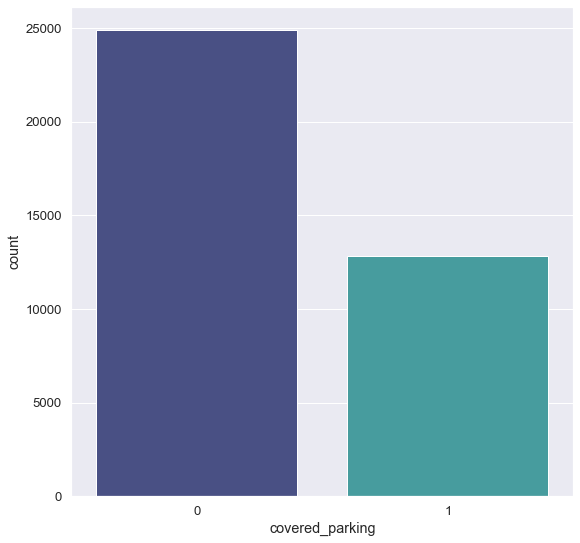

In [89]:
print('covered_parking')

print(df['covered_parking'].value_counts())
sns.countplot(x='covered_parking',data=df,palette='mako')


maids_room
0    29450
1     8259
Name: private_garden, dtype: int64


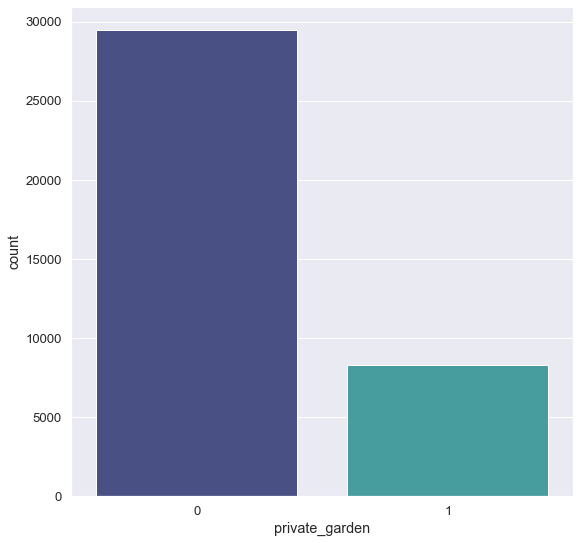

In [90]:
print('maids_room')

print(df['private_garden'].value_counts())
sns.countplot(x='private_garden',data=df,palette='mako')


pool
0    32777
1     4932
Name: pool, dtype: int64


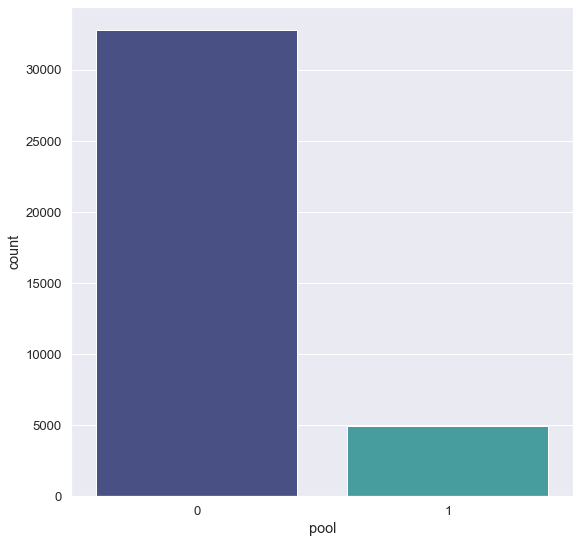

In [91]:
print('pool')

print(df['pool'].value_counts())
sns.countplot(x='pool',data=df,palette='mako')



maids_room
0    33661
1     4048
Name: maids_room, dtype: int64


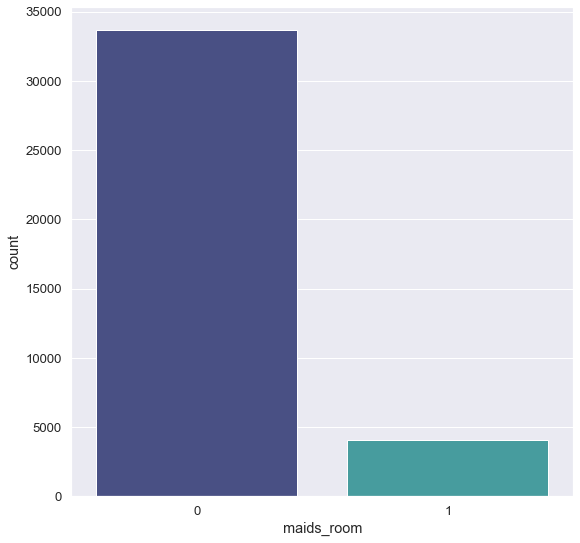

In [92]:
print('maids_room')
print(df['maids_room'].value_counts())
sns.countplot(x='maids_room',data=df,palette='mako')



central_ac_heating
0    33466
1     4243
Name: central_ac_heating, dtype: int64


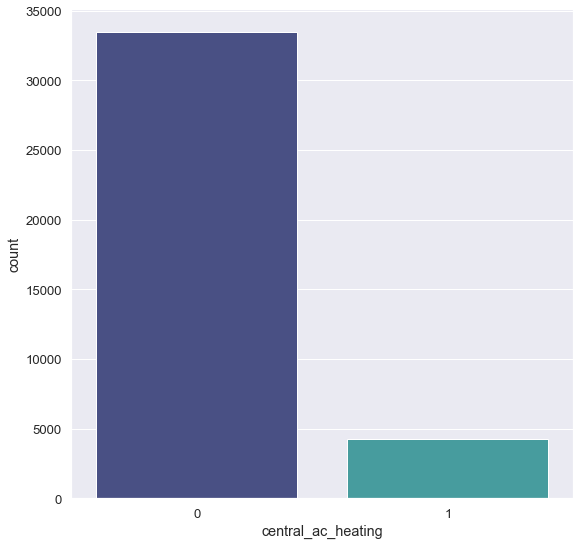

In [93]:
print('central_ac_heating')

print(df['central_ac_heating'].value_counts())
sns.countplot(x='central_ac_heating',data=df,palette='mako')



built_in_kitchen_appliances
0    33717
1     3992
Name: built_in_kitchen_appliances, dtype: int64


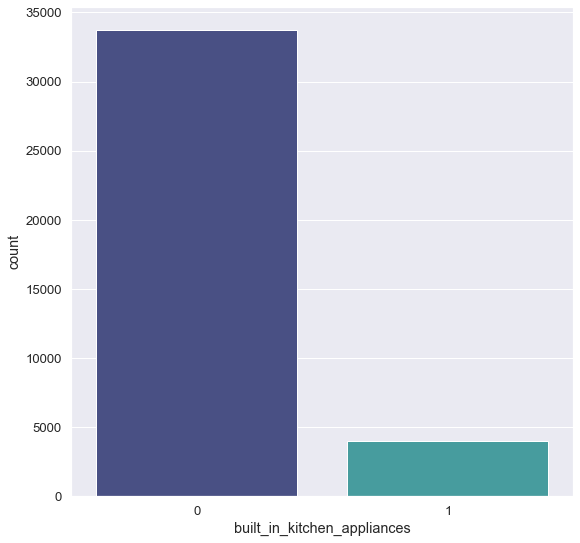

In [94]:
print('built_in_kitchen_appliances')
print(df['built_in_kitchen_appliances'].value_counts())
sns.countplot(x='built_in_kitchen_appliances',data=df,palette='mako')



# Bivariate Analaysis

In [95]:
df.corr()

price      area  furnished  down_payment  \
price                        1.000000  0.487292   0.016524     -0.062471   
area                         0.487292  1.000000  -0.006402     -0.071550   
furnished                    0.016524 -0.006402   1.000000     -0.030270   
down_payment                -0.062471 -0.071550  -0.030270      1.000000   
electricity_meter            0.013588 -0.005273   0.018528      0.051832   
balcony                      0.133018  0.122976   0.025135      0.076701   
water_meter                  0.052853  0.017768   0.012290      0.067735   
elevator                     0.131139  0.134691   0.004916      0.092766   
security                     0.216388  0.141444  -0.013618      0.079379   
natural_gas                  0.026968 -0.013288   0.040998      0.006255   
landline                     0.094865  0.045600   0.033351      0.024069   
pets_allowed                 0.187994  0.139787  -0.019694      0.100368   
covered_parking              0.182635  0.177056  -0.020091      0.155588   
private_garden               0.183757  0.068582  -0.032409      0.039961   
pool                         0.170339  0.062484  -0.017648      0.094028   
maids_room                   0.163357  0.127428   0.005349      0.040102   
central_ac_heating           0.157421  0.100152   0.095712      0.074082   
built_in_kitchen_appliances  0.124278  0.061188   0.204328     -0.008733   
month                        0.030181  0.015934   0.008210      0.000869   
meterprice                   0.885104  0.105994   0.020237     -0.034654   

                             electricity_meter   balcony  water_meter  \
price                                 0.013588  0.133018     0.052853   
area                                 -0.005273  0.122976     0.017768   
furnished                             0.018528  0.025135     0.012290   
down_payment                          0.051832  0.076701     0.067735   
electricity_meter                     1.000000  0.419090     0.783600   
balcony                               0.419090  1.000000     0.434283   
water_meter                           0.783600  0.434283     1.000000   
elevator                              0.497823  0.467349     0.518309   
security                              0.370443  0.549537     0.426298   
natural_gas                           0.662476  0.328307     0.637366   
landline                              0.563247  0.375955     0.607894   
pets_allowed                          0.363860  0.468104     0.407593   
covered_parking                       0.360521  0.466516     0.398077   
private_garden                        0.148380  0.203412     0.187429   
pool                                  0.213956  0.266794     0.249886   
maids_room                            0.216888  0.256307     0.235548   
central_ac_heating                    0.235082  0.256039     0.256138   
built_in_kitchen_appliances           0.224582  0.220424     0.229323   
month                                 0.015314  0.013284     0.011276   
meterprice                            0.018096  0.120660     0.058184   

                             elevator  security  natural_gas  landline  \
price                        0.131139  0.216388     0.026968  0.094865   
area                         0.134691  0.141444    -0.013288  0.045600   
furnished                    0.004916 -0.013618     0.040998  0.033351   
down_payment                 0.092766  0.079379     0.006255  0.024069   
electricity_meter            0.497823  0.370443     0.662476  0.563247   
balcony                      0.467349  0.549537     0.328307  0.375955   
water_meter                  0.518309  0.426298     0.637366  0.607894   
elevator                     1.000000  0.540318     0.398555  0.488243   
security                     0.540318  1.000000     0.298643  0.401010   
natural_gas                  0.398555  0.298643     1.000000  0.625508   
landline                     0.488243  0.401010     0.625508  1.000000   
pets_allowed 

### june and april are the highest price monthes  after ta3weem elgneh el masry

In [96]:
df.groupby('month')['meterprice'].mean().sort_values(ascending=False)

month
6     11212.000000
4      8470.866686
5      8438.639838
3      8172.888142
2      8162.133072
9      7131.250000
8      6500.000000
1      5772.421053
10     5525.666667
12     5207.666667
11     4842.250000
7       750.000000
Name: meterprice, dtype: float64

### semi finished has higher meter price than core & shell and core and shell apartements are more available

In [97]:
df.groupby('delivery_term')['meterprice'].mean().sort_values(ascending=False)

delivery_term
Semi Finished    9450.888516
Finished         9278.738075
Core & Shell     6798.396778
Not Finished     5322.909956
Name: meterprice, dtype: float64

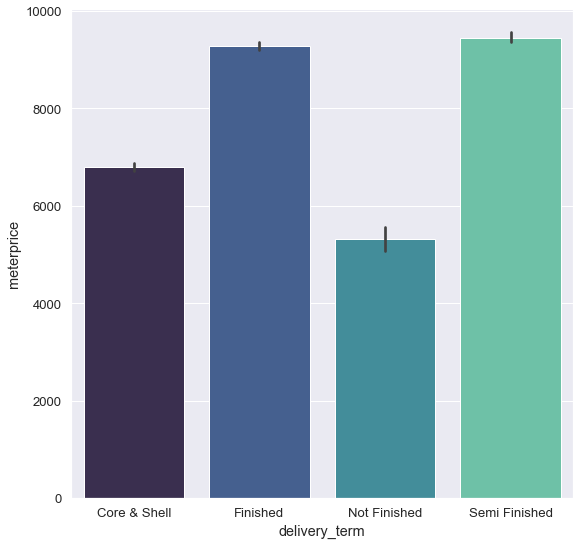

In [98]:
sns.barplot(y='meterprice',x='delivery_term',data=df,estimator=np.mean,palette="mako")

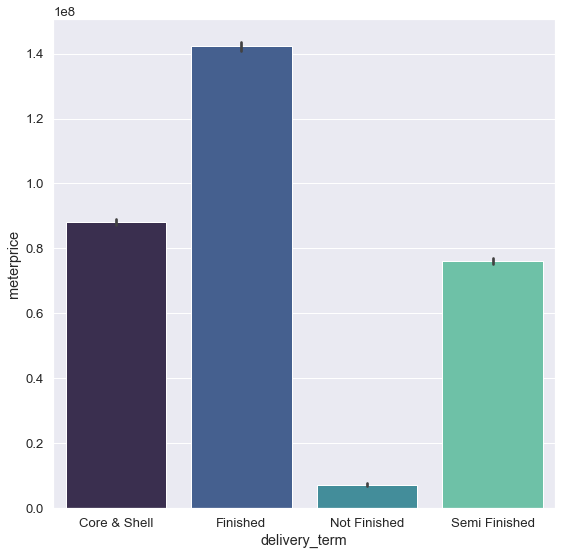

In [99]:
sns.barplot(y='meterprice',x='delivery_term',data=df,estimator=np.sum,palette="mako")

### 2027 has the highest meter price

In [100]:
df.groupby('delivery_date')['meterprice'].mean().sort_values(ascending=False)

delivery_date
2027               13139.000000
2030               12234.000000
2026               10605.686047
2025                9753.130165
2024                9330.788743
2023                8496.620172
Ready to move       8310.087450
2022                8064.485294
within 6 months     7551.100427
soon                7187.300747
2028                4705.000000
Name: meterprice, dtype: float64

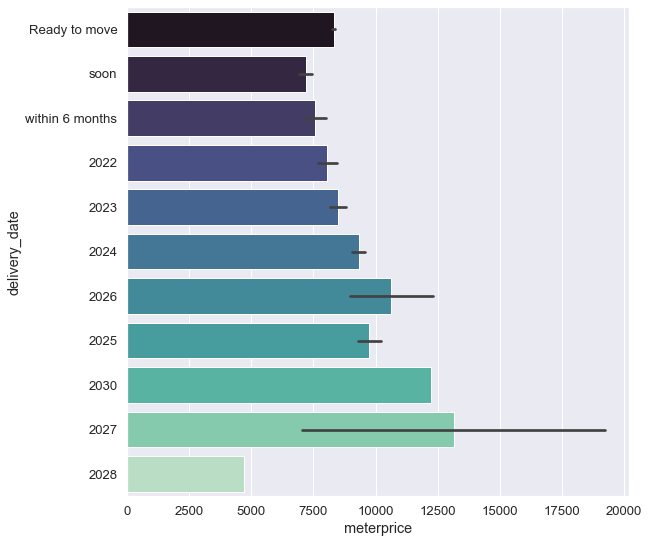

In [101]:
sns.barplot(x='meterprice',y='delivery_date',data=df,estimator=np.mean,palette="mako")

### 2027 mean higher value might be because of the low number of rows 

In [102]:
df[df['delivery_date']=='2027']['meterprice'].mean()

13139.0

In [103]:
df[df['delivery_date']=='2027']

url  \
15250  https://www.olx.com.eg/en/ad/before-price-incr...   
29745  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   

                                                   title        date  \
15250  Before price increase ,Fully Finished Apartmen...  2022-04-10   
29745                     شقه للبيع ارقي مكان في التحرير  2022-03-01   

                     location         compound       type    price  area  \
15250  New Cairo - El Tagamoa  Not in Compound  Apartment  1170000   166   
29745          Downtown Cairo  Not in Compound  Apartment  2500000   130   

      bedrooms level  ...  landline pets_allowed covered_parking  \
15250        3     5  ...         1            1               1   
29745        3     4  ...         0            0               0   

      private_garden pool maids_room central_ac_heating  \
15250              1    1          1                  1   
29745              0    0          0                  0   

      built_in_kitchen_appliances  month  meterprice  
15250                           1      4        7048  
29745                           0      3       19230  

[2 rows x 35 columns]

### 2024 have some deliverables that are more than other not so soon dates 

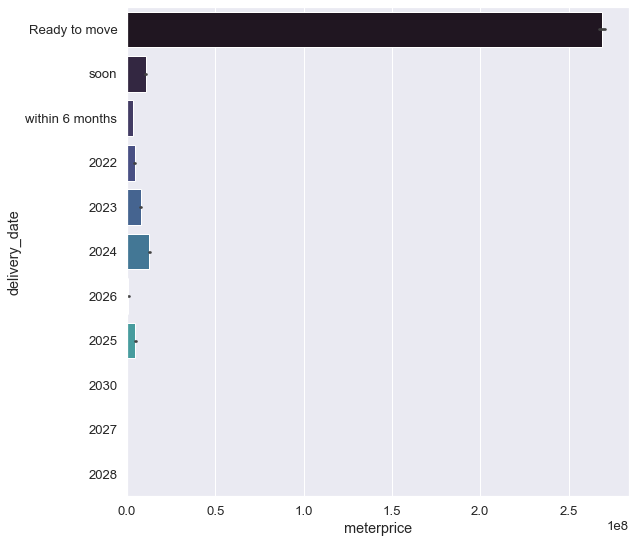

In [104]:
sns.barplot(x='meterprice',y='delivery_date',data=df,estimator=np.sum,palette="mako")

### zamalek have the higest meter price value

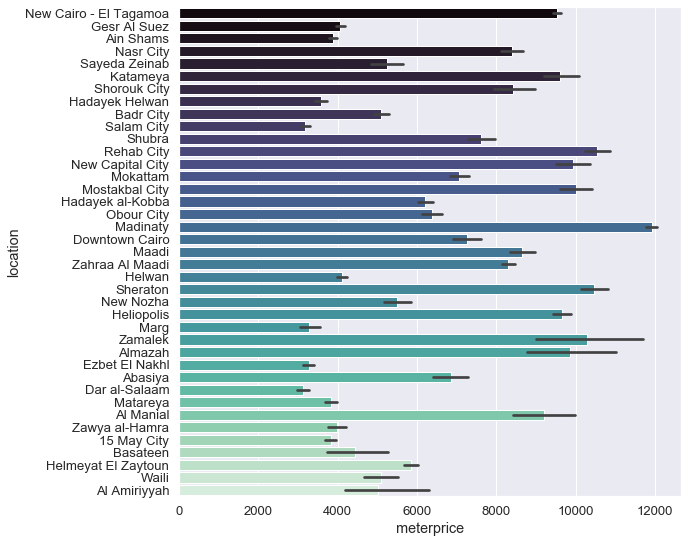

In [105]:
sns.barplot(x='meterprice',y='location',data=df,estimator=np.mean,palette="mako")

### the highest levels are lowest prices (might be because of Erosion effects and the risk of elevators might not work properly)

In [106]:
df.groupby('level')['meterprice'].mean().sort_values(ascending=False)

level
Ground    9521.699919
2         8956.283524
1         8765.429914
3         8657.063918
4         7835.208345
5         7478.576230
6         7106.339716
7         6452.044237
8         6373.707500
9         6108.079221
10        5817.643855
10+       5641.444895
Name: meterprice, dtype: float64

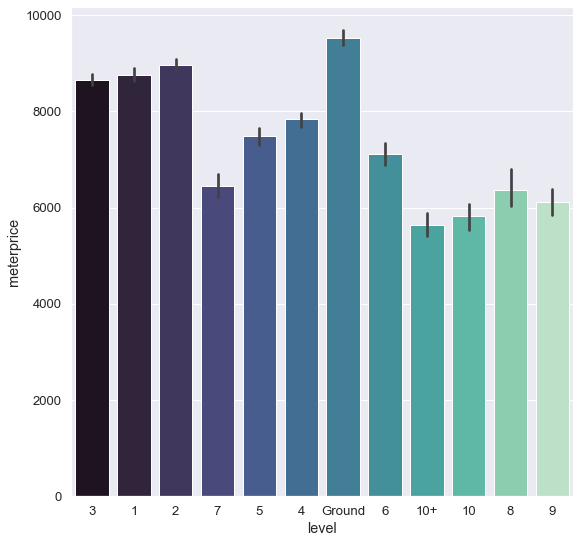

In [107]:
sns.barplot(x='level',y='meterprice',data=df,estimator=np.mean,palette="mako")

### elevator plays a rule in the price of high levels in the building but still high levels are lowest value levels


In [108]:
x=pd.pivot_table(index='level',values='meterprice',columns='elevator',data=df,aggfunc=np.mean)
x

elevator            0             1
level                              
1         8150.394187   9415.944387
10        5368.259786   6107.935632
10+       5360.610487   5855.681429
2         8745.606905   9175.220912
3         7616.469111   9570.072754
4         6614.759067   9172.781942
5         6182.276687   9160.875796
6         5944.710638   8267.968794
7         5601.593052   7203.649123
8         5946.811209   6687.629067
9         5813.861446   6331.093607
Ground    9117.688596  10124.058853

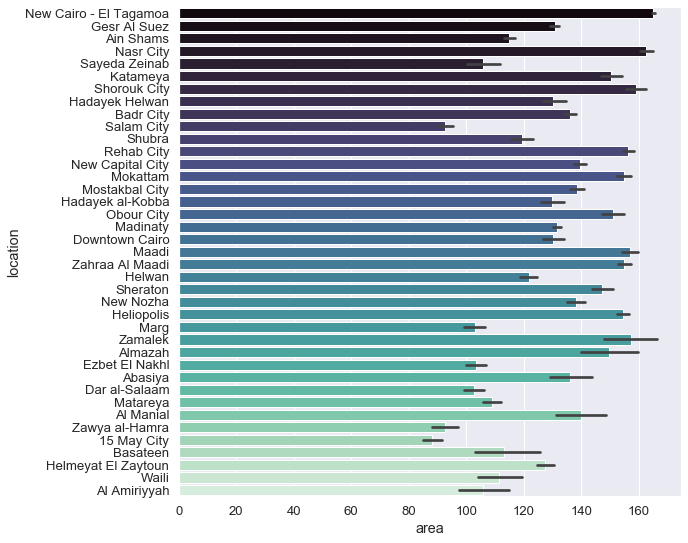

In [109]:
sns.barplot(x='area',y='location',data=df,estimator=np.mean,palette="mako")

we can see when the area is bigger the price is raising 

#### outlier

In [110]:
df[(df['location']=='Helmeyat El Zaytoun') & (df['area']> 1000)] 

Empty DataFrame
Columns: [url, title, date, location, compound, type, price, area, bedrooms, level, furnished, price_type, bathrooms, payment_option, description, amenities, delivery_term, delivery_date, down_payment, electricity_meter, balcony, water_meter, elevator, security, natural_gas, landline, pets_allowed, covered_parking, private_garden, pool, maids_room, central_ac_heating, built_in_kitchen_appliances, month, meterprice]
Index: []

[0 rows x 35 columns]

In [111]:
df.groupby('location')['meterprice'].describe()

count          mean          std     min      25%  \
location                                                                      
15 May City               193.0   3829.051813  1123.239992   333.0  3157.00   
Abasiya                    89.0   6862.640449  2058.142914   906.0  5925.00   
Ain Shams                1118.0   3886.686047  1740.639712   200.0  2876.25   
Al Amiriyyah               72.0   5025.986111  5043.230595   300.0  3459.25   
Al Manial                  85.0   9204.482353  3598.517299   205.0  6684.00   
Almazah                    79.0   9869.012658  5035.988105  1217.0  7086.50   
Badr City                1684.0   5102.964371  3749.009494   218.0  3000.00   
Basateen                   46.0   4446.173913  2742.592969  1741.0  2666.25   
Dar al-Salaam             199.0   3123.668342  1077.884643   333.0  2500.00   
Downtown Cairo            641.0   7255.383775  4578.028858   189.0  3942.00   
Ezbet El Nakhl            196.0   3275.846939   983.827511   333.0  2702.75   
Gesr Al Suez             1561.0   4064.047406  2212.971576   181.0  2666.00   
Hadayek Helwan            346.0   3576.508671  1439.915940   205.0  2508.25   
Hadayek al-Kobba          394.0   6214.365482  1939.886018   520.0  5000.00   
Heliopolis               1623.0   9654.316081  4794.902065   205.0  6050.00   
Helmeyat El Zaytoun       611.0   5847.011457  2087.333042   250.0  4702.50   
Helwan                    848.0   4123.375000  1894.340306   166.0  2921.50   
Katameya                  496.0   9605.631048  4852.765249   200.0  6880.25   
Maadi                     677.0   8652.163959  4238.260914   117.0  6097.00   
Madinaty                 3818.0  11917.081980  4114.168150   520.0  9850.00   
Marg                      373.0   3285.833780  2417.237340   277.0  2083.00   
Matareya                  324.0   3840.296296  1396.225673   222.0  2991.50   
Mokattam                 1224.0   7069.212418  4167.454292   196.0  5283.00   
Mostakbal City            750.0  10000.766667  5614.086770   554.0  5416.00   
Nasr City                1174.0   8394.356048  5018.352083   200.0  5241.00   
New Cairo - El Tagamoa  12948.0   9521.273015  5541.272392   116.0  6085.00   
New Capital City          705.0   9931.136170  5652.119629   208.0  5997.00   
New Nozha                 357.0   5509.098039  3165.453719   181.0  2758.00   
Obour City                364.0   6386.181319  2562.582910   200.0  5000.00   
Rehab City               1250.0  10526.596000  5822.136776   476.0  6500.00   
Salam City                429.0   3189.934732  1131.813215   312.0  2444.00   
Sayeda Zeinab              93.0   5257.892473  1988.792421   600.0  3882.00   
Sheraton                  467.0  10462.490364  3624.467300   461.0  8585.50   
Shorouk City              578.0   8419.974048  6657.627746   509.0  5155.75   
Shubra                    464.0   7627.036638  3635.103557   150.0  4940.25   
Waili                     102.0   5106.803922  2255.854461   400.0  3156.50   
Zahraa Al Maadi          1084.0   8302.518450  2872.378428   136.0  6782.25   
Zamalek                    97.0  10289.123711  6943.419206   605.0  5363.00   
Zawya al-Hamra            150.0   3994.493333  1468.684430   330.0  3062.50   

                            50%       75%       max  
location                                             
15 May City              3777.0   4500.00    8461.0  
Abasiya                  6923.0   7878.00   10800.0  
Ain Shams                3600.0   4500.00   18750.0  
Al Amiriyyah             4000.0   5606.25   45000.0  
Al Manial                9189.0  11785.00   16428.0  
Almazah                  9090.0  12224.50   27016.0  
Badr City                3885.0   5915.25   33333.0  
Basateen                 3514.5   4628.50   13636.0  
Dar al-Salaam            3083.0   3644.50   11538.0  
Downtown Cairo           6500.0   9285.00   29411.0  
Ezbet El Nakhl           3200.0   3888.00    5882.0  
Gesr Al Suez             3600.0   5000.00   17964.0  
Hadayek Helwan           3429.

### people use installment option more than cash 

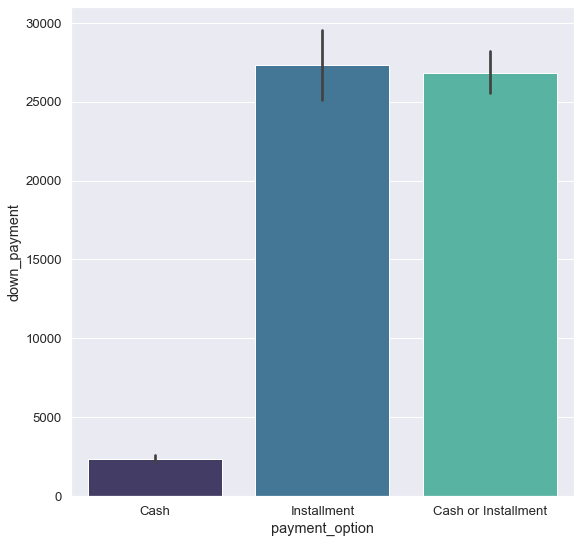

In [112]:
sns.barplot(x='payment_option', y='down_payment', data=df, estimator=np.mean,palette="mako")

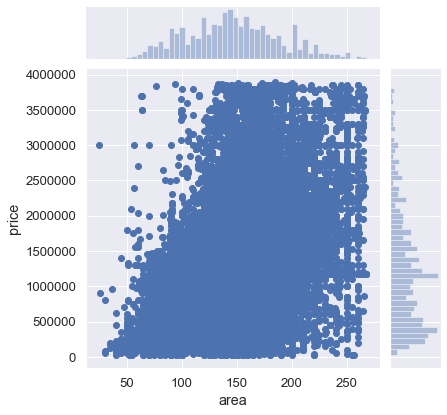

In [113]:
sns.jointplot(x='area',y='price',data=df)

In [114]:
df.groupby('location').describe()['meterprice']


count          mean          std     min      25%  \
location                                                                      
15 May City               193.0   3829.051813  1123.239992   333.0  3157.00   
Abasiya                    89.0   6862.640449  2058.142914   906.0  5925.00   
Ain Shams                1118.0   3886.686047  1740.639712   200.0  2876.25   
Al Amiriyyah               72.0   5025.986111  5043.230595   300.0  3459.25   
Al Manial                  85.0   9204.482353  3598.517299   205.0  6684.00   
Almazah                    79.0   9869.012658  5035.988105  1217.0  7086.50   
Badr City                1684.0   5102.964371  3749.009494   218.0  3000.00   
Basateen                   46.0   4446.173913  2742.592969  1741.0  2666.25   
Dar al-Salaam             199.0   3123.668342  1077.884643   333.0  2500.00   
Downtown Cairo            641.0   7255.383775  4578.028858   189.0  3942.00   
Ezbet El Nakhl            196.0   3275.846939   983.827511   333.0  2702.75   
Gesr Al Suez             1561.0   4064.047406  2212.971576   181.0  2666.00   
Hadayek Helwan            346.0   3576.508671  1439.915940   205.0  2508.25   
Hadayek al-Kobba          394.0   6214.365482  1939.886018   520.0  5000.00   
Heliopolis               1623.0   9654.316081  4794.902065   205.0  6050.00   
Helmeyat El Zaytoun       611.0   5847.011457  2087.333042   250.0  4702.50   
Helwan                    848.0   4123.375000  1894.340306   166.0  2921.50   
Katameya                  496.0   9605.631048  4852.765249   200.0  6880.25   
Maadi                     677.0   8652.163959  4238.260914   117.0  6097.00   
Madinaty                 3818.0  11917.081980  4114.168150   520.0  9850.00   
Marg                      373.0   3285.833780  2417.237340   277.0  2083.00   
Matareya                  324.0   3840.296296  1396.225673   222.0  2991.50   
Mokattam                 1224.0   7069.212418  4167.454292   196.0  5283.00   
Mostakbal City            750.0  10000.766667  5614.086770   554.0  5416.00   
Nasr City                1174.0   8394.356048  5018.352083   200.0  5241.00   
New Cairo - El Tagamoa  12948.0   9521.273015  5541.272392   116.0  6085.00   
New Capital City          705.0   9931.136170  5652.119629   208.0  5997.00   
New Nozha                 357.0   5509.098039  3165.453719   181.0  2758.00   
Obour City                364.0   6386.181319  2562.582910   200.0  5000.00   
Rehab City               1250.0  10526.596000  5822.136776   476.0  6500.00   
Salam City                429.0   3189.934732  1131.813215   312.0  2444.00   
Sayeda Zeinab              93.0   5257.892473  1988.792421   600.0  3882.00   
Sheraton                  467.0  10462.490364  3624.467300   461.0  8585.50   
Shorouk City              578.0   8419.974048  6657.627746   509.0  5155.75   
Shubra                    464.0   7627.036638  3635.103557   150.0  4940.25   
Waili                     102.0   5106.803922  2255.854461   400.0  3156.50   
Zahraa Al Maadi          1084.0   8302.518450  2872.378428   136.0  6782.25   
Zamalek                    97.0  10289.123711  6943.419206   605.0  5363.00   
Zawya al-Hamra            150.0   3994.493333  1468.684430   330.0  3062.50   

                            50%       75%       max  
location                                             
15 May City              3777.0   4500.00    8461.0  
Abasiya                  6923.0   7878.00   10800.0  
Ain Shams                3600.0   4500.00   18750.0  
Al Amiriyyah             4000.0   5606.25   45000.0  
Al Manial                9189.0  11785.00   16428.0  
Almazah                  9090.0  12224.50   27016.0  
Badr City                3885.0   5915.25   33333.0  
Basateen                 3514.5   4628.50   13636.0  
Dar al-Salaam            3083.0   3644.50   11538.0  
Downtown Cairo           6500.0   9285.00   29411.0  
Ezbet El Nakhl           3200.0   3888.00    5882.0  
Gesr Al Suez             3600.0   5000.00   17964.0  
Hadayek Helwan           3429.

Sorting the meterprice per location as we see 

we can see **Zamalek** is the most expensive for meter per price 

**Dar al-Salaam** is the least expensive for meter per price 

In [115]:
print(df.groupby('location').mean()['meterprice'].nlargest(60))


location
Madinaty                  11917.081980
Rehab City                10526.596000
Sheraton                  10462.490364
Zamalek                   10289.123711
Mostakbal City            10000.766667
New Capital City           9931.136170
Almazah                    9869.012658
Heliopolis                 9654.316081
Katameya                   9605.631048
New Cairo - El Tagamoa     9521.273015
Al Manial                  9204.482353
Maadi                      8652.163959
Shorouk City               8419.974048
Nasr City                  8394.356048
Zahraa Al Maadi            8302.518450
Shubra                     7627.036638
Downtown Cairo             7255.383775
Mokattam                   7069.212418
Abasiya                    6862.640449
Obour City                 6386.181319
Hadayek al-Kobba           6214.365482
Helmeyat El Zaytoun        5847.011457
New Nozha                  5509.098039
Sayeda Zeinab              5257.892473
Waili                      5106.803922
Badr City       

location
15 May City                3829.051813
Abasiya                    6862.640449
Ain Shams                  3886.686047
Al Amiriyyah               5025.986111
Al Manial                  9204.482353
Almazah                    9869.012658
Badr City                  5102.964371
Basateen                   4446.173913
Dar al-Salaam              3123.668342
Downtown Cairo             7255.383775
Ezbet El Nakhl             3275.846939
Gesr Al Suez               4064.047406
Hadayek Helwan             3576.508671
Hadayek al-Kobba           6214.365482
Heliopolis                 9654.316081
Helmeyat El Zaytoun        5847.011457
Helwan                     4123.375000
Katameya                   9605.631048
Maadi                      8652.163959
Madinaty                  11917.081980
Marg                       3285.833780
Matareya                   3840.296296
Mokattam                   7069.212418
Mostakbal City            10000.766667
Nasr City                  8394.356048
New Cairo - El T

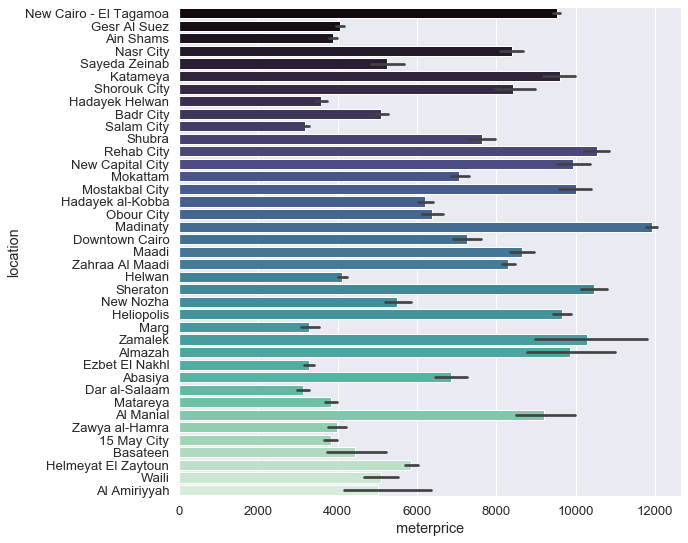

In [116]:
print(df.groupby('location').mean()['meterprice'])
sns.barplot(y='location',x='meterprice',data=df,estimator=np.mean,palette='mako')

as here we can see there are a outliers which we can deal with at after
 
 and the outlier in area because the meter price is price over area

In [117]:
print(df.groupby('location').min()['meterprice'])
df[(df['location']=='Ain Shams') & (df['meterprice']<10)]



location
15 May City                333
Abasiya                    906
Ain Shams                  200
Al Amiriyyah               300
Al Manial                  205
Almazah                   1217
Badr City                  218
Basateen                  1741
Dar al-Salaam              333
Downtown Cairo             189
Ezbet El Nakhl             333
Gesr Al Suez               181
Hadayek Helwan             205
Hadayek al-Kobba           520
Heliopolis                 205
Helmeyat El Zaytoun        250
Helwan                     166
Katameya                   200
Maadi                      117
Madinaty                   520
Marg                       277
Matareya                   222
Mokattam                   196
Mostakbal City             554
Nasr City                  200
New Cairo - El Tagamoa     116
New Capital City           208
New Nozha                  181
Obour City                 200
Rehab City                 476
Salam City                 312
Sayeda Zeinab              600

C:\Users\Commandor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [url, title, date, location, compound, type, price, area, bedrooms, level, furnished, price_type, bathrooms, payment_option, description, amenities, delivery_term, delivery_date, down_payment, electricity_meter, balcony, water_meter, elevator, security, natural_gas, landline, pets_allowed, covered_parking, private_garden, pool, maids_room, central_ac_heating, built_in_kitchen_appliances, month, meterprice]
Index: []

[0 rows x 35 columns]

In [118]:
df[(df['location']=='Badr City') & (df['meterprice']==1)]

Empty DataFrame
Columns: [url, title, date, location, compound, type, price, area, bedrooms, level, furnished, price_type, bathrooms, payment_option, description, amenities, delivery_term, delivery_date, down_payment, electricity_meter, balcony, water_meter, elevator, security, natural_gas, landline, pets_allowed, covered_parking, private_garden, pool, maids_room, central_ac_heating, built_in_kitchen_appliances, month, meterprice]
Index: []

[0 rows x 35 columns]

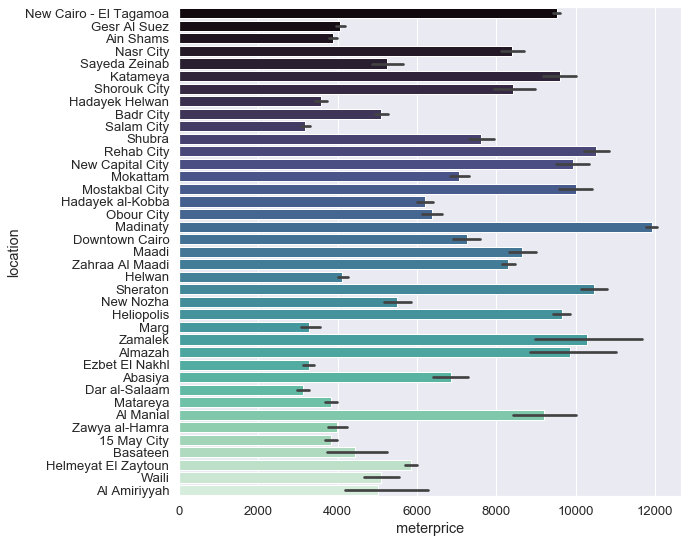

In [119]:
sns.barplot(y='location',x='meterprice',data=df,estimator=np.mean,palette='mako')

the most down_payment value is in New Capital City as we can see 

In [120]:
print(df.groupby('location').mean()['down_payment'].nlargest(10))


location
New Capital City    52054.889362
Mostakbal City      33018.670667
Badr City           26423.368765
Shorouk City        21628.562284
Zahraa Al Maadi     17136.837638
Rehab City          16913.744000
Heliopolis          15874.091805
Almazah             15009.493671
Katameya            14243.885081
Maadi               12366.505170
Name: down_payment, dtype: float64


In [121]:
df.index[1357]

1357

location
15 May City               11054.145078
Abasiya                       9.550562
Ain Shams                  6430.186047
Al Amiriyyah              12104.416667
Al Manial                     0.000000
Almazah                   15009.493671
Badr City                 26423.368765
Basateen                   4576.739130
Dar al-Salaam              6382.924623
Downtown Cairo             7180.173167
Ezbet El Nakhl             3908.112245
Gesr Al Suez               6623.070468
Hadayek Helwan             9270.179191
Hadayek al-Kobba           2095.959391
Heliopolis                15874.091805
Helmeyat El Zaytoun        2040.504092
Helwan                     8079.071934
Katameya                  14243.885081
Maadi                     12366.505170
Madinaty                   1146.896805
Marg                      12029.436997
Matareya                   6298.966049
Mokattam                   3164.146242
Mostakbal City            33018.670667
Nasr City                 11889.741056
New Cairo - El T

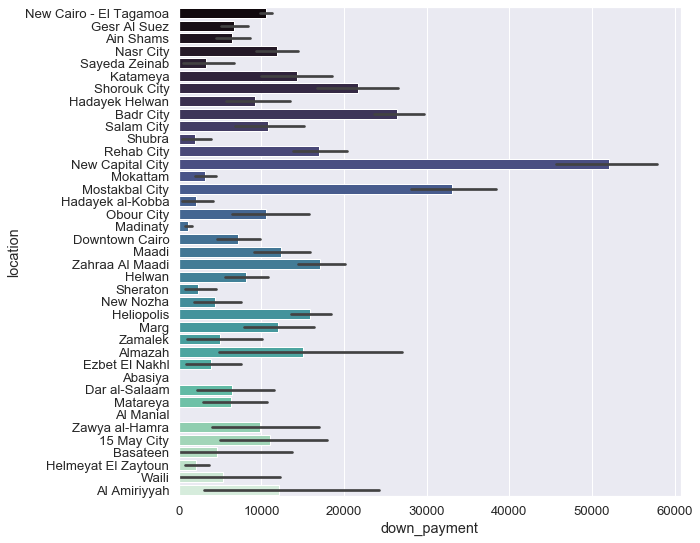

In [122]:
print(df.groupby('location').mean()['down_payment'])
sns.barplot(y='location',x='down_payment',data=df,estimator=np.mean,palette='mako')

In [123]:
# df[df['down_payment']<0]=0

Top 10 largest apartment's area


In [124]:
df.groupby('location').mean()['area'].nlargest(10)

location
New Cairo - El Tagamoa    165.121023
Nasr City                 162.668654
Shorouk City              159.000000
Zamalek                   157.164948
Maadi                     156.852290
Rehab City                156.420800
Mokattam                  154.856209
Zahraa Al Maadi           154.840406
Heliopolis                154.441158
Obour City                151.043956
Name: area, dtype: float64

location
15 May City                88.217617
Abasiya                   136.235955
Ain Shams                 114.932916
Al Amiriyyah              105.847222
Al Manial                 139.988235
Almazah                   149.797468
Badr City                 136.153207
Basateen                  113.260870
Dar al-Salaam             102.623116
Downtown Cairo            130.301092
Ezbet El Nakhl            103.505102
Gesr Al Suez              130.764894
Hadayek Helwan            130.297688
Hadayek al-Kobba          129.855330
Heliopolis                154.441158
Helmeyat El Zaytoun       127.549918
Helwan                    121.762972
Katameya                  150.495968
Maadi                     156.852290
Madinaty                  131.581456
Marg                      102.908847
Matareya                  108.842593
Mokattam                  154.856209
Mostakbal City            138.628000
Nasr City                 162.668654
New Cairo - El Tagamoa    165.121023
New Capital City          139

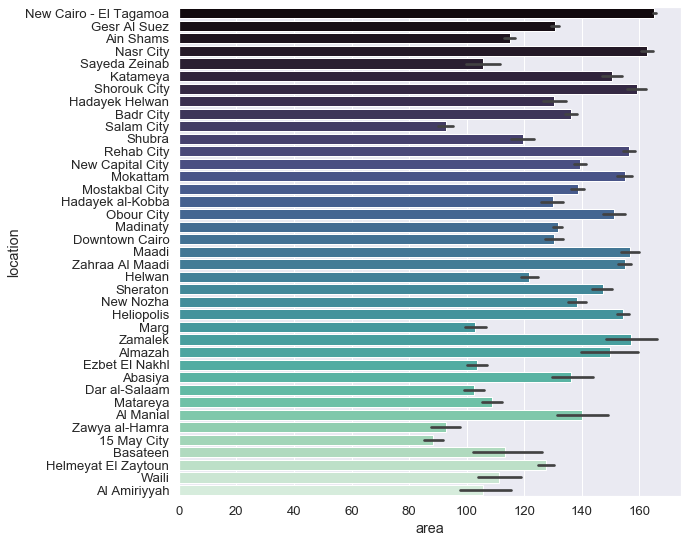

In [125]:
print(df.groupby('location').mean()['area'])
sns.barplot(y='location',x='area',data=df,estimator=np.mean,palette='mako')

In [126]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

Biggest areas are in those compound

In [127]:
df.groupby('compound').mean()['area'].nlargest(1000).head(10)


compound
Village Avenue         257.000000
Gharb Golf             250.000000
Wahet El Ryhan         235.000000
GCR Golf City          220.000000
Al Maram Landmark      214.500000
Promenade New Cairo    212.142857
Serena Heights         200.000000
Sky Capital View       200.000000
Stella Compounds       200.000000
Sun Capital            200.000000
Name: area, dtype: float64

least area size in compunds are :

In [128]:
df.groupby('compound').mean()['area'].nlargest(1000).tail()


compound
Jewels                 82.500000
Cairo Town             75.750000
Continental Gardens    75.000000
Alico city             71.444444
Haram City             65.666667
Name: area, dtype: float64

most expensive meter price in compunds are in 

In [129]:
df.groupby('compound').mean()['meterprice'].nlargest(1000).head(10)


compound
TRUE Gate                  25407.000000
Trio Gardens               19434.785714
Porto October              18875.000000
Palm Hills Katameya        17664.800000
Village Gate               17300.285714
The Village                17276.229167
Mountain View Executive    17064.807692
Valore Sheraton            16969.000000
Beta Greens                16826.529412
Katameya Plaza             16519.285714
Name: meterprice, dtype: float64

most least meter price in compunds are in 

In [130]:
df.groupby('compound').mean()['meterprice'].nlargest(1000).tail(10)


compound
Sakan Masr        2796.334928
Jada              2266.000000
Midtown Sky       2239.000000
Blue Vert         1917.000000
Dreamland         1100.000000
Wahet El Ryhan    1000.000000
Etlalah            300.000000
The Curve          205.000000
Al Rabwa           200.000000
Village Avenue     116.000000
Name: meterprice, dtype: float64

most expensive down payment in compunds are in

In [131]:
df.groupby('compound').mean()['down_payment'].nlargest(1000).head(10)


compound
Wahet El Ryhan      235000.000000
Sky Capital View    220000.000000
Stella New Cairo    180000.000000
Sueno               172620.000000
Dreamland           165000.000000
Lakefront           159180.000000
Catalan             134650.000000
Floria              133750.000000
Botanica            120602.944444
El Ofok El Gadid    120000.000000
Name: down_payment, dtype: float64

The price with Negotiable option is cheeper than Not Negotiable per meterprice

In [132]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

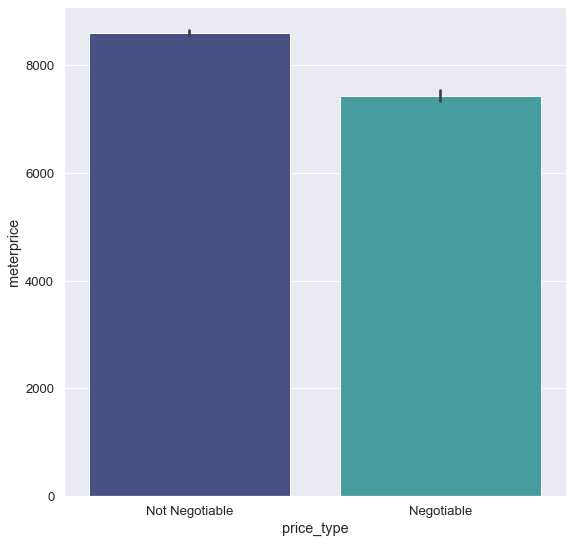

In [133]:
df.groupby('price_type').describe()['meterprice']
sns.barplot(x='price_type',y='meterprice',data=df,estimator=np.mean,palette='mako')

there was a int 3 category and '3' category so we merge it togther by replacing csv data types error

In [134]:
df[df['bedrooms']==3]

url  \
0      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
1      https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...   
2      https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...   
3      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
4      https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...   
...                                                  ...   
15628  https://www.olx.com.eg/en/ad/%D8%A7%D8%B3%D8%A...   
15629  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
15630  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
15631  https://www.olx.com.eg/en/ad/%D8%A7%D8%B1%D8%B...   
15632  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                   title        date  \
0                     شقة للبيع بسكن مصر الاندلس مسلسل 1  2022-03-01   
1          سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥  2022-04-17   
2                 لقطه سكن مصر التجمع التالت افر 150 الف  2022-05-01   
3        شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس  2022-04-29   
4                  لسرعه البيع شقه سكن مصر التجمع التالت  2022-05-01   
...                                                  ...         ...   
15628  استلم شقتك حالا في ارقي كمبوند بالقاهره الجديد...  2022-04-28   
15629  شقه للبيع تقسيط مساحه 116م ڤيو وايد جاردن B10 ...  2022-03-01   
15630             شقه للبيع في مدينتي 124 تشطيبات خرافيه  2022-04-03   
15631  ارضي بحديقه بال B10 بمدينتي بمقدم مميز و اقساط...  2022-04-26   
15632      شقة استلام فوري للبيع تقسيط بمقدم 400 الف فقط  2022-04-10   

                     location         compound       type    price  area  \
0      New Cairo - El Tagamoa       Sakan Masr  Apartment   175000   115   
1      New Cairo - El Tagamoa       Sakan Masr  Apartment   180000   115   
2      New Cairo - El Tagamoa       Sakan Masr  Apartment   150000   115   
3                Gesr Al Suez  Not in Compound  Apartment   450000   135   
4      New Cairo - El Tagamoa       Sakan Masr  Apartment   160000   115   
...                       ...              ...        ...      ...   ...   
15628               Badr City         Madinaty  Apartment  2300000   148   
15629                Madinaty         Madinaty  Apartment  1451000   116   
15630                Madinaty            Jewar  Apartment  1850000   124   
15631                Madinaty         Madinaty  Apartment  2000000   136   
15632                Madinaty         Madinaty  Apartment   400000   156   

      bedrooms   level  ...  landline pets_allowed covered_parking  \
0            3       3  ...         1            1               1   
1            3       1  ...         0            0               0   
2            3       2  ...         0            0               0   
3            3       7  ...         0            0               0   
4            3       2  ...         0            0               0   
...        ...     ...  ...       ...          ...             ...   
15628        3       2  ...         1            0               0   
15629        3       4  ...         0            0               0   
15630        3       5  ...         0            0               0   
15631        3  Ground  ...         1            1               0   
15632        3       2  ...         1            1               1   

      private_garden pool maids_room central_ac_heating  \
0                  1    0          0                  0   
1                  0    0          0                  0   
2                  0    0          0                  0   
3                  0    0          0                  0   
4                  0    0          0                  0   
...              ...  ...        ...                ...   
15628              0    1          0                  0   
15629              1    0          0                  0   
15630              0    0          0                  0   
15631              1    0          0                  0   
15632              1    1          1                  1   

    

In [135]:
df[df['bedrooms']=='3']

url  \
17515  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
17516  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
17517  https://www.olx.com.eg/en/ad/e-%D8%B4%D9%82%D9...   
17518  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
17519  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
...                                                  ...   
37700  https://www.olx.com.eg/en/ad/%D8%AC%D9%86%D8%A...   
37702  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37704  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37705  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37708  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                   title        date  \
17515  شقه ٢٠٠م نموذج 400 تمليك بجوار الخدمات و الاوب...  2022-04-26   
17516  شقة 149 متر ارضي للبييييع بمدينتي تقسييييييييي...  2022-03-01   
17517    #E شقه للبيع فى مدينتى 165م فى ارقى المناطق B10  2022-05-01   
17518  شقة 149 متر ارضي للبييييع بمدينتي وااااايد جاا...  2022-03-01   
17519        شقه مميزه جدا في مدينتي على اكبر وايد جاردن  2022-03-01   
...                                                  ...         ...   
37700                     جنة للتسويق والاستثمار العقاري  2022-05-01   
37702  شقة بمجاورة ٢٢ فيو متميز بحري غير مجروحة نهائي...  2022-05-01   
37704          شقة للبيع إمتداد مدينة 15 مايو مساحة 125م  2022-05-01   
37705                 شقة للبيع بكمبوند دار مصر دور ثالث  2022-05-01   
37708             شقة دور ارضي مرتفع سوبر لوكس مجاورة 15  2022-04-10   

          location         compound       type    price  area bedrooms  \
17515     Madinaty            Jewar  Apartment  3200000   203        3   
17516     Madinaty         Madinaty  Apartment   750000   149        3   
17517     Madinaty         Madinaty  Apartment   655000   165        3   
17518     Madinaty         Madinaty  Apartment   750000   149        3   
17519     Madinaty          The Key  Apartment   400000   165        3   
...            ...              ...        ...      ...   ...      ...   
37700  15 May City  Not in Compound  Apartment   550000   140        3   
37702  15 May City  Not in Compound  Apartment   520000   120        3   
37704  15 May City  Not in Compound  Apartment   550000   125        3   
37705  15 May City         Dar Misr  Apartment   600000   140        3   
37708  15 May City  Not in Compound  Apartment   440000   105        3   

        level  ...  landline pets_allowed covered_parking private_garden pool  \
17515       5  ...         0            0               0              0    0   
17516  Ground  ...         0            0               0              1    0   
17517       1  ...         0            0               0              1    0   
17518  Ground  ...         0            0               0              1    0   
17519       4  ...         1            0               0              1    0   
...       ...  ...       ...          ...             ...            ...  ...   
37700       3  ...         1            0               0              0    0   
37702       4  ...         0            0               0              0    0   
37704       2  ...         0            0               0              0    0   
37705       3  ...         0            0               0              0    0   
37708  Ground  ...         0            0               0              0    0   

      maids_room central_ac_heating built_in_kitchen_appliances  month  \
17515          0                  0                           1      4   
17516          0                  0                           0      3   
17517          0                  0                           0      5   
17518          0                  0                           0      3   
17519          0                  0                           0      3   
...          ...                ...                         ...    ...   
37700          0                  0                           0      5   
37702        

In [136]:
df['bedrooms']=df['bedrooms'].astype(str)


In [137]:
df['bedrooms'].value_counts()

3      25216
2      11354
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64

as we see  apartments with 3 bedroom are the most expensive 

and with 

bedrooms
3      199666860
2      105697569
4        4973646
1        2439299
5         532339
6         268995
7          40448
8          30860
10+        22807
10         13112
9          12473
Name: meterprice, dtype: int64


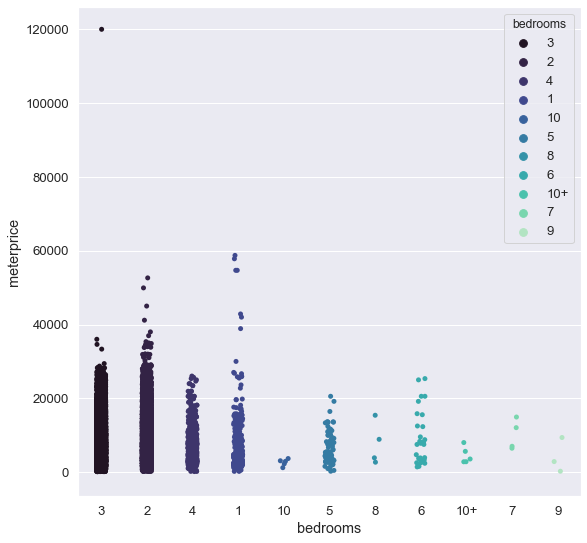

In [138]:
print(df.groupby('bedrooms').sum()['meterprice'].nlargest(20))

sns.stripplot(y='meterprice',x='bedrooms',hue='bedrooms' ,data=df, color="#474646",palette='mako')

In [139]:
df['bathrooms']=df['bathrooms'].astype(str)

In [140]:
df['bedrooms'].value_counts()

3      25216
2      11354
4        681
1        331
5         77
6         29
10         5
10+        5
8          4
7          4
9          3
Name: bedrooms, dtype: int64

s

In [141]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

bathrooms
2      145847212
3       95184021
1       71623363
4         865417
5          73256
7          32956
8          22091
6          16181
10         15267
10+        13867
9           4777
Name: meterprice, dtype: int64


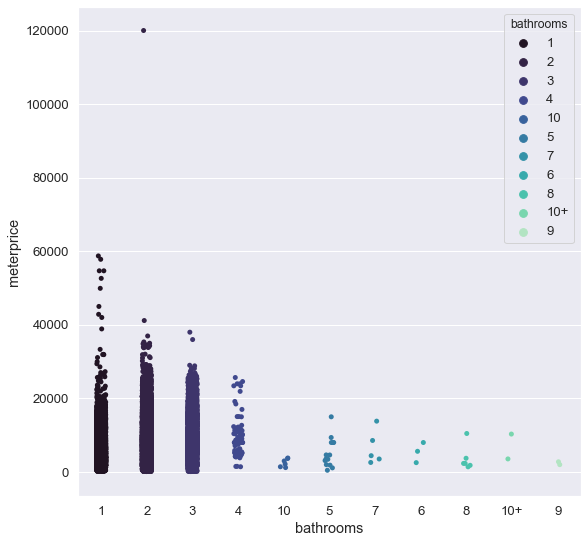

In [142]:
print(df.groupby('bathrooms').sum()['meterprice'].nlargest(20))

sns.stripplot(y='meterprice',x='bathrooms',hue='bathrooms' ,data=df, color="#474646",palette='mako')

people perfer to buy with Installment rather than cash maybe it's new brides apart

payment_option
Installment            9179.103791
Cash or Installment    8244.341718
Cash                   8212.846557
Name: meterprice, dtype: float64


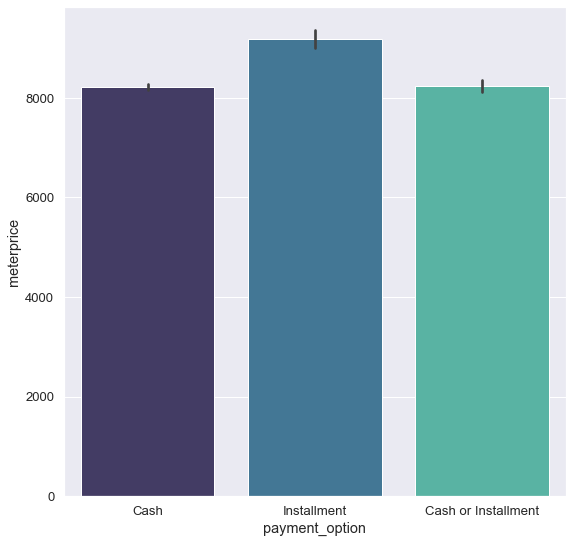

In [143]:
print(df.groupby('payment_option').mean()['meterprice'].nlargest(20))

sns.barplot(x='payment_option',y='meterprice' ,data=df, color="#474646",palette='mako')

In [144]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

In [145]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

as we see this is a logical data the price of finished meter is more expensive than all other options

delivery_term
Semi Finished    9450.888516
Finished         9278.738075
Core & Shell     6798.396778
Not Finished     5322.909956
Name: meterprice, dtype: float64


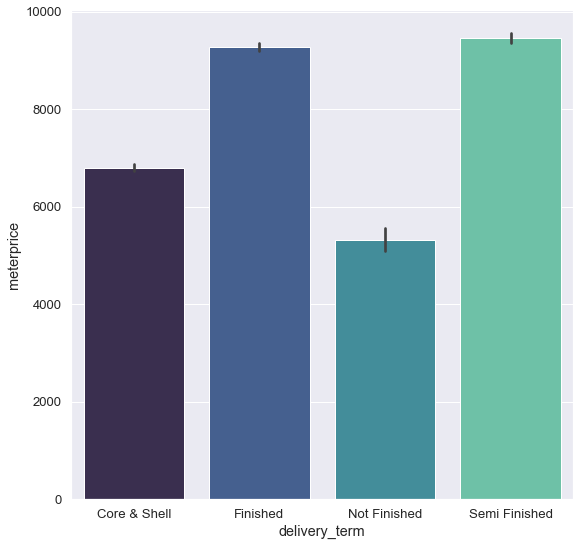

In [146]:
print(df.groupby('delivery_term').mean()['meterprice'].nlargest(20))

sns.barplot(x='delivery_term',y='meterprice' ,data=df, color="#474646",palette='mako')

it's logical to see the ready to move is the most expensive

delivery_date
Ready to move      268831329
2024                12764519
soon                10586894
2023                 7918850
2025                 4720515
2022                 4387080
within 6 months      3533915
2026                  912089
2027                   26278
2030                   12234
2028                    4705
Name: meterprice, dtype: int64


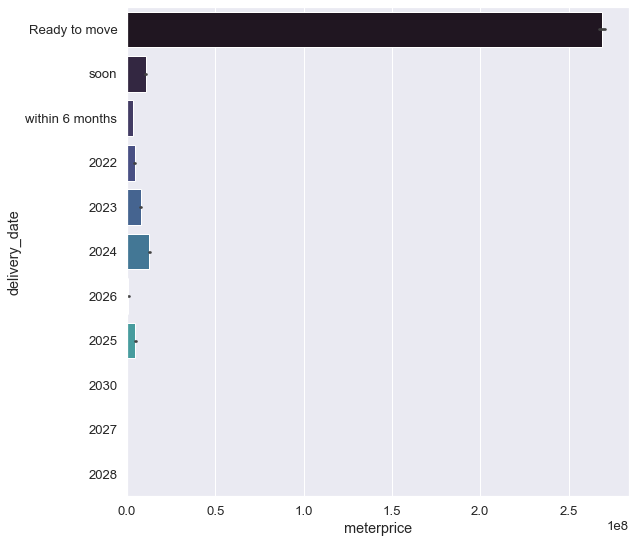

In [147]:
print(df.groupby('delivery_date').sum()['meterprice'].nlargest(20))

sns.barplot(y='delivery_date',x='meterprice' ,data=df,estimator=np.sum, color="#474646",palette='mako')

electricity_meter
1    183405991
0    130292417
Name: meterprice, dtype: int64


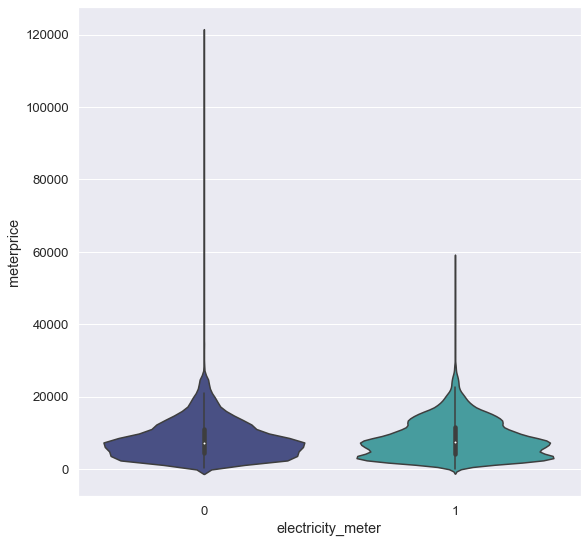

In [148]:
print(df.groupby('electricity_meter').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='electricity_meter' ,data=df,estimator=np.sum, color="#474646",palette='mako')



In [149]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

balcony
1    193158020
0    120540388
Name: meterprice, dtype: int64


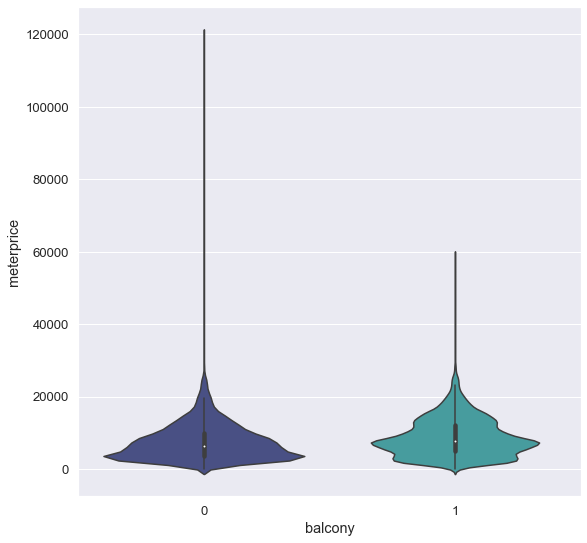

In [150]:
print(df.groupby('balcony').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='balcony' ,data=df,estimator=np.sum, color="#474646",palette='mako')



water_meter
1    171257530
0    142440878
Name: meterprice, dtype: int64


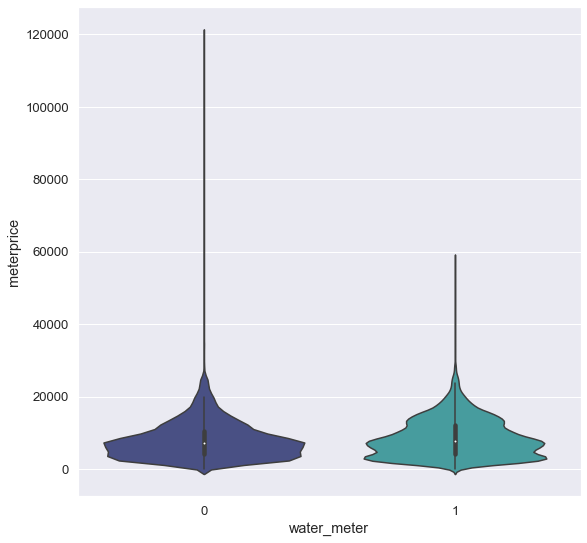

In [151]:
print(df.groupby('water_meter').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='water_meter' ,data=df,estimator=np.sum, color="#474646",palette='mako')



elevator
1    165589307
0    148109101
Name: meterprice, dtype: int64


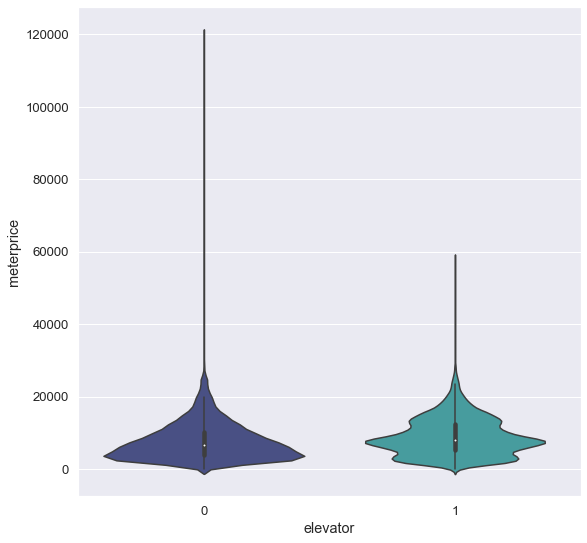

In [152]:
print(df.groupby('elevator').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='elevator' ,data=df,estimator=np.sum, color="#474646",palette='mako')



In [153]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

security
1    170925215
0    142773193
Name: meterprice, dtype: int64


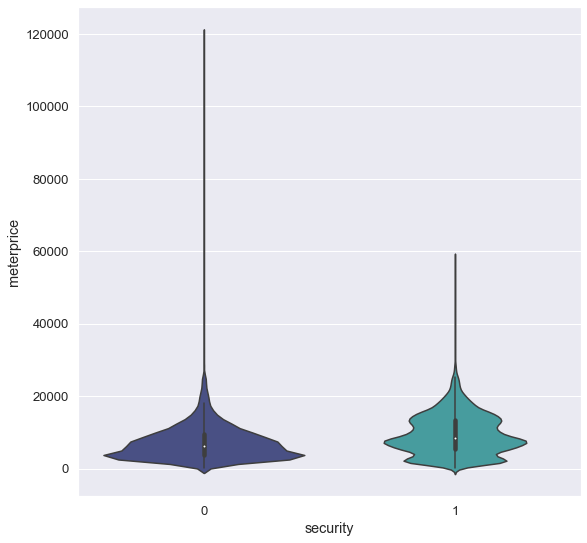

In [154]:
print(df.groupby('security').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='security' ,data=df,estimator=np.sum, color="#474646",palette='mako')



natural_gas
1    163739582
0    149958826
Name: meterprice, dtype: int64


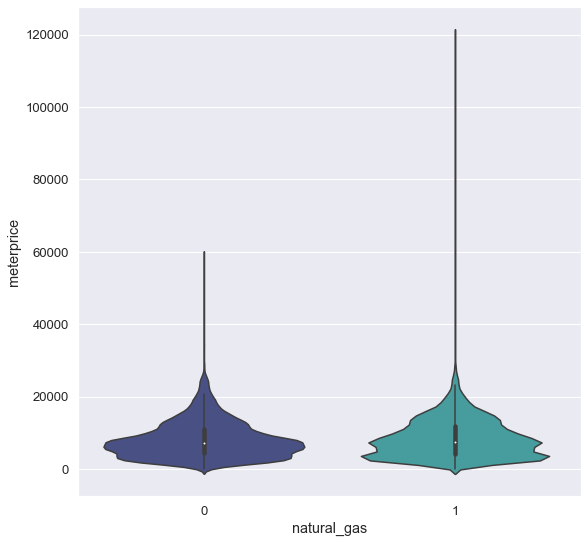

In [155]:
print(df.groupby('natural_gas').sum()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='natural_gas' ,data=df,estimator=np.sum, color="#474646",palette='mako')


landline
1    9031.716284
0    7900.891203
Name: meterprice, dtype: float64


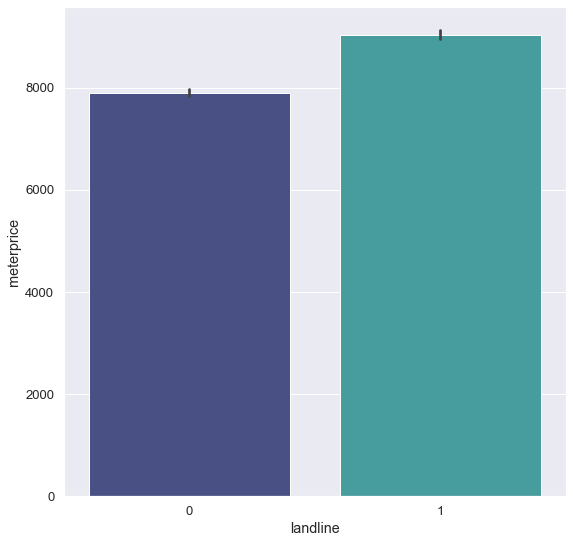

In [156]:

print(df.groupby('landline').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='landline' ,data=df,estimator=np.mean, color="#474646",palette='mako')



pets_allowed
1    9649.125173
0    7620.555061
Name: meterprice, dtype: float64


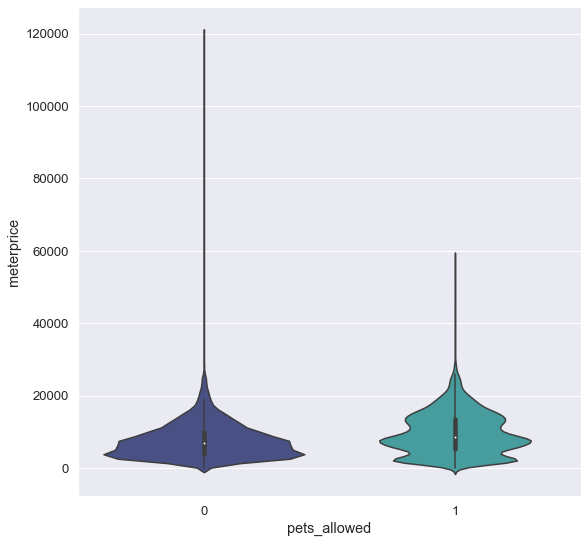

In [157]:
print(df.groupby('pets_allowed').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='pets_allowed' ,data=df,estimator=np.mean, color="#474646",palette='mako')



covered_parking
1    9498.535531
0    7710.319719
Name: meterprice, dtype: float64


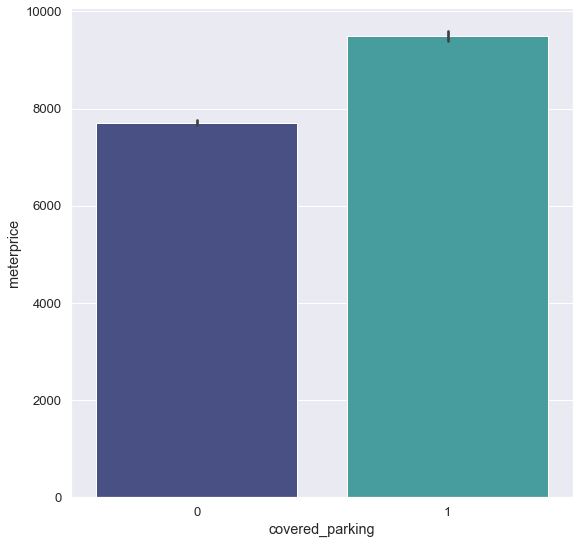

In [158]:
print(df.groupby('covered_parking').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='covered_parking' ,data=df,color="#474646",palette='mako')



private_garden
1    10346.657465
0     7750.267029
Name: meterprice, dtype: float64


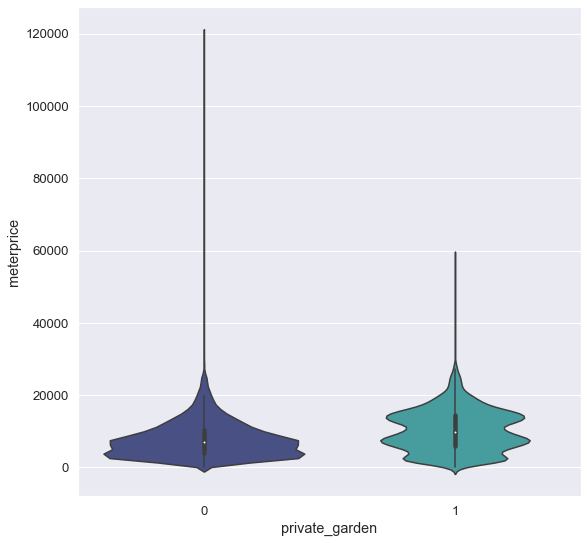

In [159]:
print(df.groupby('private_garden').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='private_garden' ,data=df,estimator=np.mean, color="#474646",palette='mako')



pool
1    10861.769059
0     7936.301766
Name: meterprice, dtype: float64


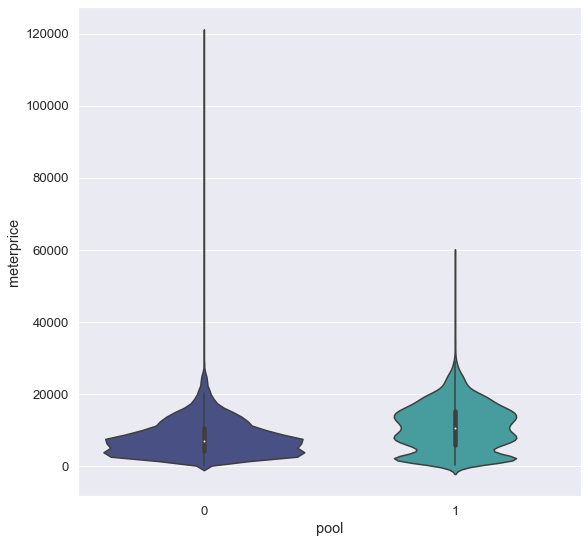

In [160]:
print(df.groupby('pool').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='pool' ,data=df,estimator=np.mean, color="#474646",palette='mako')


maids_room
1    10476.112895
0     8059.508125
Name: meterprice, dtype: float64


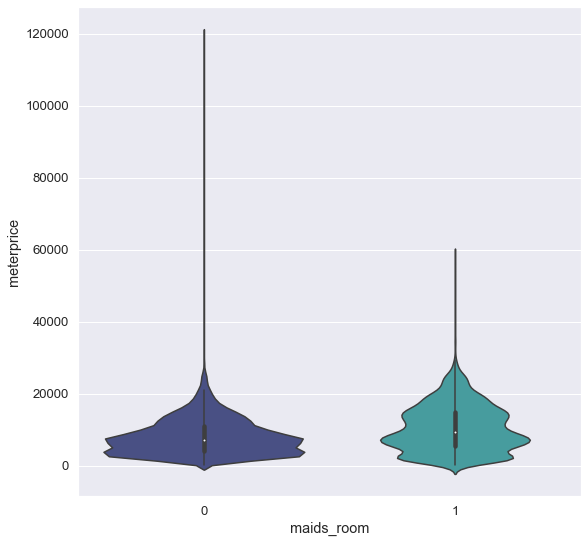

In [161]:

print(df.groupby('maids_room').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='maids_room' ,data=df,estimator=np.mean, color="#474646",palette='mako')



central_ac_heating
1    10572.188074
0     8033.246101
Name: meterprice, dtype: float64


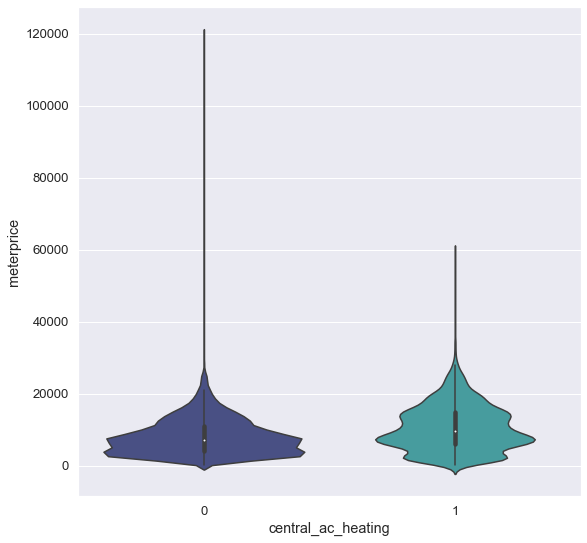

In [162]:
print(df.groupby('central_ac_heating').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='central_ac_heating' ,data=df,estimator=np.mean, color="#474646",palette='mako')



built_in_kitchen_appliances
1    10187.785321
0     8097.659015
Name: meterprice, dtype: float64


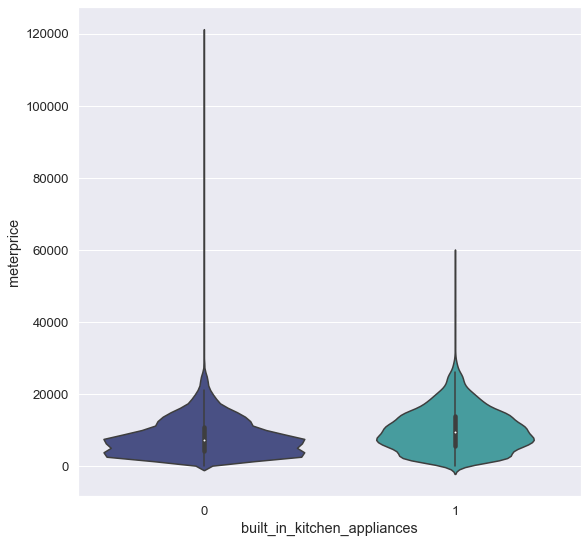

In [163]:
print(df.groupby('built_in_kitchen_appliances').mean()['meterprice'].nlargest(20))
sns.violinplot(y='meterprice',x='built_in_kitchen_appliances' ,data=df,estimator=np.mean, color="#474646",palette='mako')



month
6     11212.000000
4      8470.866686
5      8438.639838
3      8172.888142
2      8162.133072
9      7131.250000
8      6500.000000
1      5772.421053
10     5525.666667
12     5207.666667
11     4842.250000
7       750.000000
Name: meterprice, dtype: float64


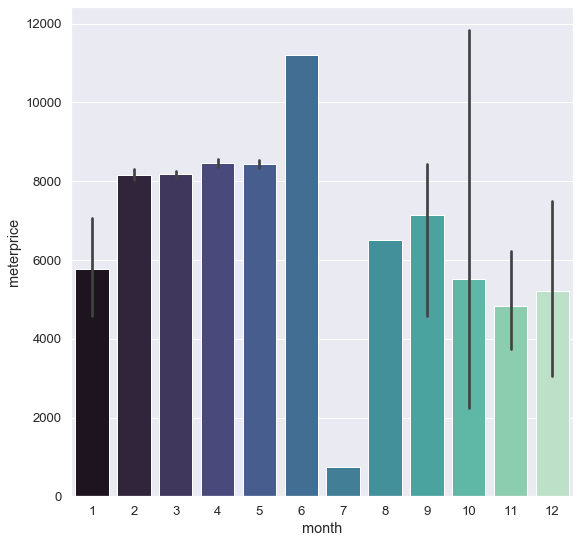

In [164]:
print(df.groupby('month').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='month' ,data=df,estimator=np.mean, color="#474646",palette='mako')


furnished
1    8840.203378
0    8297.631925
Name: meterprice, dtype: float64


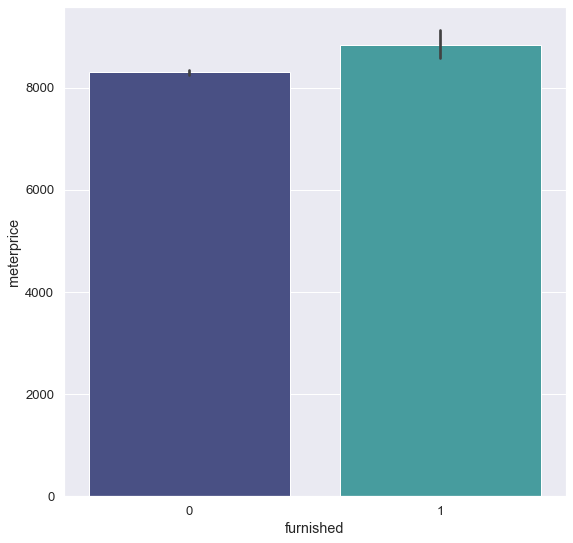

In [165]:
print(df.groupby('furnished').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='furnished' ,data=df,estimator=np.mean, color="#474646",palette='mako')


In [166]:
df['level'].value_counts()

2         7957
3         6477
1         5957
Ground    4952
4         3691
5         2886
6         1410
10+       1234
7          859
8          800
9          770
10         716
Name: level, dtype: int64

level
Ground    9521.699919
2         8956.283524
1         8765.429914
3         8657.063918
4         7835.208345
5         7478.576230
6         7106.339716
7         6452.044237
8         6373.707500
9         6108.079221
10        5817.643855
10+       5641.444895
Name: meterprice, dtype: float64


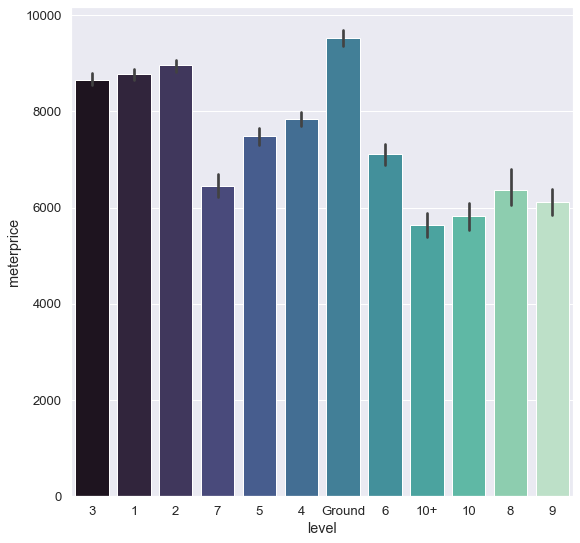

In [167]:
print(df.groupby('level').mean()['meterprice'].nlargest(20))
sns.barplot(y='meterprice',x='level' ,data=df,estimator=np.mean, color="#474646",palette='mako')


# MultiVariate Analysis

In [168]:
x=pd.pivot_table(index='location',values='meterprice',columns='compound',data=df,aggfunc=np.mean)
x

compound                2020 Compound  90 Avenue    ABHA    ALBA  \
location                                                           
15 May City                       NaN        NaN     NaN     NaN   
Abasiya                           NaN        NaN     NaN     NaN   
Ain Shams                 3703.000000    3555.00  3917.0  5937.0   
Al Amiriyyah                      NaN        NaN     NaN     NaN   
Al Manial                         NaN   12857.00     NaN     NaN   
Almazah                   2235.000000        NaN     NaN     NaN   
Badr City                 9917.000000        NaN  2878.0  2777.0   
Basateen                          NaN        NaN     NaN     NaN   
Dar al-Salaam                     NaN        NaN     NaN  2857.0   
Downtown Cairo            8617.333333        NaN  3000.0     NaN   
Ezbet El Nakhl                    NaN        NaN     NaN     NaN   
Gesr Al Suez              4362.200000    7200.00  2451.5     NaN   
Hadayek Helwan            5576.500000        NaN     NaN     NaN   
Hadayek al-Kobba          6666.000000        NaN  4166.0     NaN   
Heliopolis                        NaN        NaN     NaN  8500.0   
Helmeyat El Zaytoun       3451.333333    6284.00     NaN     NaN   
Helwan                    2867.000000        NaN  4013.0     NaN   
Katameya                          NaN        NaN  8006.5     NaN   
Maadi                     7735.000000        NaN     NaN     NaN   
Madinaty                          NaN        NaN     NaN     NaN   
Marg                              NaN        NaN     NaN     NaN   
Matareya                  3764.500000        NaN  3800.0     NaN   
Mokattam                  8092.666667        NaN     NaN     NaN   
Mostakbal City                    NaN        NaN     NaN     NaN   
Nasr City                 8345.666667        NaN     NaN     NaN   
New Cairo - El Tagamoa    7939.454545   10832.75  3634.5  2281.0   
New Capital City                  NaN        NaN     NaN     NaN   
New Nozha                 4545.500000        NaN     NaN     NaN   
Obour City                4061.500000        NaN     NaN     NaN   
Rehab City                        NaN        NaN     NaN     NaN   
Salam City                2187.000000    3250.00  2916.0     NaN   
Sayeda Zeinab                     NaN        NaN     NaN  5000.0   
Sheraton                  8250.200000        NaN     NaN     NaN   
Shorouk City                      NaN        NaN     NaN     NaN   
Shubra                            NaN        NaN     NaN  4666.0   
Waili                             NaN        NaN  6521.0     NaN   
Zahraa Al Maadi                   NaN        NaN     NaN     NaN   
Zamalek                           NaN        NaN     NaN     NaN   
Zawya al-Hamra                    NaN        NaN  3166.0     NaN   

compound                        AZAD  Abu Al-Hool       Aeon         Agora  \
location                                                                     
15 May City                      NaN          NaN        NaN           NaN   
Abasiya                          NaN          NaN        NaN   5000.000000   
Ain Shams                        NaN          NaN        NaN           NaN   
Al Amiriyyah                     NaN          NaN        NaN           NaN   
Al Manial                        NaN          NaN        NaN           NaN   
Almazah                          NaN          NaN        NaN           NaN   
Badr City                        NaN          NaN  23856.000   3591.428571   
Basateen                         NaN          NaN        NaN           NaN   
Dar al-Salaam                    NaN          NaN        NaN           NaN   
Downtown Cairo                   NaN     3942.000   3653.000           NaN   
Ezbet El Nakhl                   NaN          NaN        NaN           NaN   
Gesr Al Suez                     NaN     7083.000   2592.000   3387.750000   
Hadayek Helwan                   NaN          NaN        NaN           NaN   
Hadayek al-Kobba                 NaN     

In [169]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

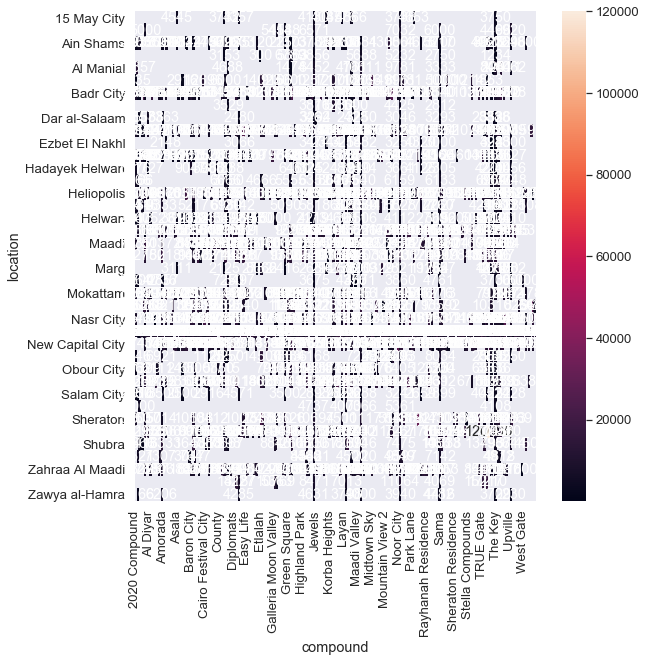

In [170]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [171]:
x=pd.pivot_table(index='location',values='meterprice',columns='bedrooms',sort=True,data=df,aggfunc=np.mean)
x

bedrooms                           1      10     10+             2  \
location                                                             
15 May City              3288.500000     NaN     NaN   3769.901786   
Abasiya                          NaN     NaN     NaN   6963.500000   
Ain Shams                2691.185185     NaN  3555.0   3724.266667   
Al Amiriyyah             3000.000000     NaN  5625.0   5566.720000   
Al Manial                        NaN     NaN     NaN   9053.258065   
Almazah                 16088.333333     NaN  8013.0   9855.047619   
Badr City                4458.444444     NaN     NaN   4535.219577   
Basateen                 3319.000000     NaN     NaN   4304.277778   
Dar al-Salaam            2503.333333  2909.0  2800.0   3284.136986   
Downtown Cairo           7506.809524     NaN     NaN   6622.191304   
Ezbet El Nakhl           3780.200000     NaN  2814.0   3366.545455   
Gesr Al Suez             3806.625000  3076.0     NaN   4109.881526   
Hadayek Helwan           2559.000000     NaN     NaN   3825.504274   
Hadayek al-Kobba         5542.714286     NaN     NaN   5795.578947   
Heliopolis              15913.333333  1200.0     NaN   9333.505198   
Helmeyat El Zaytoun      5982.187500     NaN     NaN   5483.041237   
Helwan                   3868.217391     NaN     NaN   3886.649518   
Katameya                13673.100000     NaN     NaN  10890.112903   
Maadi                    9337.000000     NaN     NaN   9372.743842   
Madinaty                17469.000000     NaN     NaN  12102.508825   
Marg                     2066.923077     NaN     NaN   2956.849057   
Matareya                 2901.500000  2250.0     NaN   4092.775862   
Mokattam                16521.708333     NaN     NaN   6751.798365   
Mostakbal City          12354.307692     NaN     NaN  10484.500000   
Nasr City               11419.750000  3677.0     NaN   9323.327189   
New Cairo - El Tagamoa   9151.800000     NaN     NaN  13350.409985   
New Capital City        13642.000000     NaN     NaN  10965.475000   
New Nozha               14500.000000     NaN     NaN   6093.195122   
Obour City               6476.250000     NaN     NaN   6804.140187   
Rehab City              13709.000000     NaN     NaN  13817.379182   
Salam City               2620.653846     NaN     NaN   3230.715481   
Sayeda Zeinab            4750.000000     NaN     NaN   5051.255319   
Sheraton                11045.000000     NaN     NaN   9521.158192   
Shorouk City             8815.500000     NaN     NaN   8237.669355   
Shubra                   4690.352941     NaN     NaN   7089.649215   
Waili                    4750.750000     NaN     NaN   5033.723404   
Zahraa Al Maadi          9766.555556     NaN     NaN   8523.030201   
Zamalek                 19596.000000     NaN     NaN  11667.472222   
Zawya al-Hamra           3969.000000     NaN     NaN   3747.901639   

bedrooms                           3             4             5        6  \
location                                                                    
15 May City              3943.168831           NaN           NaN      NaN   
Abasiya                  6864.183673   5692.666667   6666.000000      NaN   
Ain Shams                4038.534375   3752.885714   5061.857143   3318.5   
Al Amiriyyah             4832.897436   4585.800000   2666.000000      NaN   
Al Manial                9491.647059   5885.333333           NaN      NaN   
Almazah                  9563.296296           NaN           NaN      NaN   
Badr City                5259.220126   6324.142857   4366.666667   3318.0   
Basateen                 4552.000000   2209.666667  13636.000000      NaN   
Dar al-Salaam            3073.054545   2803.571429   3478.000000      NaN   
Downtown Cairo           7518.405172   8633.750000   6637.800000   9545.0   
Ezbet El Nakhl           3230.811321   2593.000000   3103.000000      NaN   
Gesr Al Suez             4034.527694   4300.288889   4372.500000      NaN   
Hadayek Helwan           3444.827751   3728.866667 

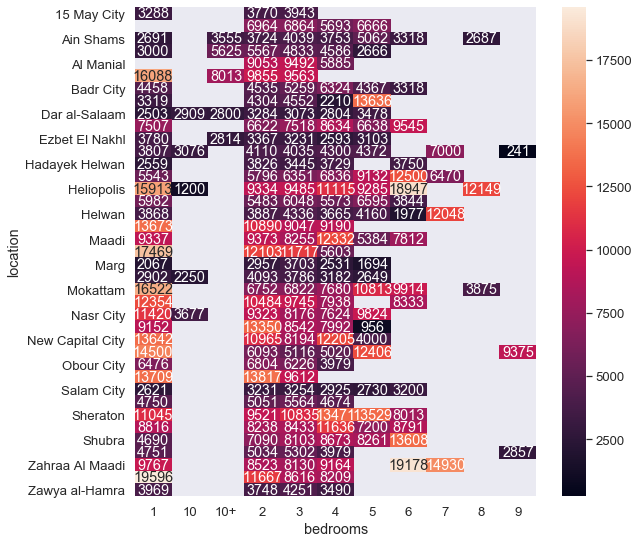

In [172]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [173]:
x=pd.pivot_table(index='location',values='meterprice',columns='level',data=df,aggfunc=np.mean)
x

level                              1            10           10+  \
location                                                           
15 May City              3990.764706           NaN   3809.000000   
Abasiya                  7718.833333   7839.000000   7947.800000   
Ain Shams                4322.730337   3593.957447   3530.203390   
Al Amiriyyah             5405.444444           NaN   6140.200000   
Al Manial                6476.181818  13356.333333   9123.000000   
Almazah                  9399.700000   5792.000000   8861.750000   
Badr City                5508.468391   6404.647059   3734.551724   
Basateen                 4650.200000   3454.000000   3152.600000   
Dar al-Salaam            4013.500000   3771.363636   2813.476190   
Downtown Cairo           8281.390476   7030.833333   6084.916667   
Ezbet El Nakhl           3163.777778   2992.090909   2813.933333   
Gesr Al Suez             4681.148438   3649.991597   3053.954751   
Hadayek Helwan           4039.321429   3035.387097   3211.388889   
Hadayek al-Kobba         5649.102564   5891.000000   6053.500000   
Heliopolis               9071.896552  10714.250000  10451.921875   
Helmeyat El Zaytoun      5851.463415   5778.040816   5554.796296   
Helwan                   4712.263889   4679.034483   3662.593750   
Katameya                10210.059701  10033.333333   9260.666667   
Maadi                    9623.348485   7908.966667   8221.571429   
Madinaty                11488.484346           NaN  10463.500000   
Marg                     3397.558824   2715.166667   2621.769231   
Matareya                 3926.500000   4138.409091   3493.133333   
Mokattam                 7971.958904   6325.142857   4894.200000   
Mostakbal City           9437.117188           NaN   7222.000000   
Nasr City                7539.578947   7217.137255   7364.639344   
New Cairo - El Tagamoa   9656.912719   5893.695652   6911.430657   
New Capital City         8013.474138   5333.000000  23632.142857   
New Nozha                6487.966667   3305.625000   3126.185185   
Obour City               6819.473684   7532.444444   7751.000000   
Rehab City              10088.416309           NaN   6685.888889   
Salam City               3517.178571   2864.777778   2922.142857   
Sayeda Zeinab            3652.400000   6749.600000   3495.666667   
Sheraton                10571.453125  10165.454545   7880.000000   
Shorouk City             7941.197183           NaN   7634.000000   
Shubra                   6863.367347   9327.846154  10113.548387   
Waili                    4934.571429   7132.000000   4965.666667   
Zahraa Al Maadi          8547.099174   7479.137255   8099.092308   
Zamalek                  9851.545455   5200.000000  10198.750000   
Zawya al-Hamra           4563.714286   3724.000000   2849.200000   

level                              2             3             4  \
location                                                           
15 May City              4000.407407   4073.034483   4013.272727   
Abasiya                  7070.166667   5630.000000   6645.562500   
Ain Shams                3941.861111   4279.514286   3974.857143   
Al Amiriyyah             4207.153846   3861.538462   7187.769231   
Al Manial                9296.800000   9316.545455  10436.166667   
Almazah                 12795.153846   9000.444444   9902.461538   
Badr City                4987.327225   4920.565916   5320.886364   
Basateen                 4327.416667   5557.400000   4612.000000   
Dar al-Salaam            3052.789474   2930.736842   3208.965517   
Downtown Cairo           7730.290698   6977.766667   6385.154762   
Ezbet El Nakhl           3816.400000   3380.960000   3209.466667   
Gesr Al Suez             4378.933333   4843.519084   4352.553191   
Hadayek Helwan           4143.107143   3754.533333   4021.394737   
Hadayek al-Kobba         6232.327273   6135.777778   6397.391304   
Heliopolis               9241.843866   9258.588462   8539.523560   
Helmeyat El Zaytoun      6143.716418   5970.273973   56

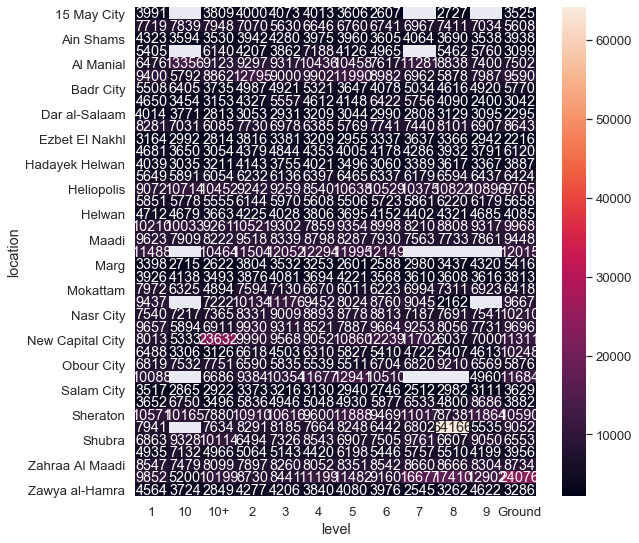

In [174]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [175]:
x=pd.pivot_table(index='location',values='meterprice',columns='furnished',data=df,aggfunc=np.mean)
x

furnished                          0             1
location                                          
15 May City              3821.809524   4171.250000
Abasiya                  6825.024390   7303.285714
Ain Shams                3849.556604   4565.258621
Al Amiriyyah             5052.366197   3153.000000
Al Manial                9240.542857   9036.200000
Almazah                  9471.630769  11714.000000
Badr City                5090.103061   5351.048193
Basateen                 4333.090909   6934.000000
Dar al-Salaam            3102.091837   4533.333333
Downtown Cairo           7198.569966   7860.709091
Ezbet El Nakhl           3281.089005   3075.600000
Gesr Al Suez             3977.900883   5506.022727
Hadayek Helwan           3555.786350   4352.444444
Hadayek al-Kobba         6164.013966   6715.083333
Heliopolis               9482.631544  11577.699248
Helmeyat El Zaytoun      5814.151203   6506.482759
Helwan                   4078.395859   5491.074074
Katameya                 9695.434238   7075.294118
Maadi                    8618.504587   9609.260870
Madinaty                11893.119873  14238.948718
Marg                     3288.958678   3172.400000
Matareya                 3815.881188   4192.571429
Mokattam                 7050.735965   7319.964286
Mostakbal City          10019.915989   8823.083333
Nasr City                8348.457169   9177.461538
New Cairo - El Tagamoa   9480.087029  11034.827988
New Capital City         9865.953285  12163.650000
New Nozha                5483.542169   5848.480000
Obour City               6377.569014   6725.888889
Rehab City              10513.710373  10871.644444
Salam City               3178.047847   3641.636364
Sayeda Zeinab            5256.211111   5308.333333
Sheraton                10460.668258  10478.395833
Shorouk City             8395.232804   9695.272727
Shubra                   7489.194774   8976.604651
Waili                    5047.690722   6253.600000
Zahraa Al Maadi          8271.592271   8955.755102
Zamalek                  9530.960526  13032.952381
Zawya al-Hamra           3956.244755   4775.857143

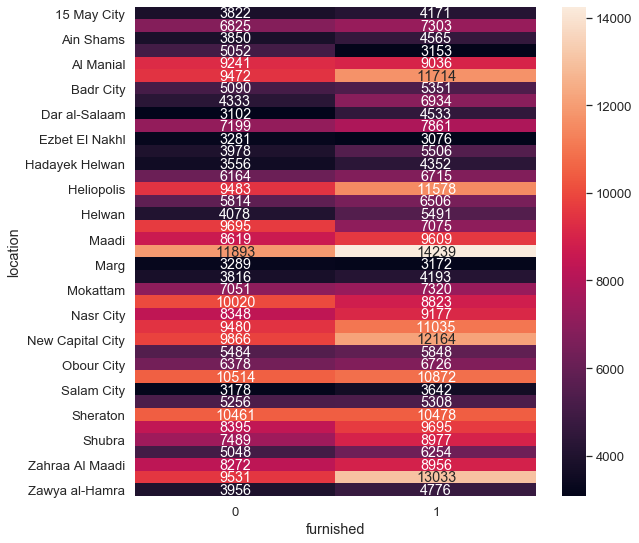

In [176]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [177]:
x=pd.pivot_table(index='location',values='meterprice',columns='bathrooms',data=df,aggfunc=np.mean)
x

bathrooms                          1      10      10+             2  \
location                                                              
15 May City              3731.940120     NaN      NaN   4652.200000   
Abasiya                  6822.736842     NaN      NaN   6958.903226   
Ain Shams                3723.527873  2160.0   3555.0   4423.837838   
Al Amiriyyah             4866.719298     NaN      NaN   5604.857143   
Al Manial                8774.844444     NaN      NaN   9327.545455   
Almazah                  8571.258065     NaN      NaN  10112.833333   
Badr City                3700.970194  1423.0      NaN   5150.040706   
Basateen                 3598.645161     NaN      NaN   5893.384615   
Dar al-Salaam            3152.206061     NaN      NaN   2990.787879   
Downtown Cairo           6137.503185  3400.0      NaN   8253.196429   
Ezbet El Nakhl           3298.904494     NaN      NaN   3047.833333   
Gesr Al Suez             4016.814894     NaN      NaN   4014.188034   
Hadayek Helwan           3644.390135     NaN      NaN   3478.324561   
Hadayek al-Kobba         5875.027237     NaN      NaN   6854.165414   
Heliopolis               8649.834395  1200.0      NaN   9706.905455   
Helmeyat El Zaytoun      5672.053118     NaN      NaN   6295.184524   
Helwan                   3812.873288  3684.0      NaN   4790.222689   
Katameya                 8378.026087     NaN      NaN  10446.039801   
Maadi                    7036.308333     NaN      NaN   9248.969789   
Madinaty                11461.596540     NaN      NaN  12316.052484   
Marg                     2677.472843     NaN      NaN   6308.826923   
Matareya                 3843.706320     NaN      NaN   3867.283019   
Mokattam                 6662.906863     NaN      NaN   7193.504488   
Mostakbal City           6751.269767     NaN      NaN  11754.790625   
Nasr City                6708.007042     NaN      NaN   8390.129235   
New Cairo - El Tagamoa   7136.733158     NaN      NaN  10189.282833   
New Capital City         7592.819672     NaN      NaN  10565.052336   
New Nozha                5684.502703     NaN      NaN   5256.802469   
Obour City               6111.188679     NaN  10312.0   6544.671111   
Rehab City              11727.814159     NaN      NaN  11204.357025   
Salam City               3190.318296     NaN      NaN   3061.222222   
Sayeda Zeinab            5097.231707     NaN      NaN   6888.600000   
Sheraton                 9168.138158     NaN      NaN  10845.606299   
Shorouk City             6428.597222     NaN      NaN   8609.435065   
Shubra                   6794.513595     NaN      NaN   9194.774775   
Waili                    4775.607595     NaN      NaN   6482.111111   
Zahraa Al Maadi          7649.908730     NaN      NaN   8247.655417   
Zamalek                 10572.000000     NaN      NaN  10496.562500   
Zawya al-Hamra           3934.916667     NaN      NaN   4431.388889   

bathrooms                          3             4            5       6  \
location                                                                  
15 May City              3731.750000   4069.000000          NaN     NaN   
Abasiya                  6153.000000           NaN          NaN     NaN   
Ain Shams                5790.928571           NaN  3454.000000     NaN   
Al Amiriyyah             6000.000000           NaN          NaN     NaN   
Al Manial               11386.285714           NaN          NaN     NaN   
Almazah                 11914.411765           NaN  8013.000000     NaN   
Badr City                8495.670370   8658.000000  2117.000000     NaN   
Basateen                 8176.000000           NaN          NaN     NaN   
Dar al-Salaam            2800.000000           NaN          NaN     NaN   
Downtown Cairo           8686.680412  10625.000000          NaN     NaN   
Ezbet El Nakhl                   NaN           NaN          NaN     NaN   
Gesr Al Suez             6415.090909           NaN          NaN     NaN   
Hadayek Helwan           3206.500000  

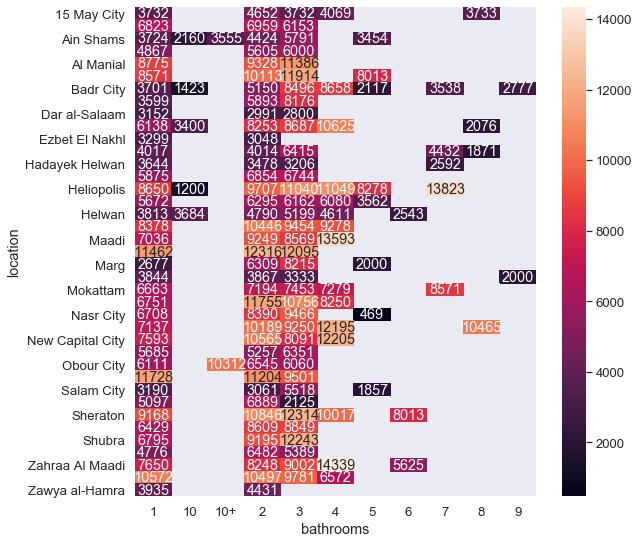

In [178]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [179]:
x=pd.pivot_table(index='location',values='meterprice',columns='payment_option',data=df,aggfunc=np.mean)
x

payment_option                  Cash  Cash or Installment   Installment
location                                                               
15 May City              3795.615385          4320.777778   4659.000000
Abasiya                  6866.207317          6820.857143           NaN
Ain Shams                3929.662014          3490.577982   3898.500000
Al Amiriyyah             5017.279412          6798.666667    300.000000
Al Manial                9090.650602         13928.500000           NaN
Almazah                  9059.290323         12695.000000  13415.333333
Badr City                5006.572333          5007.560268   6251.815385
Basateen                 4400.238095          4928.500000           NaN
Dar al-Salaam            3128.573770          3129.866667   2133.000000
Downtown Cairo           6647.620763          8117.664062  11560.073171
Ezbet El Nakhl           3242.070652          3793.750000           NaN
Gesr Al Suez             4093.597242          3648.804878   5505.105263
Hadayek Helwan           3666.580071          3206.920635   2563.500000
Hadayek al-Kobba         6235.049315          5943.464286   6250.000000
Heliopolis              10093.610243          9036.373377   7717.257669
Helmeyat El Zaytoun      5905.335664          4989.057143   5013.750000
Helwan                   4103.551100          4321.492537   4379.625000
Katameya                 9065.496552         10346.056738  10409.307692
Maadi                    7880.047382          9276.600000  11356.515152
Madinaty                13354.667264          9016.061972   7470.172876
Marg                     3194.687500          3445.176471  10629.500000
Matareya                 3855.264901          3634.818182           NaN
Mokattam                 6887.300821          7412.390863   9136.679245
Mostakbal City           8045.860841         11428.244681  11268.169811
Nasr City                8237.343381          8230.300000  10867.309859
New Cairo - El Tagamoa  10292.060942          8515.857579   9598.729819
New Capital City         8298.608696         10396.510441   9850.408805
New Nozha                5688.993506          4339.333333   6250.000000
Obour City               6392.354244          6183.785714   8089.333333
Rehab City              12393.047882          8552.306087  11448.818182
Salam City               3214.498753          2833.000000   2881.000000
Sayeda Zeinab            5269.613636          6141.666667   3416.500000
Sheraton                10616.355140          9805.259259   6453.416667
Shorouk City             7835.558052          8467.456853   9706.684211
Shubra                   7528.539379          8592.973684   8279.142857
Waili                    5062.311828          5566.555556           NaN
Zahraa Al Maadi          8100.642012          8416.177570   9451.758621
Zamalek                 10683.712500          7608.777778   9358.625000
Zawya al-Hamra           3993.172414          4032.800000           NaN

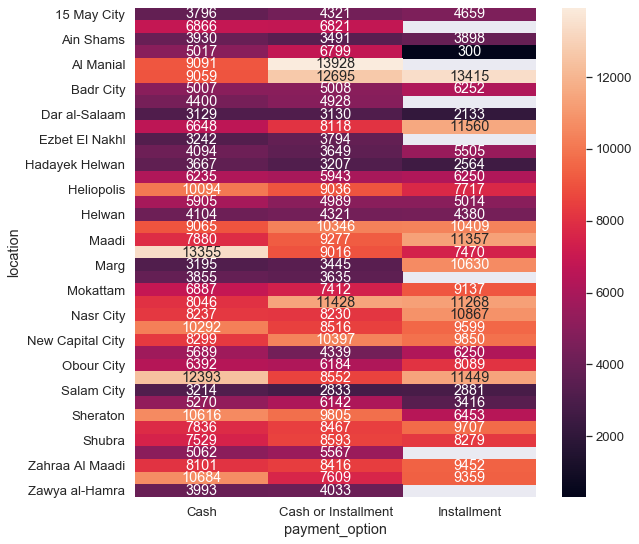

In [180]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [181]:
x=pd.pivot_table(index='location',values='meterprice',columns='delivery_term',data=df,aggfunc=np.mean)
x

delivery_term           Core & Shell      Finished  Not Finished  \
location                                                           
15 May City              3760.676471   3913.378049   3106.500000   
Abasiya                  6759.829787   7310.882353   5245.000000   
Ain Shams                3910.209677   4083.837472   2962.371795   
Al Amiriyyah             5445.891892   4453.187500   5957.000000   
Al Manial                9487.023256   9372.378378   3333.000000   
Almazah                 10231.545455   9433.210526  12500.000000   
Badr City                4351.139130   5962.966337   3746.423387   
Basateen                 4365.518519   4681.266667   4302.333333   
Dar al-Salaam            3081.450000   3349.042254   2764.666667   
Downtown Cairo           6735.856230   8344.105727   5016.130435   
Ezbet El Nakhl           3263.290323   3468.024390   2595.111111   
Gesr Al Suez             4151.558018   4555.884906   2246.734694   
Hadayek Helwan           3800.534247   3889.008065   2482.085106   
Hadayek al-Kobba         6244.436275   6356.075472   4972.055556   
Heliopolis               9524.627249  10934.282732   9295.464286   
Helmeyat El Zaytoun      5749.453453   6098.105691   4834.157895   
Helwan                   4138.259953   4310.429907   3145.610169   
Katameya                 9886.624242   8975.423729  10711.285714   
Maadi                    8127.182482   8455.796791   9714.375000   
Madinaty                11402.674569  12002.427474  10665.357143   
Marg                     2623.538462   3820.022727   2064.300000   
Matareya                 3867.180851   3966.101852   3303.214286   
Mokattam                 6900.109501   7609.308559   6616.400000   
Mostakbal City           9810.757669   9063.021622  11688.241379   
Nasr City                6710.396040   9025.575714   9394.756757   
New Cairo - El Tagamoa   7446.032791  10385.156063   9109.044280   
New Capital City         6561.526316  11968.375839   4839.636364   
New Nozha                5636.173184   6662.222222   2246.309524   
Obour City               6602.000000   6535.410256   3909.428571   
Rehab City               7838.310078  12658.322148  11232.909091   
Salam City               3128.642241   3501.594595   2234.448276   
Sayeda Zeinab            5267.108108   5395.653061   4393.500000   
Sheraton                10424.855140  10641.616438   7900.928571   
Shorouk City             8294.913669   8871.624031   3602.600000   
Shubra                   7406.893443   7918.964286   6343.500000   
Waili                    5216.051724   5130.516129   4451.750000   
Zahraa Al Maadi          7924.053333   8696.772881   6668.809524   
Zamalek                  9838.490566  10944.944444           NaN   
Zawya al-Hamra           3700.350000   4600.490566   3151.333333   

delivery_term           Semi Finished  
location                               
15 May City               4044.000000  
Abasiya                   5751.600000  
Ain Shams                 3159.307692  
Al Amiriyyah                      NaN  
Al Manial                 6082.000000  
Almazah                  10149.857143  
Badr City                 6042.348315  
Basateen                  3529.000000  
Dar al-Salaam             2591.900000  
Downtown Cairo            6831.987179  
Ezbet El Nakhl            2496.666667  
Gesr Al Suez              4481.676471  
Hadayek Helwan            2886.172414  
Hadayek al-Kobba          5729.384615  
Heliopolis                7710.879310  
Helmeyat El Zaytoun       5074.846154  
Helwan                    3910.878049  
Katameya                  9668.552764  
Maadi                     9470.015000  
Madinaty                 11861.791667  
Marg                      4892.095238  
Matareya                  3045.857143  
Mokattam                  6194.973154  
Mostakbal City           10888.809524  
Nasr City                 8628.470149  
New Cairo - El Tagamoa   10348.287049  
New Capital City         10092.404444  
New Nozha                 4423.578947  
Obour City 

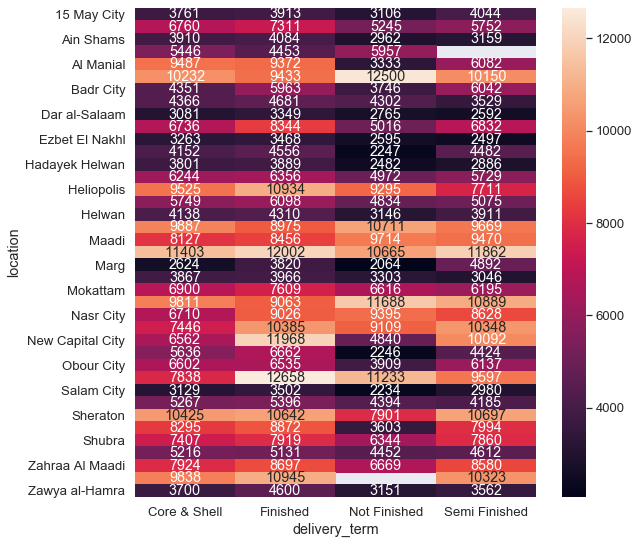

In [182]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [183]:
x=pd.pivot_table(index='location',values='meterprice',columns='delivery_date',data=df,aggfunc=np.mean)
x

delivery_date                   2022          2023          2024  \
location                                                           
15 May City                      NaN           NaN   4214.000000   
Abasiya                          NaN           NaN           NaN   
Ain Shams                3798.444444           NaN           NaN   
Al Amiriyyah                     NaN           NaN           NaN   
Al Manial               15789.000000           NaN           NaN   
Almazah                 11960.500000  11781.000000   5724.500000   
Badr City                4828.633333   4746.571429   6798.949153   
Basateen                         NaN           NaN           NaN   
Dar al-Salaam            3500.000000           NaN           NaN   
Downtown Cairo           7200.111111  12658.666667  14570.166667   
Ezbet El Nakhl           2564.000000           NaN           NaN   
Gesr Al Suez             3609.947368   6966.000000   6520.000000   
Hadayek Helwan           2784.666667           NaN           NaN   
Hadayek al-Kobba         5543.000000           NaN   6390.000000   
Heliopolis               8942.928571   7519.448276  10231.437500   
Helmeyat El Zaytoun      4957.000000           NaN           NaN   
Helwan                   3905.818182   4435.333333   2692.000000   
Katameya                 7247.166667  11496.923077  11572.217391   
Maadi                    8063.714286   7285.916667  11179.809524   
Madinaty                13732.625000   8785.142857   8203.583333   
Marg                     5446.000000           NaN  13489.500000   
Matareya                 3567.600000   4411.000000           NaN   
Mokattam                 6972.818182  10286.000000  11666.000000   
Mostakbal City          10668.903226  10746.523810  13165.886792   
Nasr City               10543.538462  14955.727273  12510.777778   
New Cairo - El Tagamoa   8863.279661   7958.473881   9067.547649   
New Capital City        10671.466667  10280.466667  10357.496124   
New Nozha                9395.000000           NaN   7333.000000   
Obour City               6146.142857   7235.600000   6281.600000   
Rehab City               9976.966667   9558.185185   9470.938776   
Salam City               3274.666667           NaN           NaN   
Sayeda Zeinab            5000.000000           NaN           NaN   
Sheraton                10588.000000   4366.285714   1000.000000   
Shorouk City             7235.823529  15035.052632   8413.476190   
Shubra                   7000.000000  11695.000000           NaN   
Waili                    5000.000000           NaN   7647.000000   
Zahraa Al Maadi          6825.000000   9172.462500   8293.076190   
Zamalek                  6726.600000  12637.000000   7654.500000   
Zawya al-Hamra           3923.000000           NaN           NaN   

delivery_date                   2025          2026     2027    2028     2030  \
location                                                                       
15 May City                      NaN           NaN      NaN     NaN      NaN   
Abasiya                  6000.000000           NaN      NaN     NaN      NaN   
Ain Shams                4500.000000   3793.000000      NaN     NaN      NaN   
Al Amiriyyah                     NaN           NaN      NaN     NaN      NaN   
Al Manial                        NaN           NaN      NaN     NaN      NaN   
Almazah                          NaN           NaN      NaN     NaN      NaN   
Badr City                4627.571429   5750.000000      NaN     NaN      NaN   
Basateen                         NaN           NaN      NaN     NaN      NaN   
Dar al-Salaam                    NaN           NaN      NaN     NaN      NaN   
Downtown Cairo           7888.333333           NaN  19230.0     NaN      NaN   
Ezbet El Nakhl                   NaN           NaN      NaN     NaN      NaN   
Gesr Al Suez             4191.500000           NaN      NaN     NaN      NaN   
Hadayek Helwan                   NaN           NaN      NaN     NaN      NaN   
Hadayek al-

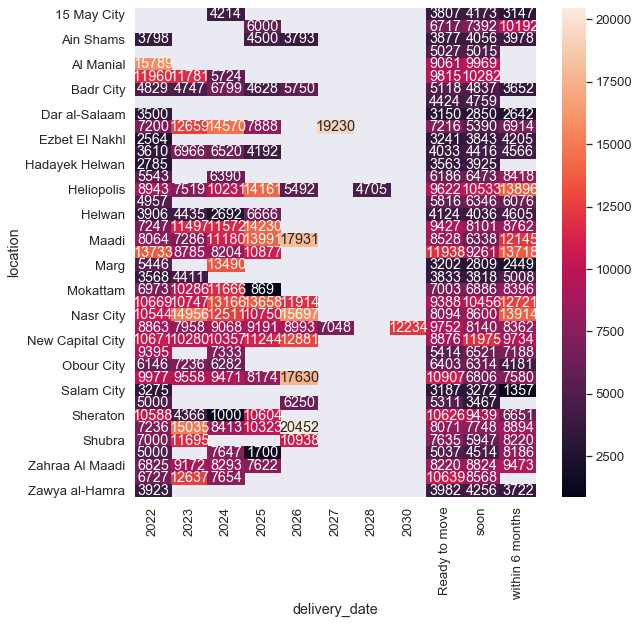

In [184]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [185]:
x=pd.pivot_table(index='location',values='meterprice',columns='electricity_meter',data=df,aggfunc=np.mean)
x

electricity_meter                  0             1
location                                          
15 May City              3852.010638   3807.252525
Abasiya                  6814.810811   6896.673077
Ain Shams                3776.549696   3973.561600
Al Amiriyyah             6076.814815   4395.488889
Al Manial                8434.523810   9956.534884
Almazah                  8813.833333  10752.418605
Badr City                4675.959889   5424.217482
Basateen                 4134.473684   4665.518519
Dar al-Salaam            3003.704545   3218.774775
Downtown Cairo           6858.184783   7555.731507
Ezbet El Nakhl           3229.600000   3298.793893
Gesr Al Suez             3890.751138   4190.657428
Hadayek Helwan           3279.510309   3955.572368
Hadayek al-Kobba         5979.176056   6346.892857
Heliopolis               9587.561815   9697.665650
Helmeyat El Zaytoun      5765.793249   5898.478610
Helwan                   3925.444444   4282.561702
Katameya                 9839.352490   9346.051064
Maadi                    7885.366102   9244.324607
Madinaty                10803.324713  12849.679500
Marg                     2898.275641   3564.447005
Matareya                 3823.215190   3856.554217
Mokattam                 6954.137993   7165.626126
Mostakbal City          10222.211618   9895.917485
Nasr City                7900.530864   8654.433030
New Cairo - El Tagamoa   9848.798486   9275.717432
New Capital City        10460.663793   9671.410148
New Nozha                5294.446154   5632.026432
Obour City               6147.350000   6535.450893
Rehab City               9661.654731  10920.300349
Salam City               3166.938272   3203.887640
Sayeda Zeinab            5093.129032   5340.274194
Sheraton                10342.557940  10581.910256
Shorouk City             8949.190184   8212.113253
Shubra                   7712.517949   7565.070632
Waili                    5839.142857   4724.238806
Zahraa Al Maadi          8188.407339   8417.899814
Zamalek                 10214.549020  10371.804348
Zawya al-Hamra           3895.611111   4050.114583

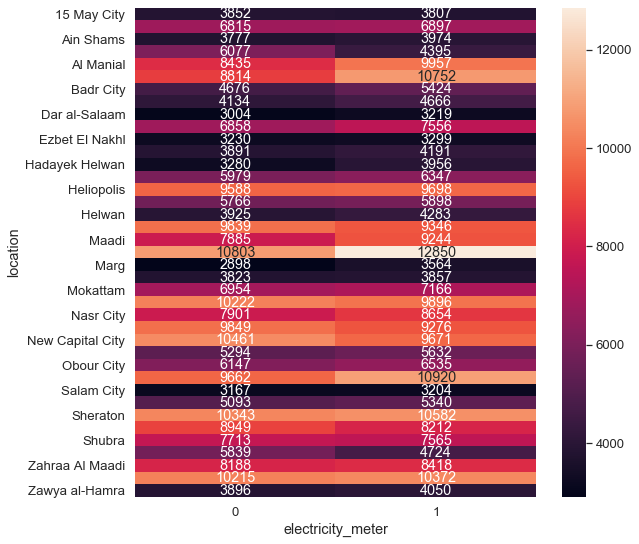

In [186]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [187]:
x=pd.pivot_table(index='location',values='meterprice',columns='balcony',data=df,aggfunc=np.mean)
x

balcony                            0             1
location                                          
15 May City              3667.229008   4170.967742
Abasiya                  7007.333333   6714.659091
Ain Shams                3774.287218   4051.686534
Al Amiriyyah             5131.260000   4786.727273
Al Manial                8898.608696   9565.256410
Almazah                  9152.114286  10439.272727
Badr City                4638.271226   5574.327751
Basateen                 4156.750000   4896.388889
Dar al-Salaam            3025.872483   3415.100000
Downtown Cairo           6304.220544   8270.980645
Ezbet El Nakhl           3317.084034   3212.116883
Gesr Al Suez             3848.254484   4351.771300
Hadayek Helwan           3343.948357   3948.954887
Hadayek al-Kobba         5848.771574   6579.959391
Heliopolis               9741.449695   9595.205791
Helmeyat El Zaytoun      5755.880682   5970.864865
Helwan                   3907.006085   4423.853521
Katameya                 9292.658120   9885.156489
Maadi                    7743.073643   9211.937947
Madinaty                12704.941128  11545.771098
Marg                     2725.842105   4166.372414
Matareya                 3802.649533   3913.536364
Mokattam                 6594.283505   7499.755452
Mostakbal City           7584.962025  11116.840156
Nasr City                8029.266304   8561.047146
New Cairo - El Tagamoa   9425.197897   9577.032467
New Capital City        10089.251366   9875.704981
New Nozha                5397.323077   5643.641975
Obour City               6259.285714   6472.142857
Rehab City               9957.417763  10709.503171
Salam City               3262.471223   3056.390728
Sayeda Zeinab            5457.684211   4941.555556
Sheraton                10154.965812  10771.334764
Shorouk City             7993.096774   8576.394799
Shubra                   7511.070866   7767.300000
Waili                    4857.464286   5410.347826
Zahraa Al Maadi          8032.432432   8585.879017
Zamalek                 10371.324324  10238.433333
Zawya al-Hamra           4058.510870   3892.948276

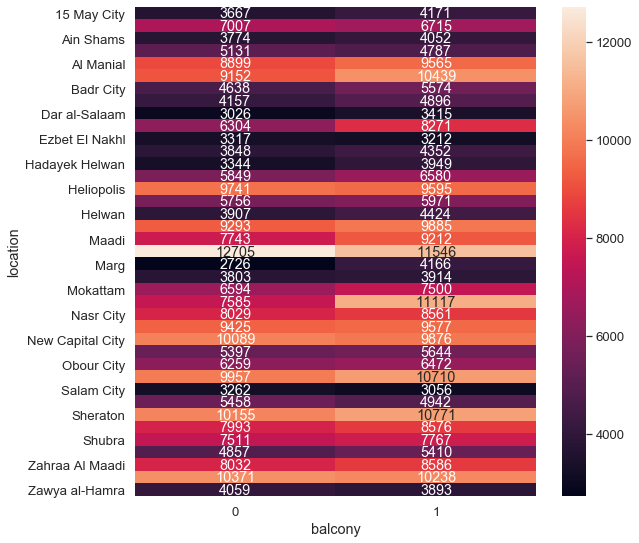

In [188]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [189]:
x=pd.pivot_table(index='location',values='meterprice',columns='water_meter',data=df,aggfunc=np.mean)
x

water_meter                        0             1
location                                          
15 May City              3779.752212   3898.687500
Abasiya                  6767.836735   6978.775000
Ain Shams                3822.687601   3966.651911
Al Amiriyyah             5560.923077   4393.787879
Al Manial                8742.750000   9932.060606
Almazah                  9860.071429   9879.162162
Badr City                4702.943128   5504.890476
Basateen                 4366.230769   4550.100000
Dar al-Salaam            2967.049020   3288.360825
Downtown Cairo           6943.012048   7591.006472
Ezbet El Nakhl           3254.608696   3294.634615
Gesr Al Suez             3928.867857   4221.538141
Hadayek Helwan           3305.289017   3847.728324
Hadayek al-Kobba         6011.108808   6409.532338
Heliopolis               9752.180263   9568.132097
Helmeyat El Zaytoun      5735.493333   5954.585209
Helwan                   4000.674897   4288.104972
Katameya                 9498.874126   9751.023810
Maadi                    7877.429448   9371.717949
Madinaty                10904.322093  12747.371306
Marg                     2863.161111   3680.036269
Matareya                 3785.363636   3915.277372
Mokattam                 6879.285100   7321.245247
Mostakbal City          10320.707627   9853.867704
Nasr City                8100.747899   8594.581662
New Cairo - El Tagamoa   9701.492337   9371.718485
New Capital City        10260.282700   9764.452991
New Nozha                5275.010811   5760.877907
Obour City               6096.353659   6623.840000
Rehab City               9841.026316  10871.028846
Salam City               3131.044843   3253.684466
Sayeda Zeinab            5228.136364   5284.612245
Sheraton                10423.550943  10513.574257
Shorouk City             8427.227723   8416.077128
Shubra                   7715.771784   7531.139013
Waili                    5439.460000   4786.942308
Zahraa Al Maadi          8132.449013   8519.750000
Zamalek                  9688.236364  11076.000000
Zawya al-Hamra           3906.126761   4073.911392

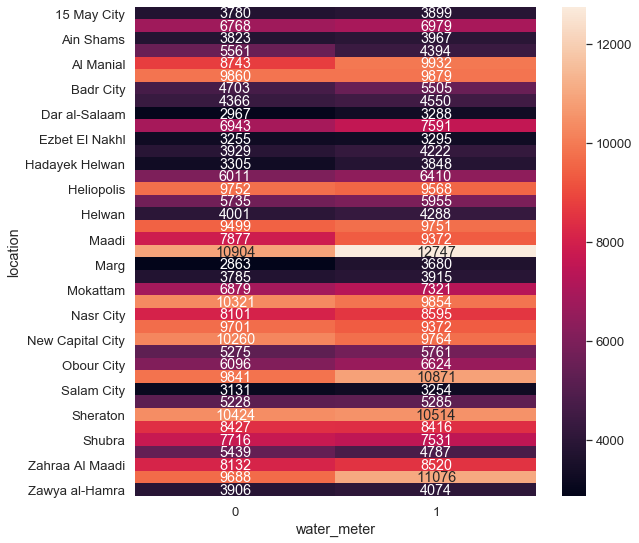

In [190]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [191]:
x=pd.pivot_table(index='location',values='meterprice',columns='elevator',data=df,aggfunc=np.mean)
x

elevator                           0             1
location                                          
15 May City              3754.467033   5063.090909
Abasiya                  6465.720000   7371.512821
Ain Shams                3642.438957   4344.413882
Al Amiriyyah             4849.701754   5695.866667
Al Manial                8101.701754  11449.428571
Almazah                  9448.184211  10259.048780
Badr City                4438.572363   6865.548807
Basateen                 3796.093750   5932.071429
Dar al-Salaam            3021.417910   3334.461538
Downtown Cairo           6354.481994   8416.903571
Ezbet El Nakhl           3143.760563   3623.185185
Gesr Al Suez             3868.336037   4306.022923
Hadayek Helwan           3627.849246   3507.006803
Hadayek al-Kobba         5765.462264   6737.263736
Heliopolis               9574.424200   9717.858407
Helmeyat El Zaytoun      5616.691643   6149.742424
Helwan                   3919.970827   4666.666667
Katameya                 9113.621622  10143.312236
Maadi                    7709.717857   9316.861461
Madinaty                11175.192331  12477.507126
Marg                     2731.827839   4798.270000
Matareya                 3737.658009   4095.236559
Mokattam                 6682.746143   7608.450098
Mostakbal City           9433.448133  10269.379175
Nasr City                8030.156812   8574.831847
New Cairo - El Tagamoa   9796.675194   9270.108830
New Capital City        10091.575342   9858.839506
New Nozha                5446.048913   5576.156069
Obour City               6062.963563   7068.529915
Rehab City              10648.817308  10465.631894
Salam City               3180.523929   3306.687500
Sayeda Zeinab            4741.846154   6455.857143
Sheraton                10239.893701  10727.934272
Shorouk City             8330.015936   8489.024465
Shubra                   7043.751656   8714.395062
Waili                    4776.413793   5542.318182
Zahraa Al Maadi          7995.986538   8585.136525
Zamalek                  9203.892857  11771.390244
Zawya al-Hamra           3851.825397   4743.500000

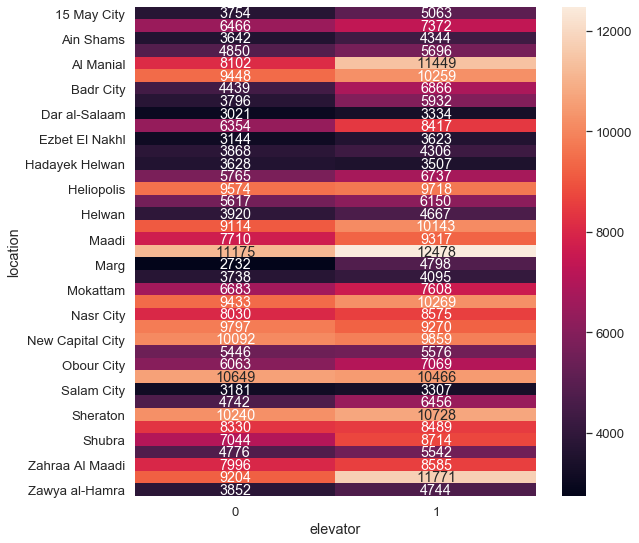

In [192]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [193]:
x=pd.pivot_table(index='location',values='meterprice',columns='security',data=df,aggfunc=np.mean)
x

security                           0             1
location                                          
15 May City              3816.881720   4152.428571
Abasiya                  6842.402985   6924.272727
Ain Shams                3760.713265   4781.275362
Al Amiriyyah             5036.594203   4782.000000
Al Manial                8907.173913  10486.625000
Almazah                  9052.279070  10844.555556
Badr City                4573.784167   6414.981405
Basateen                 4159.976190   7451.250000
Dar al-Salaam            3110.038043   3290.866667
Downtown Cairo           6434.852113   8881.181395
Ezbet El Nakhl           3254.462366   3673.600000
Gesr Al Suez             3848.981717   4956.960396
Hadayek Helwan           3556.826990   3676.298246
Hadayek al-Kobba         6030.969178   6739.382353
Heliopolis               9602.453390   9726.419735
Helmeyat El Zaytoun      5757.805310   6100.603774
Helwan                   4019.875853   4783.069565
Katameya                 8972.066914  10356.418502
Maadi                    7519.142336   9422.506203
Madinaty                12579.468062  11710.399313
Marg                     2747.344720   6685.705882
Matareya                 3820.863946   4030.733333
Mokattam                 6655.315789   7900.056511
Mostakbal City           9359.548148  10141.521951
Nasr City                7618.895221   9063.960317
New Cairo - El Tagamoa   9452.537017   9572.644130
New Capital City        10644.691824   9723.342491
New Nozha                5374.591912   5939.517647
Obour City               6021.828829   6955.802817
Rehab City               9736.603834  10790.488794
Salam City               3169.347188   3610.950000
Sayeda Zeinab            5173.595238   6044.666667
Sheraton                10354.418338  10782.127119
Shorouk City             7359.588745   9125.878963
Shubra                   7296.823980   9424.861111
Waili                    5061.870588   5331.470588
Zahraa Al Maadi          7874.764415   8846.851153
Zamalek                  9588.021277  10948.160000
Zawya al-Hamra           3932.861314   4644.000000

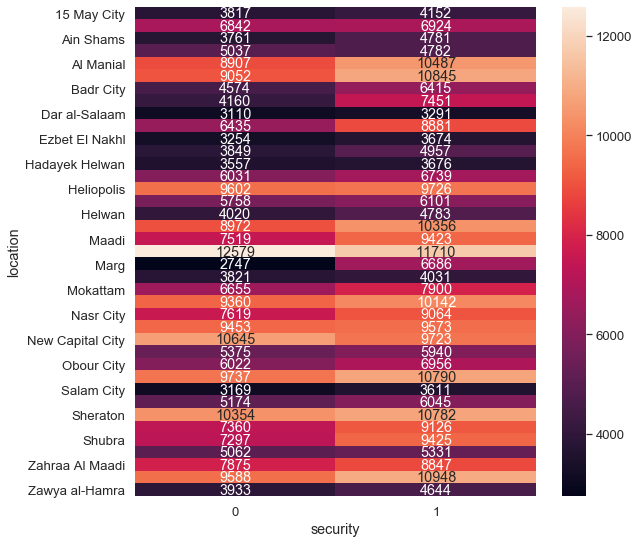

In [194]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [195]:
x=pd.pivot_table(index='location',values='meterprice',columns='natural_gas',data=df,aggfunc=np.mean)
x

natural_gas                        0             1
location                                          
15 May City              3735.804878   3897.936937
Abasiya                  6606.297297   7045.038462
Ain Shams                3692.555363   4094.477778
Al Amiriyyah             6050.758621   4334.860465
Al Manial                8958.658537   9433.545455
Almazah                  8623.531250  10717.000000
Badr City                4716.580739   5708.455793
Basateen                 3968.080000   5015.333333
Dar al-Salaam            3074.565657   3172.280000
Downtown Cairo           7089.373418   7416.796923
Ezbet El Nakhl           3127.406250   3347.818182
Gesr Al Suez             3717.961842   4392.418227
Hadayek Helwan           3148.427746   4004.589595
Hadayek al-Kobba         5675.345324   6508.184314
Heliopolis               8825.374680  10425.103448
Helmeyat El Zaytoun      5533.691057   6058.180822
Helwan                   3966.409574   4248.415254
Katameya                 9671.919732   9505.020305
Maadi                    8105.085174   9133.897222
Madinaty                11359.770257  12596.872674
Marg                     2944.779221   3525.662100
Matareya                 3711.357143   3979.153846
Mokattam                 6861.794266   7264.139461
Mostakbal City           9954.332168  10029.387931
Nasr City                7920.962264   8661.981333
New Cairo - El Tagamoa   9600.218707   9441.419761
New Capital City         9576.416084  10173.260143
New Nozha                4672.979866   6108.048077
Obour City               5978.883838   6871.993976
Rehab City               9809.236140  10984.465269
Salam City               3111.725352   3228.630662
Sayeda Zeinab            4918.162162   5482.357143
Sheraton                10264.078261  10655.042194
Shorouk City             7504.334459   9381.070922
Shubra                   7622.260638   7630.289855
Waili                    5156.888889   5067.263158
Zahraa Al Maadi          7945.013468   8735.902041
Zamalek                  9264.019608  11425.652174
Zawya al-Hamra           3775.190476   4153.298851

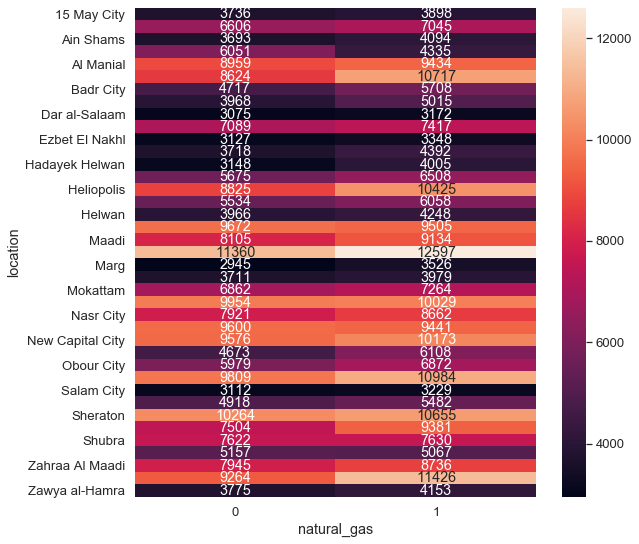

In [196]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [197]:
x=pd.pivot_table(index='location',values='meterprice',columns='landline',data=df,aggfunc=np.mean)
x

landline                           0             1
location                                          
15 May City              3822.500000   3849.404255
Abasiya                  6922.345455   6766.058824
Ain Shams                3735.163793   4288.764706
Al Amiriyyah             5285.458333   4507.041667
Al Manial                8535.254545  10431.400000
Almazah                 10098.434783   9549.212121
Badr City                4739.666667   6246.546798
Basateen                 3784.027778   6829.900000
Dar al-Salaam            3060.862745   3332.565217
Downtown Cairo           6896.327945   8002.841346
Ezbet El Nakhl           3175.408451   3539.962963
Gesr Al Suez             3790.687892   4747.446188
Hadayek Helwan           3435.979253   3899.057143
Hadayek al-Kobba         5930.793722   6584.169591
Heliopolis               9204.636708  10494.088339
Helmeyat El Zaytoun      5618.537190   6181.431452
Helwan                   3990.054400   4497.031390
Katameya                 9332.852507  10194.624204
Maadi                    8074.517333   9369.440397
Madinaty                11387.174506  12582.911348
Marg                     2923.291971   4289.232323
Matareya                 3779.510040   4042.106667
Mokattam                 6837.835125   7569.633075
Mostakbal City           9831.989071  10161.632812
Nasr City                7810.681742   8998.261698
New Cairo - El Tagamoa   9574.450958   9434.331298
New Capital City         9718.686275  10149.080460
New Nozha                4949.514523   6671.681034
Obour City               6072.760331   7007.885246
Rehab City              10179.682616  10875.736758
Salam City               3103.389068   3418.033898
Sayeda Zeinab            5097.016949   5537.058824
Sheraton                10091.597902  11048.541436
Shorouk City             7955.566667   9186.885321
Shubra                   7520.785489   7856.163265
Waili                    4707.046154   5809.081081
Zahraa Al Maadi          7897.863889   9102.934066
Zamalek                  9774.785714  10991.634146
Zawya al-Hamra           3831.009709   4352.765957

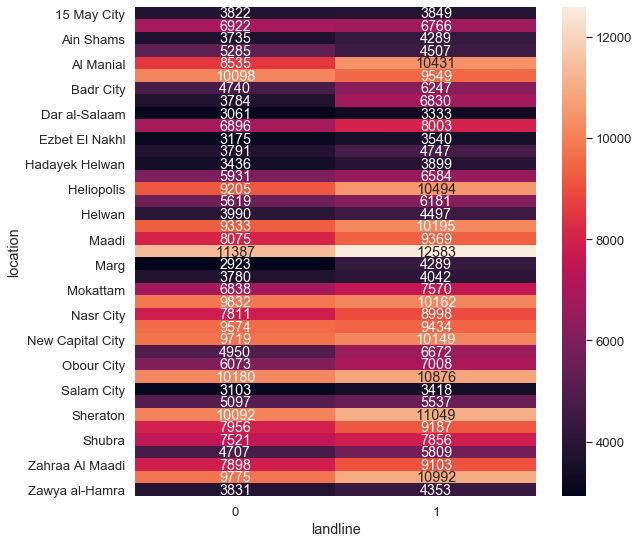

In [198]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [199]:
x=pd.pivot_table(index='location',values='meterprice',columns='private_garden',data=df,aggfunc=np.mean)
x

private_garden                     0             1
location                                          
15 May City              3819.973262   4112.000000
Abasiya                  6922.279070   5153.000000
Ain Shams                3883.377717   4147.571429
Al Amiriyyah             5043.059701   4797.200000
Al Manial                9304.817073   6462.000000
Almazah                  9416.176471  12668.363636
Badr City                4788.362182   6502.893204
Basateen                 4446.173913           NaN
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6752.947935  10587.011905
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4032.188266   9005.400000
Hadayek Helwan           3550.336283   4844.000000
Hadayek al-Kobba         6209.935233   6428.125000
Heliopolis               9592.407407  10201.363636
Helmeyat El Zaytoun      5864.917355   4041.500000
Helwan                   4076.477411   5447.827586
Katameya                 9465.789474   9979.577778
Maadi                    8418.546099   9818.185841
Madinaty                11315.446007  12441.449020
Marg                     2870.829060   9907.045455
Matareya                 3846.767802   1750.000000
Mokattam                 6922.601272   8381.560976
Mostakbal City           9333.953975  11172.591912
Nasr City                7980.485356  10209.311927
New Cairo - El Tagamoa   9482.895122   9624.144969
New Capital City         9359.086854  10804.587814
New Nozha                5428.189655   8637.555556
Obour City               6313.439189   6702.823529
Rehab City               9976.643478  11521.453933
Salam City               3153.916067   4441.583333
Sayeda Zeinab            5242.586957   6666.000000
Sheraton                10381.983982  11635.200000
Shorouk City             7854.344828  10140.594406
Shubra                   7635.000000   7299.090909
Waili                    5040.858586   7283.000000
Zahraa Al Maadi          8243.402335   8694.683099
Zamalek                 10126.380952  11340.692308
Zawya al-Hamra           3994.671141   3968.000000

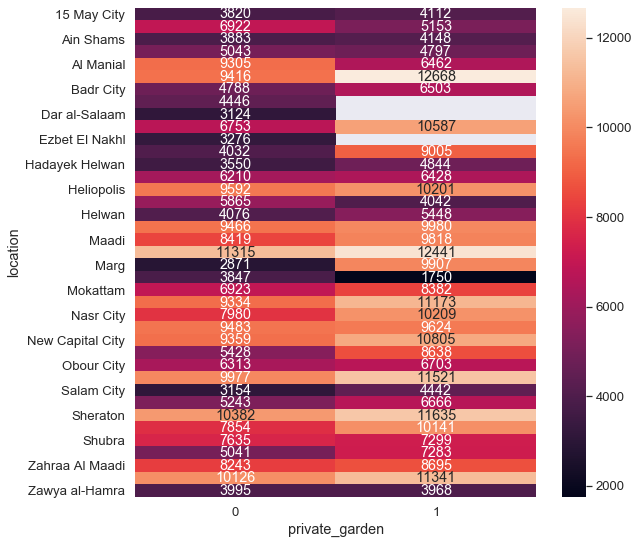

In [200]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [201]:
x=pd.pivot_table(index='location',values='meterprice',columns='pets_allowed',data=df,aggfunc=np.mean)
x

pets_allowed                       0             1
location                                          
15 May City              3821.668478   3980.000000
Abasiya                  6807.512500   7352.666667
Ain Shams                3830.030710   4663.460526
Al Amiriyyah             5051.632353   4590.000000
Al Manial                8747.500000  11735.461538
Almazah                  8979.551724  12325.619048
Badr City                4686.687786   6561.045455
Basateen                 4358.232558   5706.666667
Dar al-Salaam            3119.637306   3253.333333
Downtown Cairo           6623.768612   9435.333333
Ezbet El Nakhl           3268.155914   3418.900000
Gesr Al Suez             3947.011220   5300.296296
Hadayek Helwan           3540.381250   4021.153846
Hadayek al-Kobba         6105.043103   7041.413043
Heliopolis               9925.734189   9097.704887
Helmeyat El Zaytoun      5835.836190   5915.232558
Helwan                   4085.409320   4681.611111
Katameya                 9039.884956  10827.210191
Maadi                    7812.271318   9772.986207
Madinaty                11496.378017  12568.639519
Marg                     2789.469512   6903.777778
Matareya                 3837.549839   3906.000000
Mokattam                 6752.651599   7974.955836
Mostakbal City           8924.860870  10476.648077
Nasr City                8010.114598   9033.015873
New Cairo - El Tagamoa   9477.134554   9571.348994
New Capital City        10042.643678   9865.587838
New Nozha                5296.939873   7144.268293
Obour City               6297.755725   6613.313725
Rehab City              10527.393281  10526.053763
Salam City               3180.620098   3370.904762
Sayeda Zeinab            5283.471264   4887.000000
Sheraton                10318.290816  11216.173333
Shorouk City             7633.871212   9080.901274
Shubra                   7526.775656   8560.577778
Waili                    4924.483516   6615.090909
Zahraa Al Maadi          8085.664699   9077.518987
Zamalek                  9934.629032  10917.085714
Zawya al-Hamra           4023.202899   3664.333333

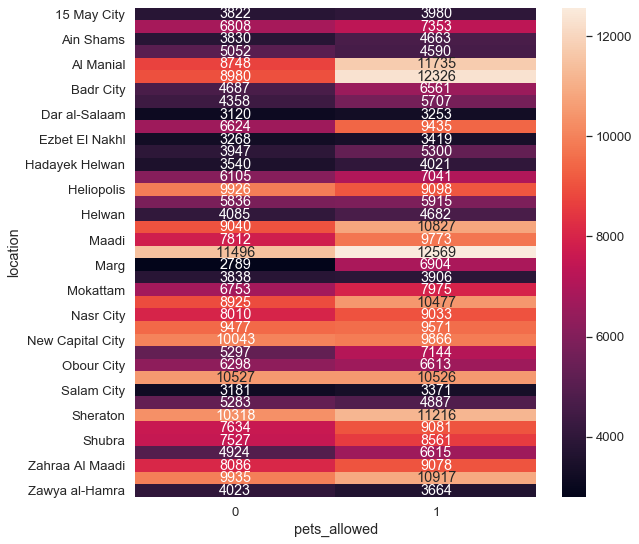

In [202]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [203]:
x=pd.pivot_table(index='location',values='meterprice',columns='covered_parking',data=df,aggfunc=np.mean)
x

covered_parking                    0             1
location                                          
15 May City              3793.715054   4768.000000
Abasiya                  6821.256098   7347.428571
Ain Shams                3842.788641   4958.181818
Al Amiriyyah             5012.057143   5513.500000
Al Manial                9093.554054   9950.727273
Almazah                  8741.303571  12614.739130
Badr City                4687.067557   6391.131387
Basateen                 4230.181818   9198.000000
Dar al-Salaam            3124.076531   3097.000000
Downtown Cairo           6462.770021   9761.896104
Ezbet El Nakhl           3273.603093   3493.500000
Gesr Al Suez             3926.825549   5966.857143
Hadayek Helwan           3535.295732   4327.500000
Hadayek al-Kobba         6100.572238   7194.097561
Heliopolis              10039.411874   8892.603670
Helmeyat El Zaytoun      5764.709677   6363.357143
Helwan                   4026.893590   5230.073529
Katameya                 9017.186186  10807.791411
Maadi                    7960.280423   9526.852843
Madinaty                11704.323205  12389.819409
Marg                     2813.589595   9337.555556
Matareya                 3823.532258   4211.500000
Mokattam                 6770.391116   7985.531561
Mostakbal City           8700.093525  10766.841102
Nasr City                8002.251809   8955.316770
New Cairo - El Tagamoa   9610.943327   9421.754603
New Capital City        10487.476636   9688.657841
New Nozha                5406.904762   7144.190476
Obour City               6276.317164   6692.885417
Rehab City              11066.988971  10110.202550
Salam City               3177.838942   3577.000000
Sayeda Zeinab            5252.000000   5800.000000
Sheraton                10142.202216  11553.283019
Shorouk City             8292.588462   8524.125786
Shubra                   7424.718245  10452.967742
Waili                    5004.033708   5810.384615
Zahraa Al Maadi          7814.129173   9154.417722
Zamalek                  9722.884058  11684.500000
Zawya al-Hamra           3934.958042   5210.714286

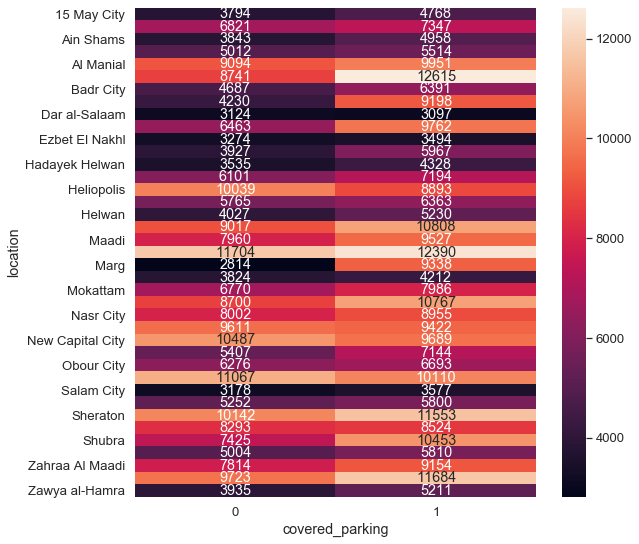

In [204]:
sns.heatmap(x,annot=True,fmt='0.0f')

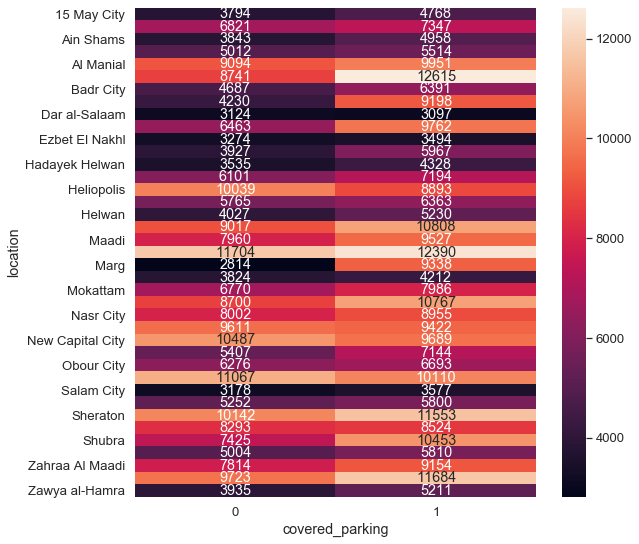

In [205]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [206]:
x=pd.pivot_table(index='location',values='meterprice',columns='pool',data=df,aggfunc=np.mean)
x

pool                               0             1
location                                          
15 May City              3825.557292   4500.000000
Abasiya                  6862.640449           NaN
Ain Shams                3884.617937   4655.333333
Al Amiriyyah             5025.986111           NaN
Al Manial                9247.095238   5625.000000
Almazah                  9069.264706  14812.909091
Badr City                4894.852035  10547.451613
Basateen                 4396.844444   6666.000000
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6990.408304   9686.428571
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4016.769529  10166.833333
Hadayek Helwan           3576.508671           NaN
Hadayek al-Kobba         6201.428571   8750.000000
Heliopolis               9398.654000  12772.146341
Helmeyat El Zaytoun      5856.440789   3936.000000
Helwan                   4119.161137   5012.500000
Katameya                 8885.715426  11861.366667
Maadi                    7706.563636  11223.989011
Madinaty                12014.550661  10013.822581
Marg                     2916.138810   9810.950000
Matareya                 3840.296296           NaN
Mokattam                 6856.705283   8650.558621
Mostakbal City           8642.027149  11950.646104
Nasr City                7933.992670  10401.876712
New Cairo - El Tagamoa   9193.471035  10854.026604
New Capital City         8881.770833  11186.451713
New Nozha                5474.161017   9631.666667
Obour City               6314.854599   7276.444444
Rehab City              10244.214502  11617.665370
Salam City               3194.385514   1285.000000
Sayeda Zeinab            5257.892473           NaN
Sheraton                10507.286036   9597.739130
Shorouk City             7859.241901  10677.530435
Shubra                   7605.582251  12583.000000
Waili                    5052.639175   6157.600000
Zahraa Al Maadi          8067.257204   9802.108844
Zamalek                  9747.000000  15589.888889
Zawya al-Hamra           3994.493333           NaN

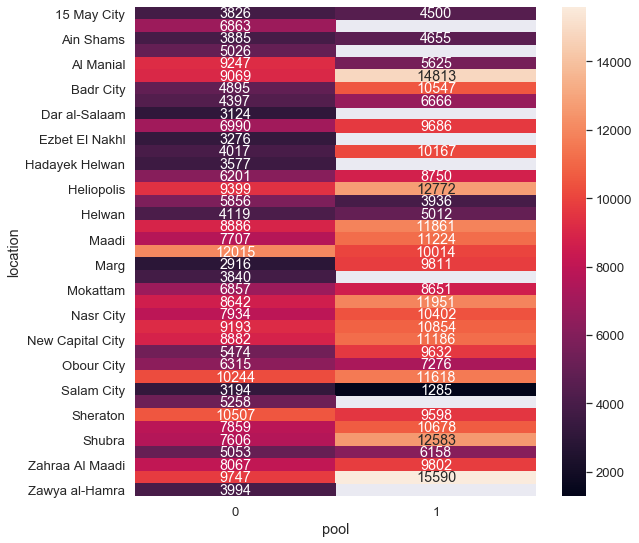

In [207]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [208]:
x=pd.pivot_table(index='location',values='meterprice',columns='maids_room',data=df,aggfunc=np.mean)
x

maids_room                         0             1
location                                          
15 May City              3829.051813           NaN
Abasiya                  6857.848837   7000.000000
Ain Shams                3883.444946   4245.800000
Al Amiriyyah             5025.986111           NaN
Al Manial                9204.482353           NaN
Almazah                  9452.115942  12745.600000
Badr City                4924.049592   8234.956044
Basateen                 4454.088889   4090.000000
Dar al-Salaam            3127.923469   2845.666667
Downtown Cairo           7084.064736   9117.685185
Ezbet El Nakhl           3275.846939           NaN
Gesr Al Suez             4036.522623   5230.027778
Hadayek Helwan           3560.426471   4487.833333
Hadayek al-Kobba         6202.838046   7111.200000
Heliopolis               9422.263908  11949.919463
Helmeyat El Zaytoun      5851.190083   5425.666667
Helwan                   4104.113909   5270.785714
Katameya                 9437.320961  11634.210526
Maadi                    8319.448980  10850.325843
Madinaty                11949.568086  11491.885609
Marg                     3034.607843   8891.312500
Matareya                 3855.388199   1410.500000
Mokattam                 6894.018919   8775.043860
Mostakbal City           9202.510319  11961.460829
Nasr City                8211.141892   9769.789855
New Cairo - El Tagamoa   9324.806998  10543.122126
New Capital City         9582.676647  10786.911765
New Nozha                5479.945714   6966.714286
Obour City               6337.296830   7384.000000
Rehab City              10437.031746  10899.657025
Salam City               3192.521028   2083.000000
Sayeda Zeinab            5257.892473           NaN
Sheraton                10398.502232  11971.263158
Shorouk City             8150.642710   9861.340659
Shubra                   7526.470330  12711.222222
Waili                    5078.510000   6521.500000
Zahraa Al Maadi          8197.935065   9563.819277
Zamalek                 10115.176471  11521.250000
Zawya al-Hamra           3994.493333           NaN

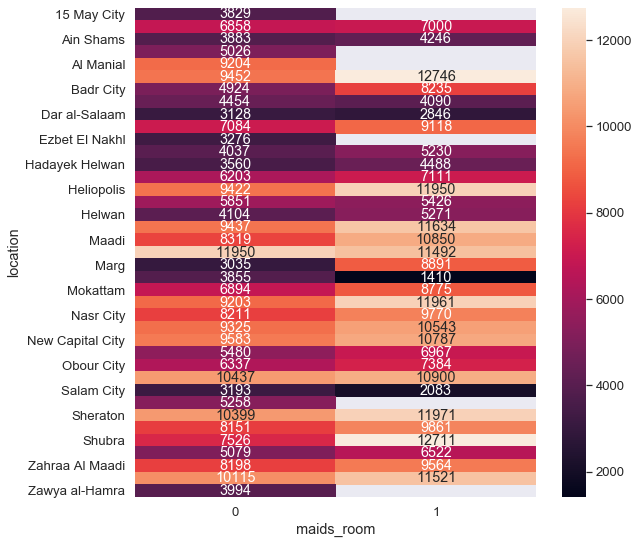

In [209]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [210]:
x=pd.pivot_table(index='location',values='meterprice',columns='central_ac_heating',data=df,aggfunc=np.mean)
x

central_ac_heating                 0             1
location                                          
15 May City              3830.723958   3508.000000
Abasiya                  6834.647059   7457.500000
Ain Shams                3869.423636   4941.611111
Al Amiriyyah             5022.275362   5111.333333
Al Manial                9082.750000  11152.200000
Almazah                  8924.015385  14256.500000
Badr City                4947.657459   9702.872727
Basateen                 4446.173913           NaN
Dar al-Salaam            3123.668342           NaN
Downtown Cairo           6914.656357  10616.457627
Ezbet El Nakhl           3277.615385   2931.000000
Gesr Al Suez             3978.666007   6876.065217
Hadayek Helwan           3563.145349   5875.000000
Hadayek al-Kobba         6189.465969   7007.000000
Heliopolis               9271.773717  12376.105000
Helmeyat El Zaytoun      5834.856419   6225.736842
Helwan                   4123.442308   4119.875000
Katameya                 9295.170787  12314.549020
Maadi                    8200.819320  10790.313559
Madinaty                11915.167969  11946.397436
Marg                     3003.585227   8016.857143
Matareya                 3820.376176   5111.200000
Mokattam                 6751.661096   9395.761905
Mostakbal City           9376.965278  12065.764368
Nasr City                8051.212787  10379.826590
New Cairo - El Tagamoa   9326.594917  10556.800878
New Capital City         9411.687251  11215.684729
New Nozha                5415.100000  10209.000000
Obour City               6230.543284   8184.068966
Rehab City              10570.585466  10369.168498
Salam City               3178.134752   4021.833333
Sayeda Zeinab            5257.892473           NaN
Sheraton                10313.183295  12250.027778
Shorouk City             8238.058091   9333.343750
Shubra                   7538.895089  10095.000000
Waili                    5120.340000   4430.000000
Zahraa Al Maadi          8116.496335   9679.658915
Zamalek                  9695.987342  12892.333333
Zawya al-Hamra           3995.798658   3800.000000

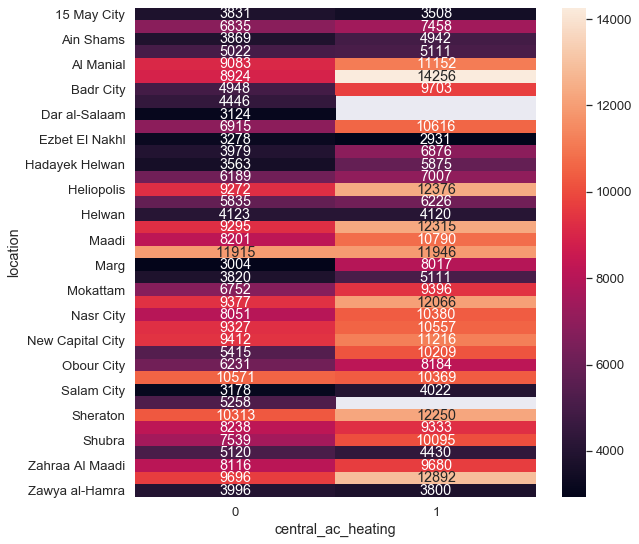

In [211]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [212]:
x=pd.pivot_table(index='location',values='meterprice',columns='built_in_kitchen_appliances',data=df,aggfunc=np.mean)
x

built_in_kitchen_appliances             0             1
location                                               
15 May City                   3826.101064   3940.000000
Abasiya                       6732.594937   7890.000000
Ain Shams                     3863.574691   4249.223881
Al Amiriyyah                  5046.161765   4683.000000
Al Manial                     8950.885714  10387.933333
Almazah                       9268.348485  12918.538462
Badr City                     4957.452141   7509.979167
Basateen                      4223.209302   7642.000000
Dar al-Salaam                 3125.020408   3035.333333
Downtown Cairo                7142.674138   8327.049180
Ezbet El Nakhl                3265.702128   3514.250000
Gesr Al Suez                  3924.352901   5854.115044
Hadayek Helwan                3553.604720   4685.714286
Hadayek al-Kobba              6138.988796   6941.648649
Heliopolis                    9231.483178  12268.022124
Helmeyat El Zaytoun           5777.708791   6429.153846
Helwan                        4126.798267   4054.225000
Katameya                      9519.134066  10565.536585
Maadi                         8370.393728  10222.417476
Madinaty                     11831.820600  12978.045775
Marg                          3015.328612   8060.250000
Matareya                      3858.304636   3593.090909
Mokattam                      6872.536608   8532.751724
Mostakbal City                9770.598055  11068.541353
Nasr City                     8251.318957   9200.050847
New Cairo - El Tagamoa        9327.215028  10998.980040
New Capital City              9699.604356  10759.538961
New Nozha                     5334.936364   7637.740741
Obour City                    6317.154079   7078.545455
Rehab City                   10359.006446  11636.365854
Salam City                    3174.971223   3709.916667
Sayeda Zeinab                 5238.306818   5602.600000
Sheraton                     10289.086076  11413.805556
Shorouk City                  8061.496982  10619.518519
Shubra                        7554.379808   8256.729167
Waili                         5061.347368   5723.714286
Zahraa Al Maadi               8073.419285   9615.925466
Zamalek                       9237.539474  14094.857143
Zawya al-Hamra                3956.409722   4908.500000

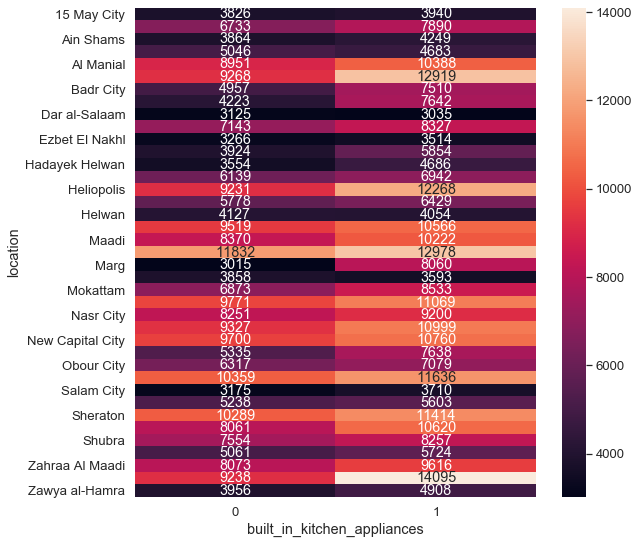

In [213]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [214]:
x=pd.pivot_table(index='location',values='meterprice',columns='month',data=df,aggfunc=np.mean)
x

month                             1             2             3   \
location                                                           
15 May City              3731.000000   3699.950000   3859.577465   
Abasiya                          NaN   7153.166667   6802.542857   
Ain Shams                2666.000000   3916.806897   3774.283582   
Al Amiriyyah                     NaN   3715.375000   5933.200000   
Al Manial                        NaN  11683.500000   8073.555556   
Almazah                          NaN  10442.285714  11573.607143   
Badr City                5061.666667   4719.522936   4738.209705   
Basateen                         NaN   4347.500000   3253.500000   
Dar al-Salaam                    NaN   3023.964286   3114.527778   
Downtown Cairo           7296.666667   6785.123288   7242.686508   
Ezbet El Nakhl                   NaN   3384.722222   3398.971831   
Gesr Al Suez             3267.400000   3835.483146   4197.745421   
Hadayek Helwan           4125.000000   3789.378378   3481.100000   
Hadayek al-Kobba                 NaN   5739.605263   6358.496350   
Heliopolis               7830.857143  10061.278607   9355.095668   
Helmeyat El Zaytoun              NaN   5335.550725   5951.894068   
Helwan                   3031.500000   4574.948980   4063.678930   
Katameya                         NaN  10193.550000   9915.026846   
Maadi                            NaN   9194.394737   8693.815900   
Madinaty                         NaN  10952.378641  11555.095060   
Marg                     3111.000000   2864.900000   3158.803279   
Matareya                         NaN   3696.710526   3742.946154   
Mokattam                 9801.333333   7123.609589   6960.398515   
Mostakbal City           5368.000000   9594.430380   9379.453782   
Nasr City                6183.000000   8366.831858   7968.958333   
New Cairo - El Tagamoa   5843.111111   9370.298601   9355.121254   
New Capital City                 NaN   9616.185567  10311.714286   
New Nozha                5208.000000   6075.909091   5712.716667   
Obour City                       NaN   6711.244444   6354.384615   
Rehab City               1724.000000  10137.297101  10709.080460   
Salam City               2285.000000   3092.897959   3127.131387   
Sayeda Zeinab                    NaN   5223.000000   5342.866667   
Sheraton                14545.000000   9785.645833  10496.552326   
Shorouk City             6120.000000   7801.490909   8837.210784   
Shubra                   4000.000000   7993.593220   7518.696552   
Waili                            NaN   5554.857143   5234.825000   
Zahraa Al Maadi          5147.000000   8600.880734   8171.292063   
Zamalek                          NaN  12067.111111  10247.437500   
Zawya al-Hamra                   NaN   3715.500000   3850.240000   

month                             4             5        6      7       8   \
location                                                                     
15 May City              3977.306122   3699.211538      NaN    NaN     NaN   
Abasiya                  7152.387097   6355.470588      NaN    NaN     NaN   
Ain Shams                4019.571429   3905.358974      NaN    NaN     NaN   
Al Amiriyyah             4937.190476   4452.055556      NaN    NaN     NaN   
Al Manial                9743.809524   9682.250000      NaN    NaN     NaN   
Almazah                  9368.363636   8017.772727      NaN    NaN     NaN   
Badr City                5251.686099   5616.751142      NaN    NaN     NaN   
Basateen                 5361.000000   5073.800000      NaN    NaN     NaN   
Dar al-Salaam            3137.716981   3189.840909      NaN    NaN     NaN   
Downtown Cairo           7238.937931   7492.226190      NaN    NaN     NaN   
Ezbet El Nakhl           3153.037736   3198.203704      NaN    NaN     NaN   
Gesr Al Suez             4097.349876   3959.046838      NaN    NaN     NaN   
Hadayek Helwan           3775.115789   3421.758242      NaN  750.0     NaN   
Hadayek al-Kobba         6128.193548   63

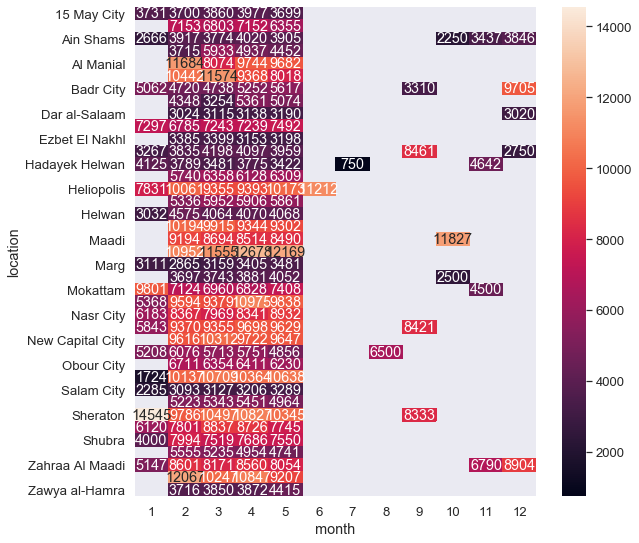

In [215]:
sns.heatmap(x,annot=True,fmt='0.0f')

### elevator plays a rule in the price of high levels in the building but still high levels are lowest value levels


In [216]:
x=pd.pivot_table(index='level',values='meterprice',columns='elevator',data=df,aggfunc=np.mean)
x

elevator            0             1
level                              
1         8150.394187   9415.944387
10        5368.259786   6107.935632
10+       5360.610487   5855.681429
2         8745.606905   9175.220912
3         7616.469111   9570.072754
4         6614.759067   9172.781942
5         6182.276687   9160.875796
6         5944.710638   8267.968794
7         5601.593052   7203.649123
8         5946.811209   6687.629067
9         5813.861446   6331.093607
Ground    9117.688596  10124.058853

In [217]:
df

url  \
0      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
1      https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...   
2      https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...   
3      https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
4      https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...   
...                                                  ...   
37704  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37705  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   
37706  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...   
37707  https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...   
37708  https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...   

                                                 title        date  \
0                   شقة للبيع بسكن مصر الاندلس مسلسل 1  2022-03-01   
1        سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥  2022-04-17   
2               لقطه سكن مصر التجمع التالت افر 150 الف  2022-05-01   
3      شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس  2022-04-29   
4                لسرعه البيع شقه سكن مصر التجمع التالت  2022-05-01   
...                                                ...         ...   
37704        شقة للبيع إمتداد مدينة 15 مايو مساحة 125م  2022-05-01   
37705               شقة للبيع بكمبوند دار مصر دور ثالث  2022-05-01   
37706                                        شقه للبيع  2022-03-01   
37707                                            للبيع  2022-03-01   
37708           شقة دور ارضي مرتفع سوبر لوكس مجاورة 15  2022-04-10   

                     location         compound       type   price  area  \
0      New Cairo - El Tagamoa       Sakan Masr  Apartment  175000   115   
1      New Cairo - El Tagamoa       Sakan Masr  Apartment  180000   115   
2      New Cairo - El Tagamoa       Sakan Masr  Apartment  150000   115   
3                Gesr Al Suez  Not in Compound  Apartment  450000   135   
4      New Cairo - El Tagamoa       Sakan Masr  Apartment  160000   115   
...                       ...              ...        ...     ...   ...   
37704             15 May City  Not in Compound  Apartment  550000   125   
37705             15 May City         Dar Misr  Apartment  600000   140   
37706             15 May City            Jewar  Apartment  470000    80   
37707             15 May City  Not in Compound  Apartment  470000   100   
37708             15 May City  Not in Compound  Apartment  440000   105   

      bedrooms   level  ...  landline pets_allowed covered_parking  \
0            3       3  ...         1            1               1   
1            3       1  ...         0            0               0   
2            3       2  ...         0            0               0   
3            3       7  ...         0            0               0   
4            3       2  ...         0            0               0   
...        ...     ...  ...       ...          ...             ...   
37704        3       2  ...         0            0               0   
37705        3       3  ...         0            0               0   
37706        2       5  ...         0            0               0   
37707        2       4  ...         1            1               0   
37708        3  Ground  ...         0            0               0   

      private_garden pool maids_room central_ac_heating  \
0                  1    0          0                  0   
1                  0    0          0                  0   
2                  0    0          0                  0   
3                  0    0          0                  0   
4                  0    0          0                  0   
...              ...  ...        ...                ...   
37704              0    0          0                  0   
37705              0    0          0                  0   
37706              0    0          0                  0   
37707              1    0          0                  0   
37708              0    0          0                  0   

      built_in_kitchen_appliances  month

### outliers handling

In [218]:
df['area'].max()

268

In [219]:
df['meterprice'].max()

120000

In [220]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

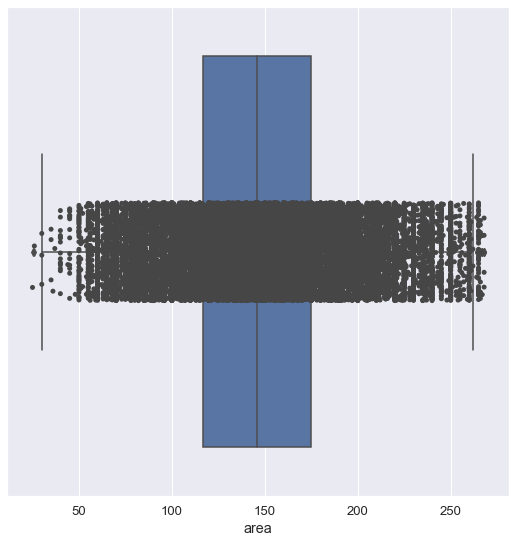

In [221]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

### droping outliers drops 9000 row so we will replace with median

In [222]:
from datasist.structdata import detect_outliers
idx = ['area','price','meterprice','down_payment']
for col in idx:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [223]:
df['area'].max()

262

In [224]:
df['meterprice'].max()

22083

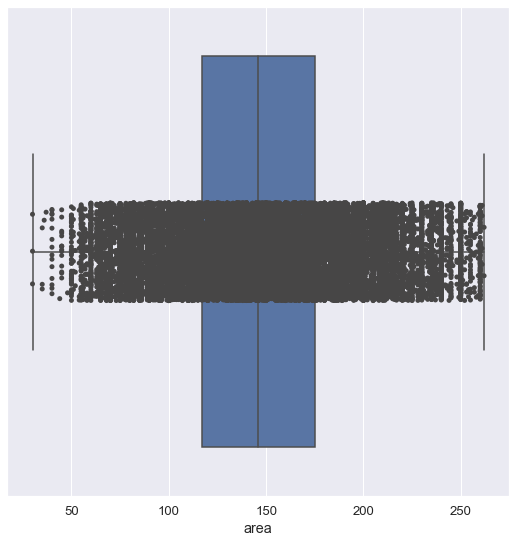

In [225]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

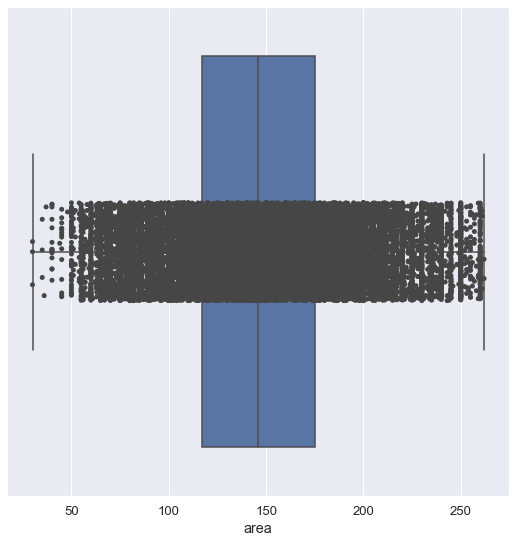

In [226]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

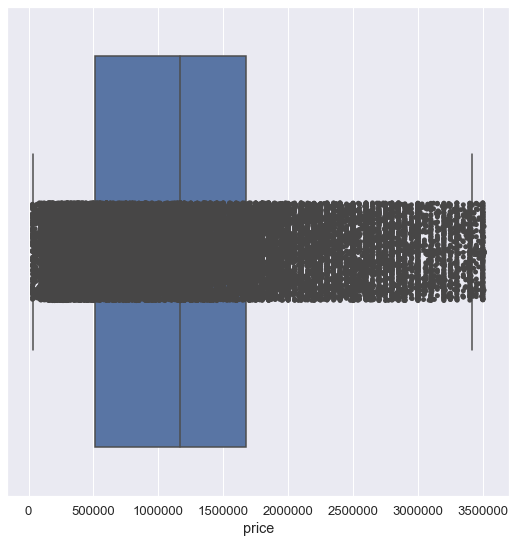

In [227]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

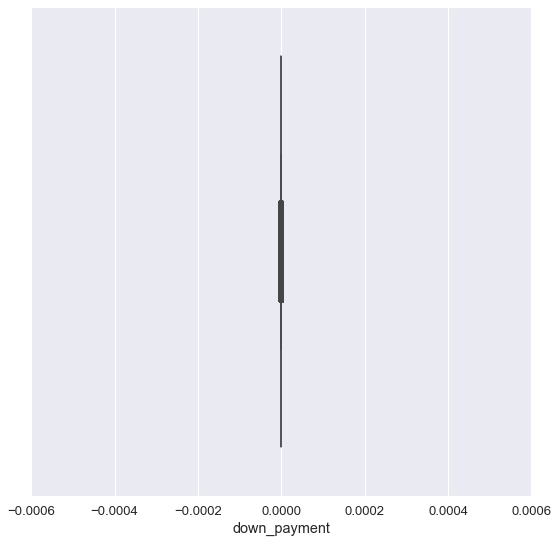

In [228]:
sns.boxplot(x='down_payment', data=df)
sns.stripplot(x='down_payment', data=df, color="#474646")

### droping outliers will drop 9000 row so we will replace with median

In [240]:
# from datasist.structdata import detect_outliers
# idx = ['area','price','meterprice','down_payment']
# for col in idx:
#     outliers_indices = detect_outliers(df, 0, [col])
#     col_median = df[col].median()
#     df[col].iloc[outliers_indices] = col_median

In [230]:
df['area'].max()

262

In [231]:
df['meterprice'].max()

21071

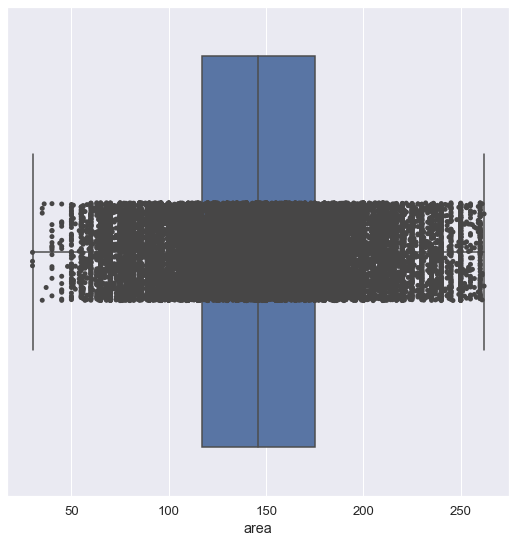

In [232]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

In [233]:
df['area'].max()

262

In [234]:
df['meterprice'].max()

21071

In [235]:
df['price'].max()

3420000

In [236]:
df['down_payment'].max()

0

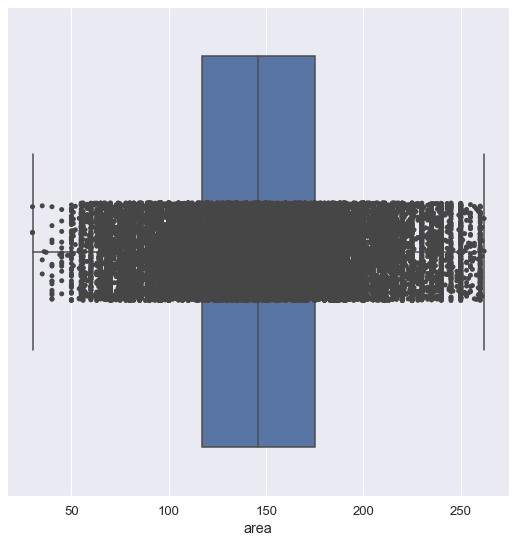

In [237]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

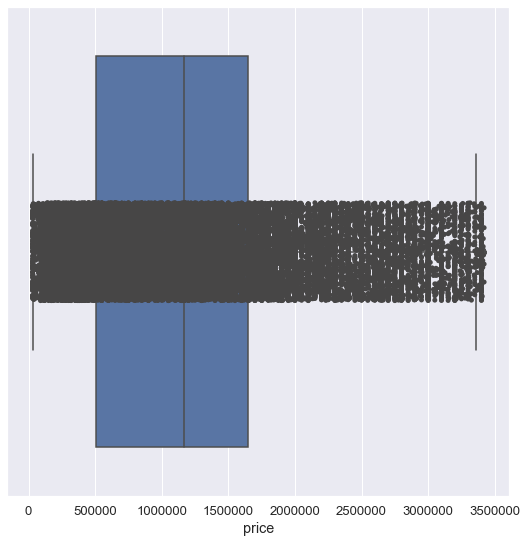

In [238]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

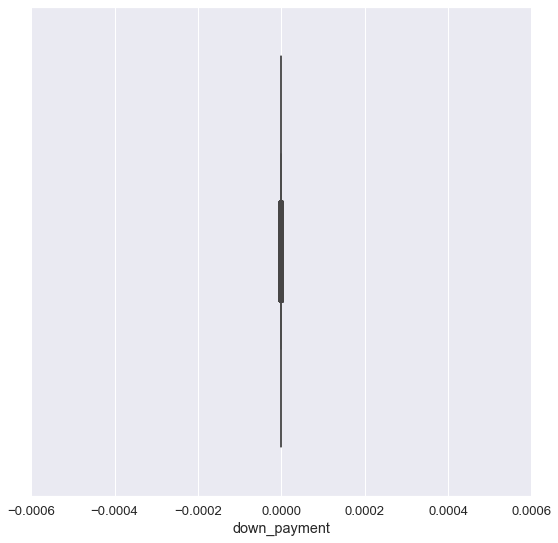

In [239]:
sns.boxplot(x='down_payment', data=df)
sns.stripplot(x='down_payment', data=df, color="#474646")